## Load CombSAFE and input dataset

In [1]:
from CombSAFE import *

In [2]:
dataset = import_path(path = "./input_dataset/")

## Generation of semantic annotations

In [3]:
#semantic_df = generate_semantic_annotations(dataset, sep ="\t", encode_convert=False)

In [4]:
semantic_df = load_semantic_dataframe(dataset, sep = "\t")

## Data analysis 

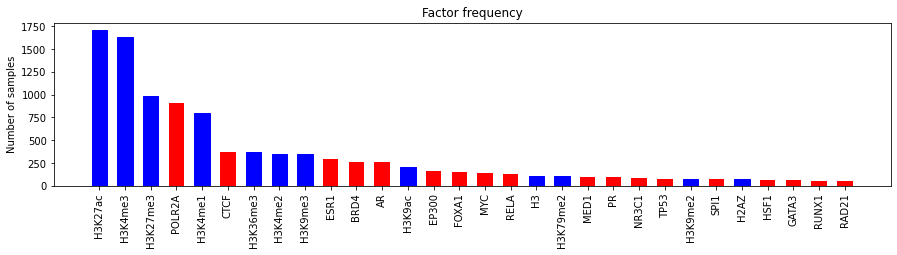

In [5]:
plot_factor_freq(semantic_df, 30)

In [6]:
generate_fixed_factor_pool(semantic_df, ["CTCF", "MYC"], 5)

+----+---------------------------------------+--------------------------+
|    | factor_list                           |   n_semantic_annotations |
|----+---------------------------------------+--------------------------|
|  1 | CTCF, MYC, H3K4me3, H3K27me3, POLR2A  |                       13 |
|  2 | CTCF, MYC, H3K27ac, H3K4me3, POLR2A   |                       10 |
|  3 | CTCF, MYC, H3K4me3, H3K4me1, POLR2A   |                       10 |
|  4 | CTCF, MYC, H3K27ac, H3K4me1, POLR2A   |                        9 |
|  5 | CTCF, MYC, H3K4me1, H3K27me3, POLR2A  |                        9 |
|  6 | CTCF, MYC, H3K36me3, H3K4me3, POLR2A  |                        9 |
|  7 | CTCF, MYC, H3K27ac, H3K4me3, H3K4me1  |                        9 |
|  8 | CTCF, MYC, H3K27ac, H3K4me3, H3K27me3 |                        9 |
|  9 | CTCF, MYC, H3K27ac, H3K27me3, POLR2A  |                        9 |
| 10 | CTCF, MYC, H3K4me3, H3K4me1, H3K27me3 |                        9 |
+----+--------------------------------

In [7]:
get_semantic_annotation_list(semantic_df, ["H3K4me3", "H3K27me3", "POLR2A", "CTCF", "MYC"])

1 - cultured cell_lining cell_fibroblast_000_unknown
2 - ectodermal cell_keratinocyte_000_cancer_carcinoma
3 - embryonic stem cell_lining cell_stem cell_000_unknown
4 - endothelial cell_vein endothelial cell_lining cell_000_unknown
5 - epithelial cell_lining cell_mammary gland epithelial cell_000_unknown
6 - epithelial cell_mammary gland epithelial cell_ectodermal cell_000_unknown
7 - fibroblast_lining cell_skin fibroblast_000_healthy
8 - lining cell_mesodermal cell_myotube_000_leukemia_cancer_chronic myeloid leukemia_myeloid leukemia
9 - lining cell_native cell_secretory cell_000_breast cancer_cancer
10 - lining cell_native cell_secretory cell_000_carcinoma
11 - lining cell_native cell_secretory cell_000_carcinoma_liver carcinoma
12 - lining cell_native cell_secretory cell_000_leukemia_chronic myeloid leukemia_myeloid leukemia
13 - lining cell_native cell_secretory cell_000_unknown
14 - lymphocyte_b cell_t cell_000_unknown
15 - progenitor cell_erythroid progenitor cell_000_unknown


## Select features and combine samples

In [8]:
pool = ["H3K4me3", "H3K27me3", "POLR2A", "CTCF", "MYC"]

In [9]:
extract_data(dataset, pool)

100%|██████████| 15/15 [00:00<00:00, 125.66it/s]


In [ ]:
#load_extracted_data(pool)

## [Optional] Add custom tracks

In [10]:
download_custom_tracks("CpG_Islands", "http://hgdownload.cse.ucsc.edu/goldenpath/hg38/database/cpgIslandExt.txt.gz")

In [ ]:
#add_custom_tracks("./CombSAFE_output/downloaded_files/cpgIslandExt_test.txt", 1) #TO CHECK

## Identify functional states

In [11]:
identify_functional_states(chromHMM_path ="./ChromHMM/", number_of_states = 15, n_core = 10)

In [12]:
palette = ['#c9f9ff', '#e6beff', '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231','#911eb4', '#bcf60c', '#f032e6', '#fffac8', '#fabebe', '#9a6324', '#46f0f0', '#008080']

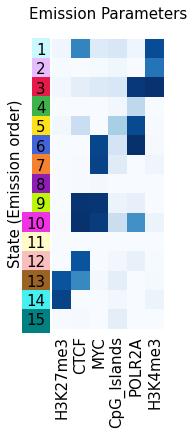

In [13]:
show_emission_graph(custom_palette=palette)

## Single-gene analysis 

In [14]:
full_df = load_functional_states_dataframe()

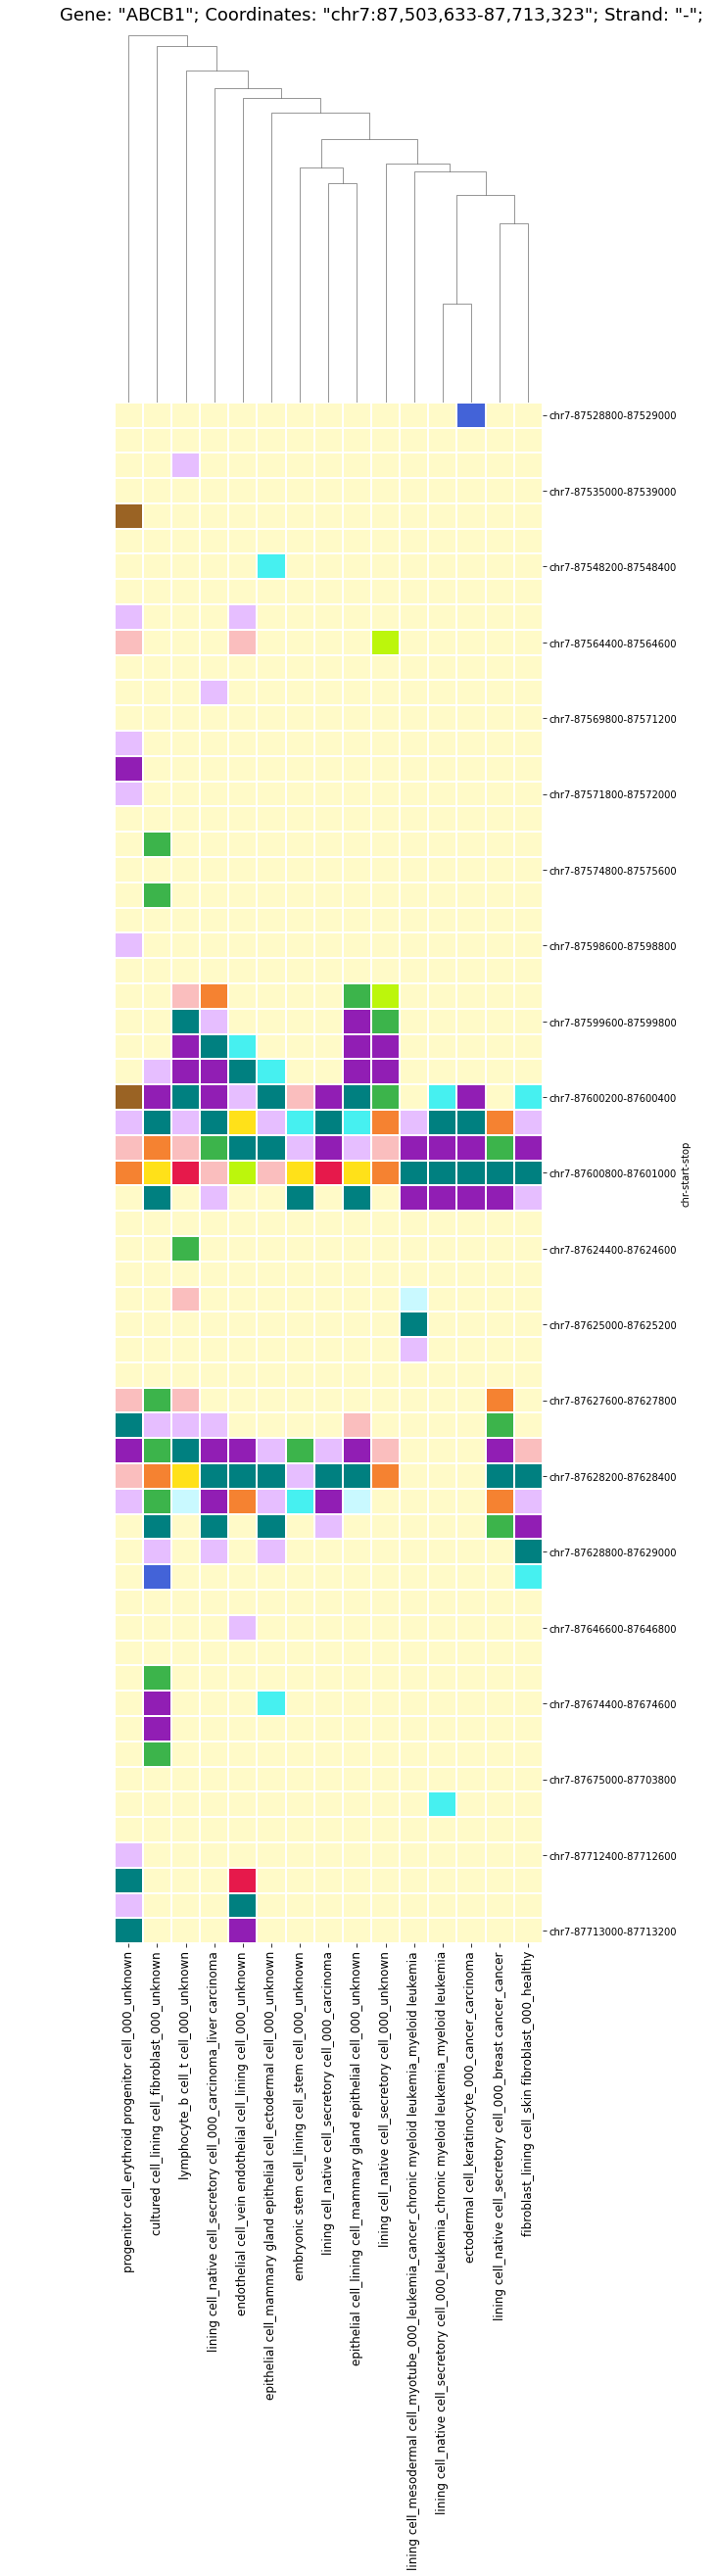

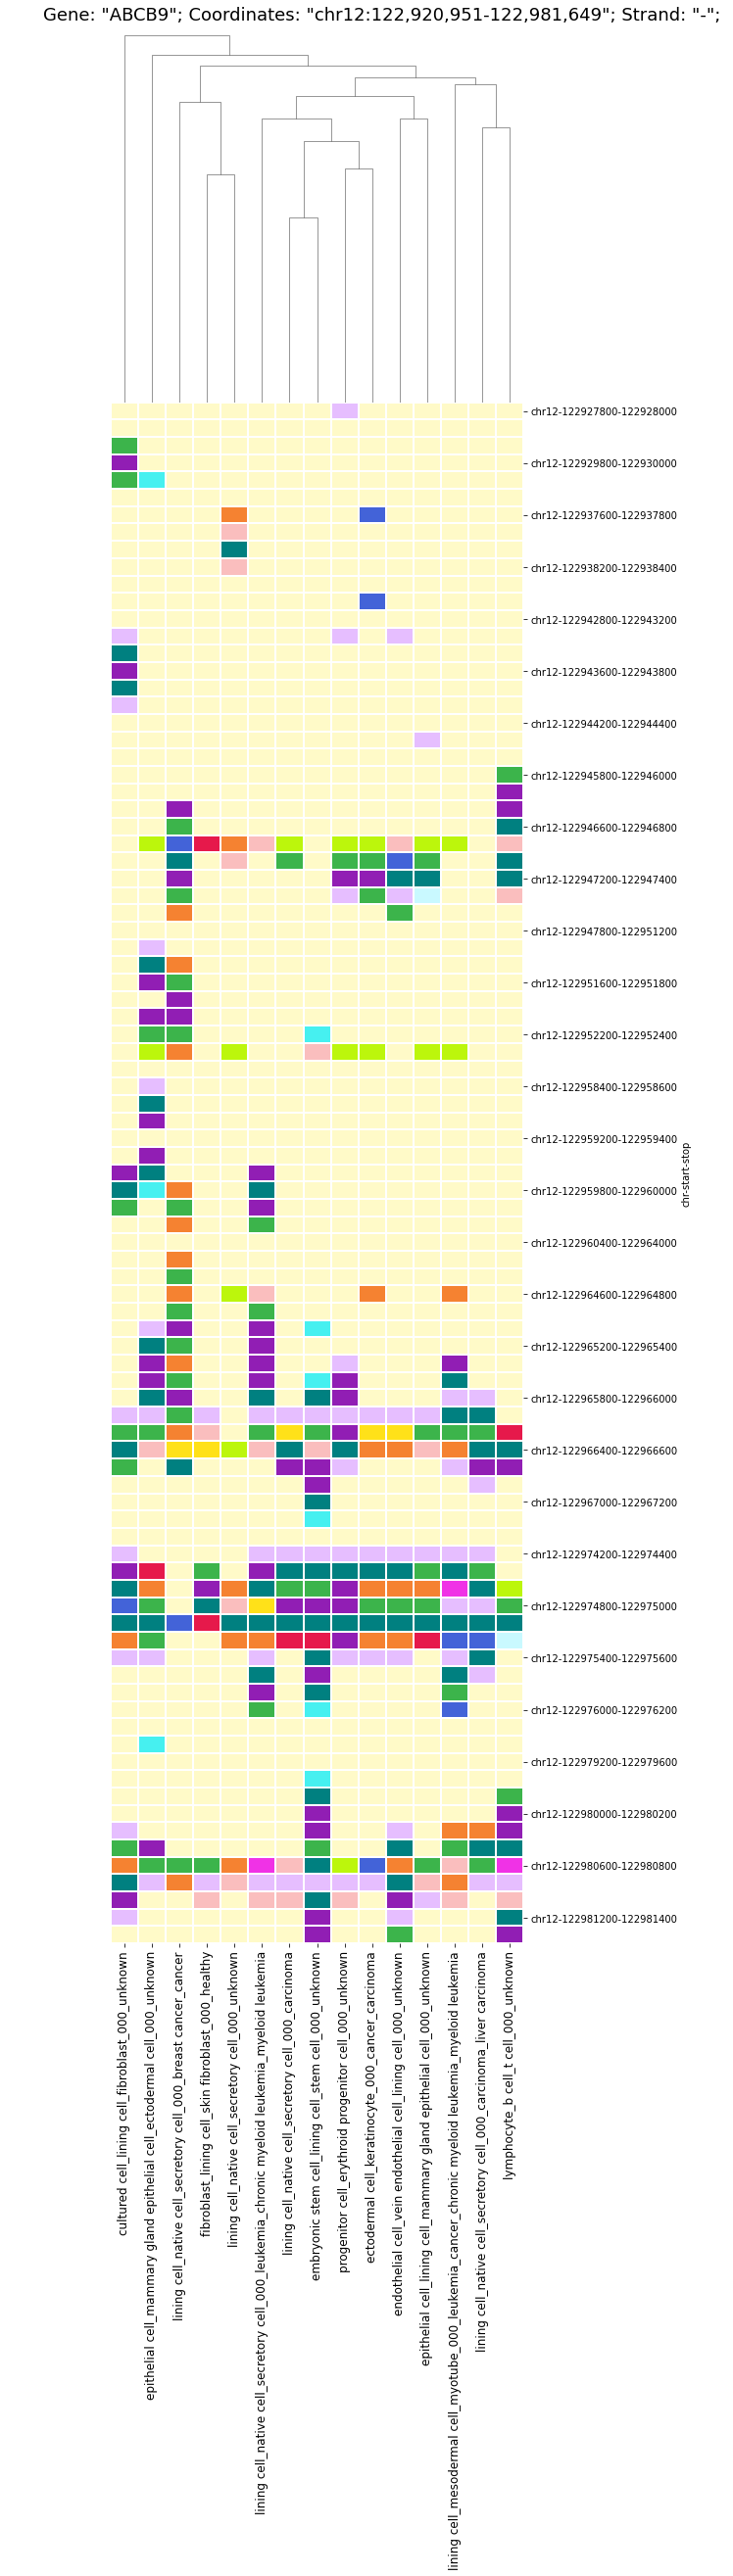

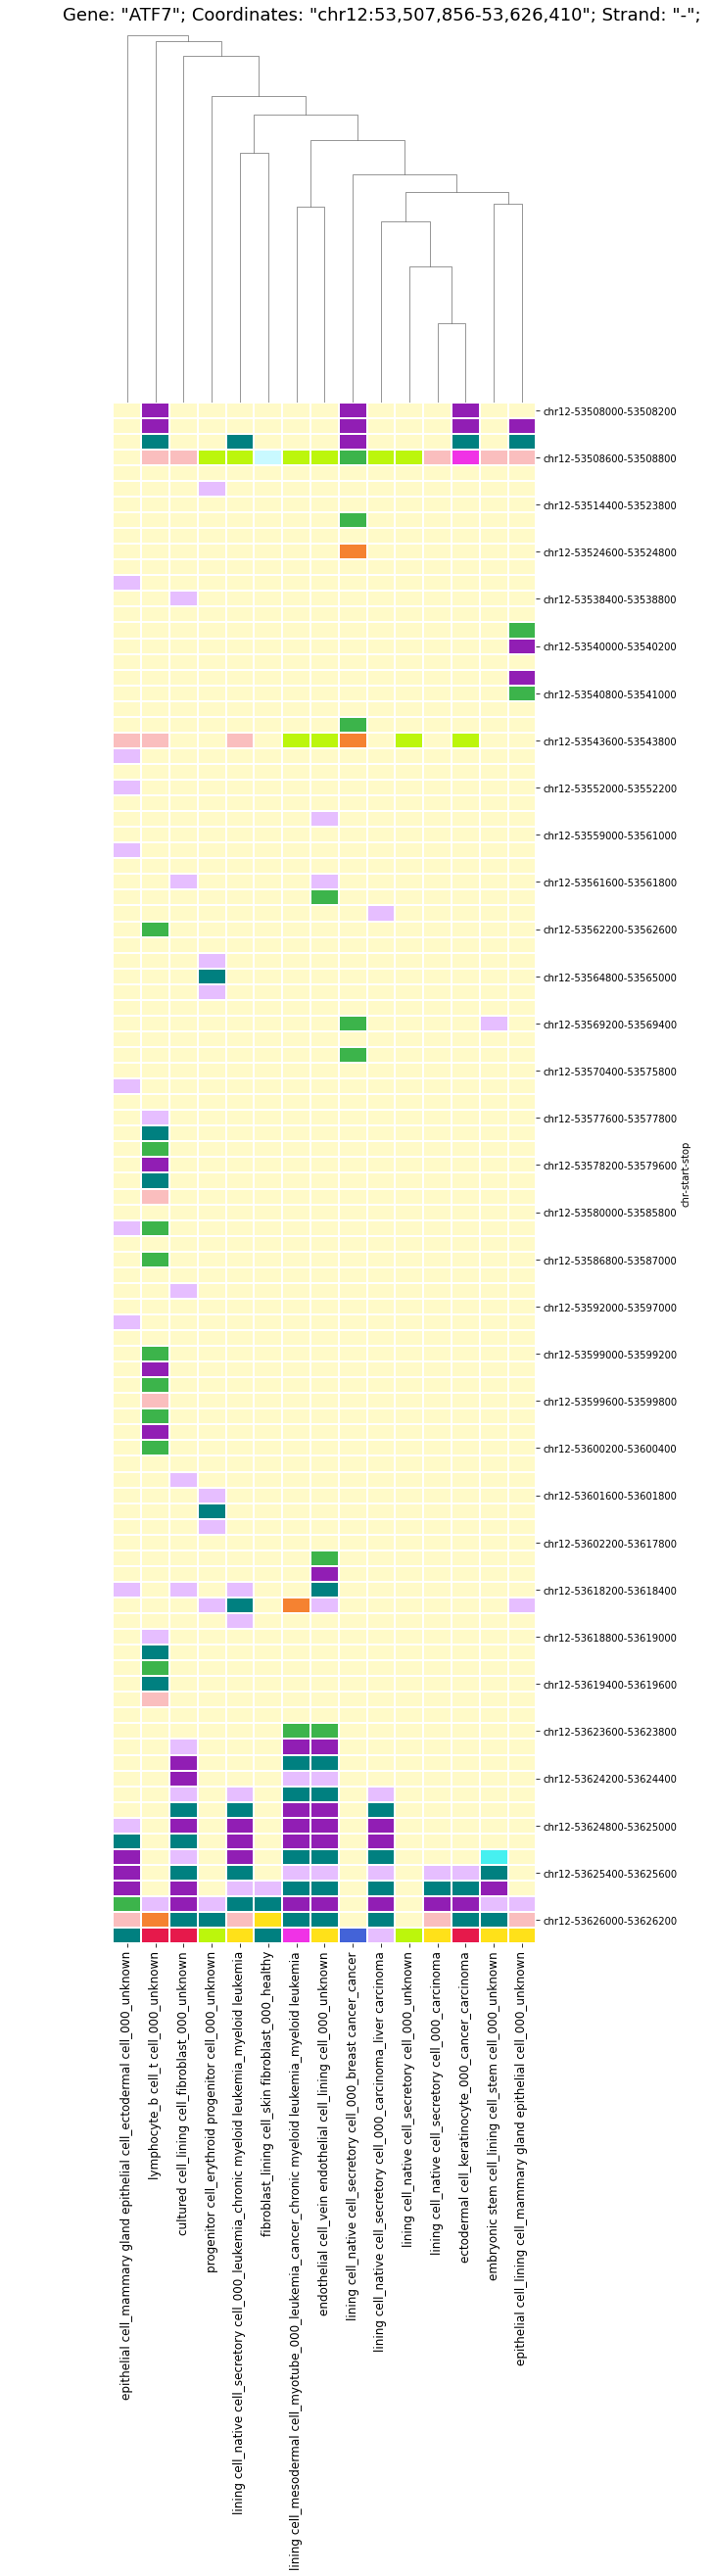

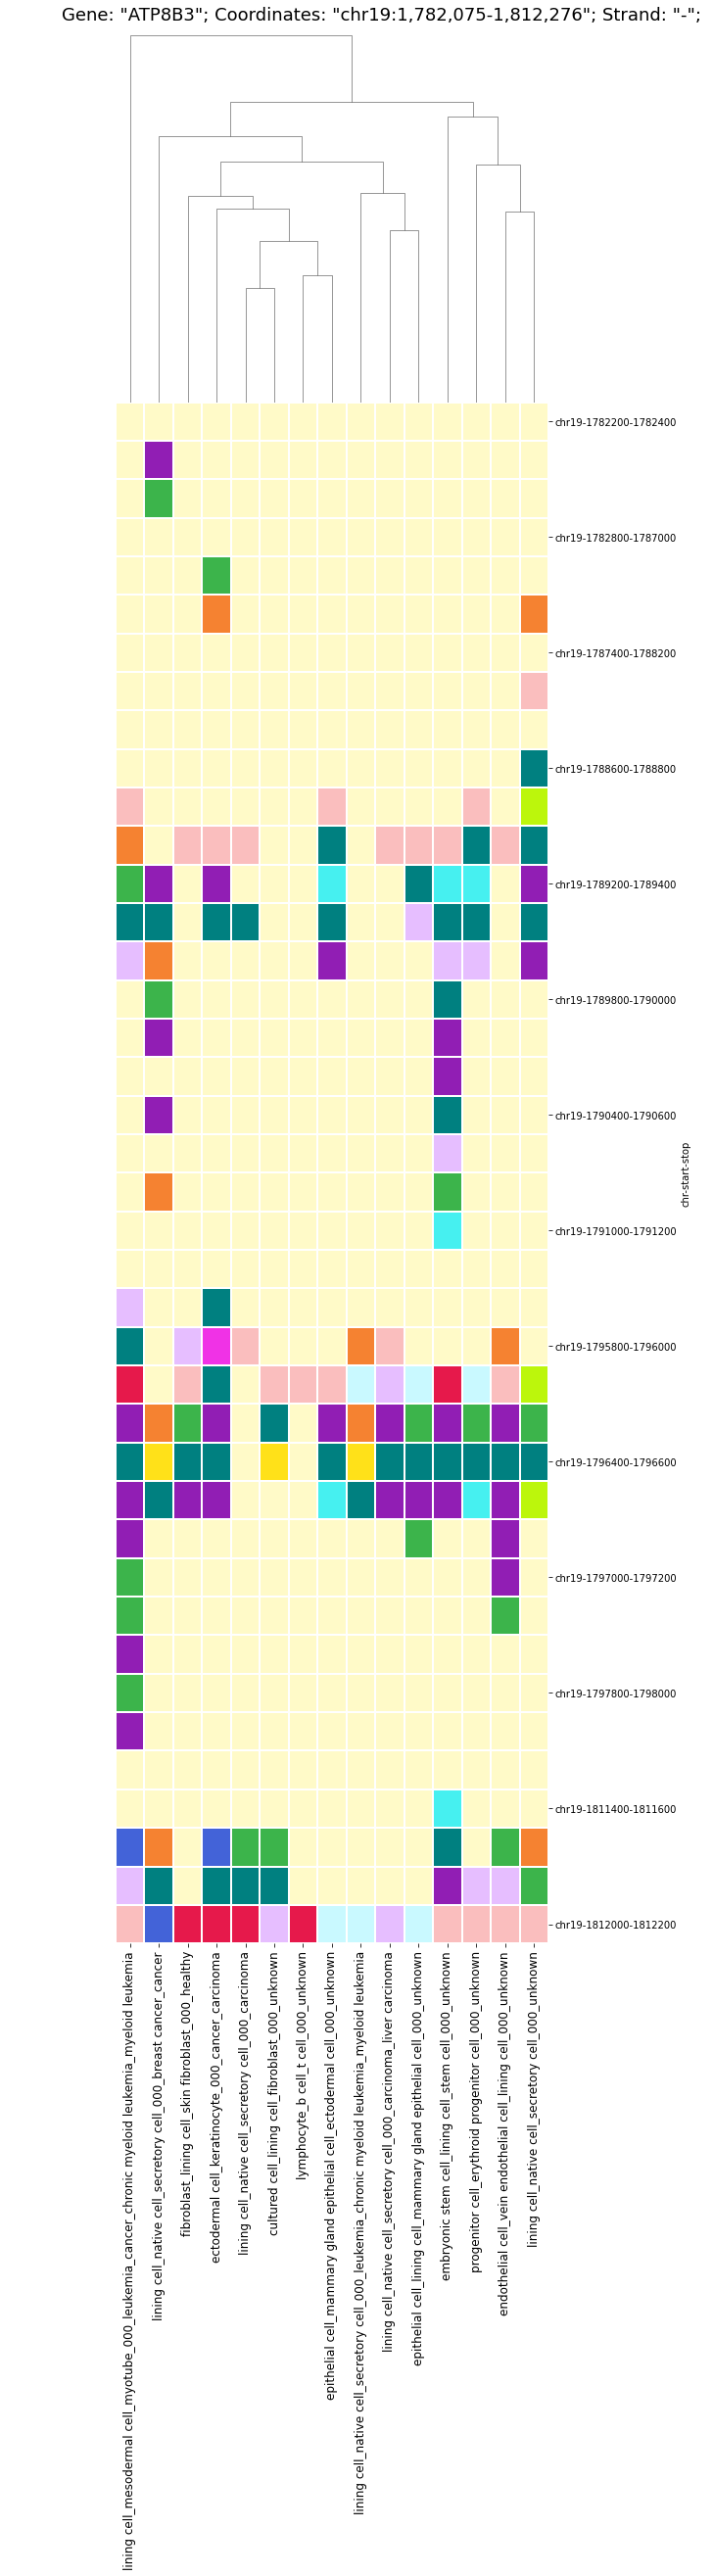

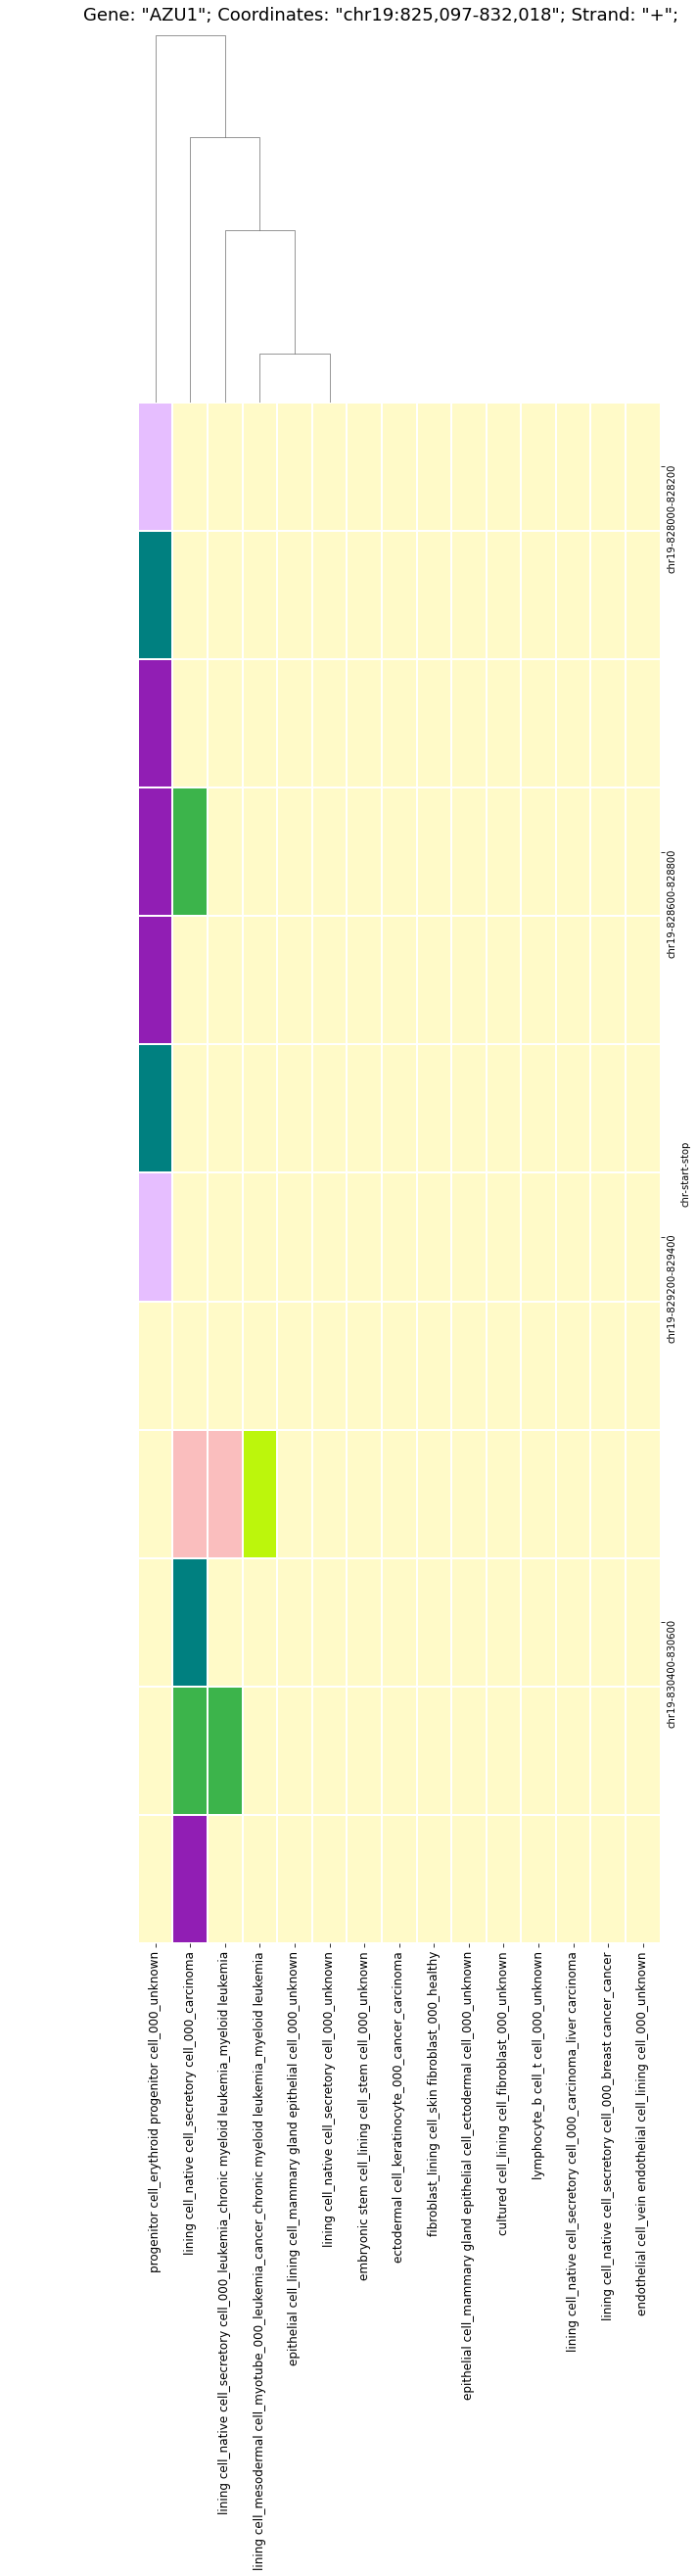

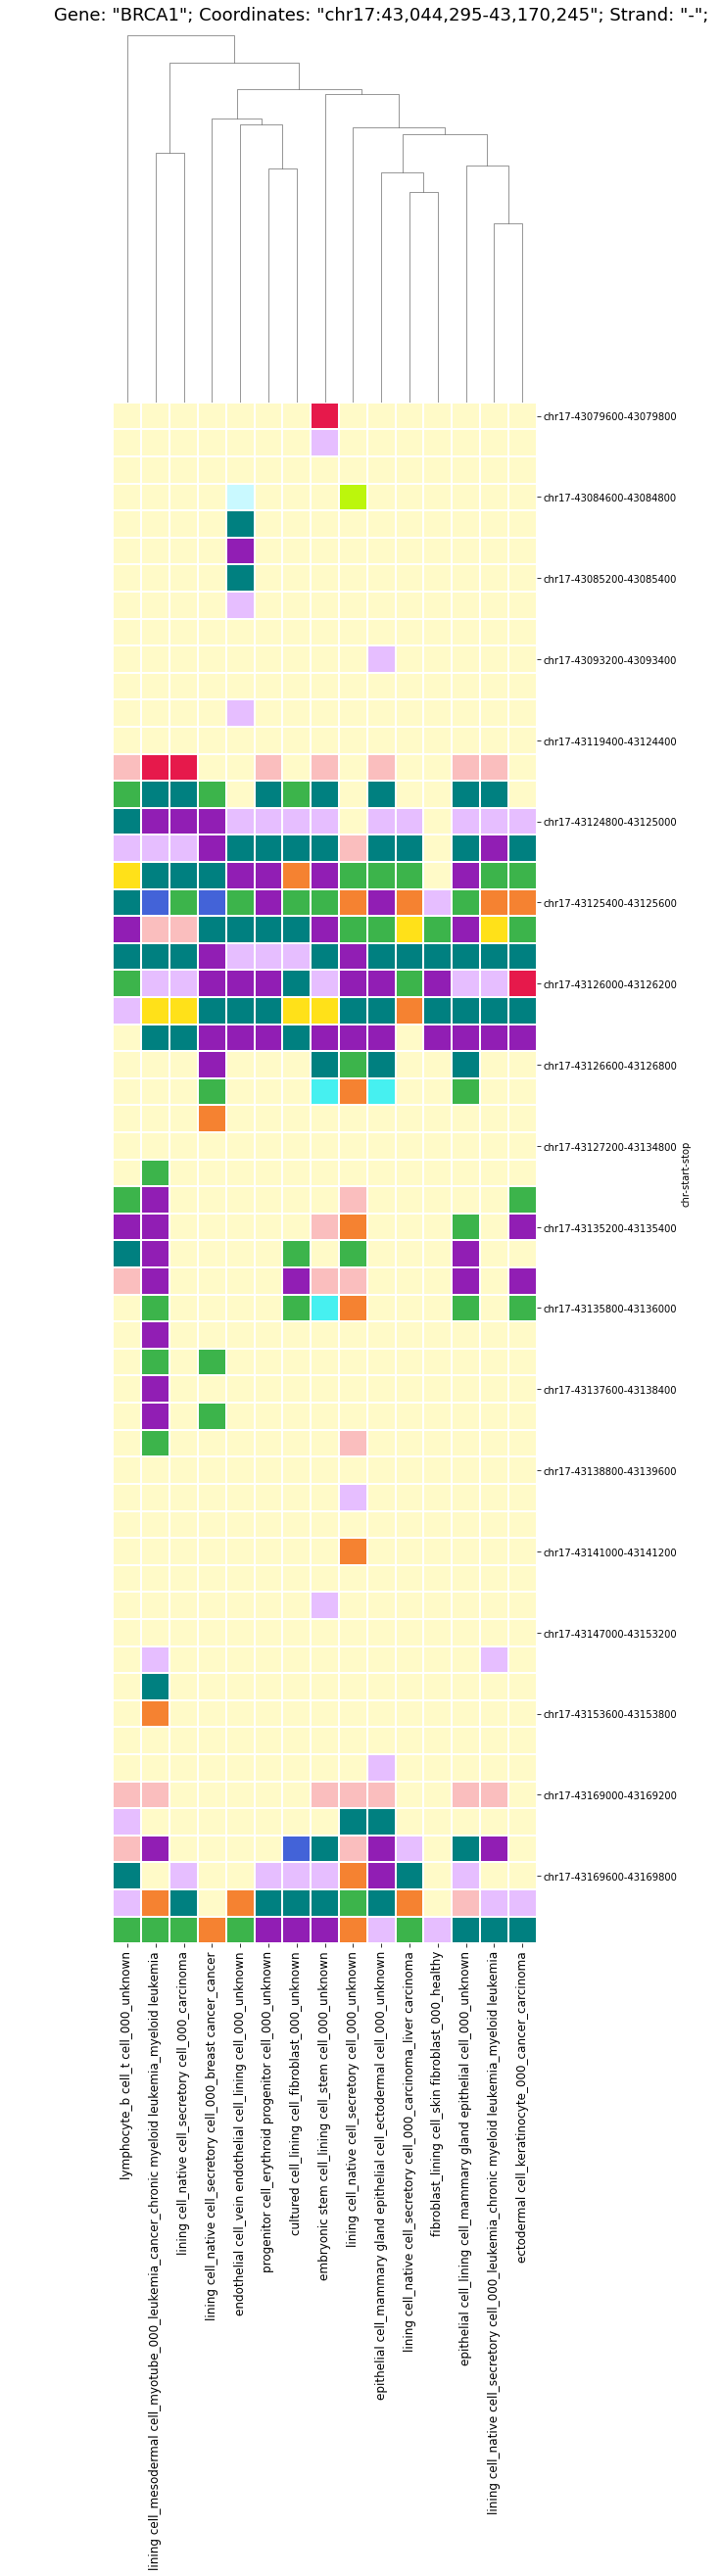

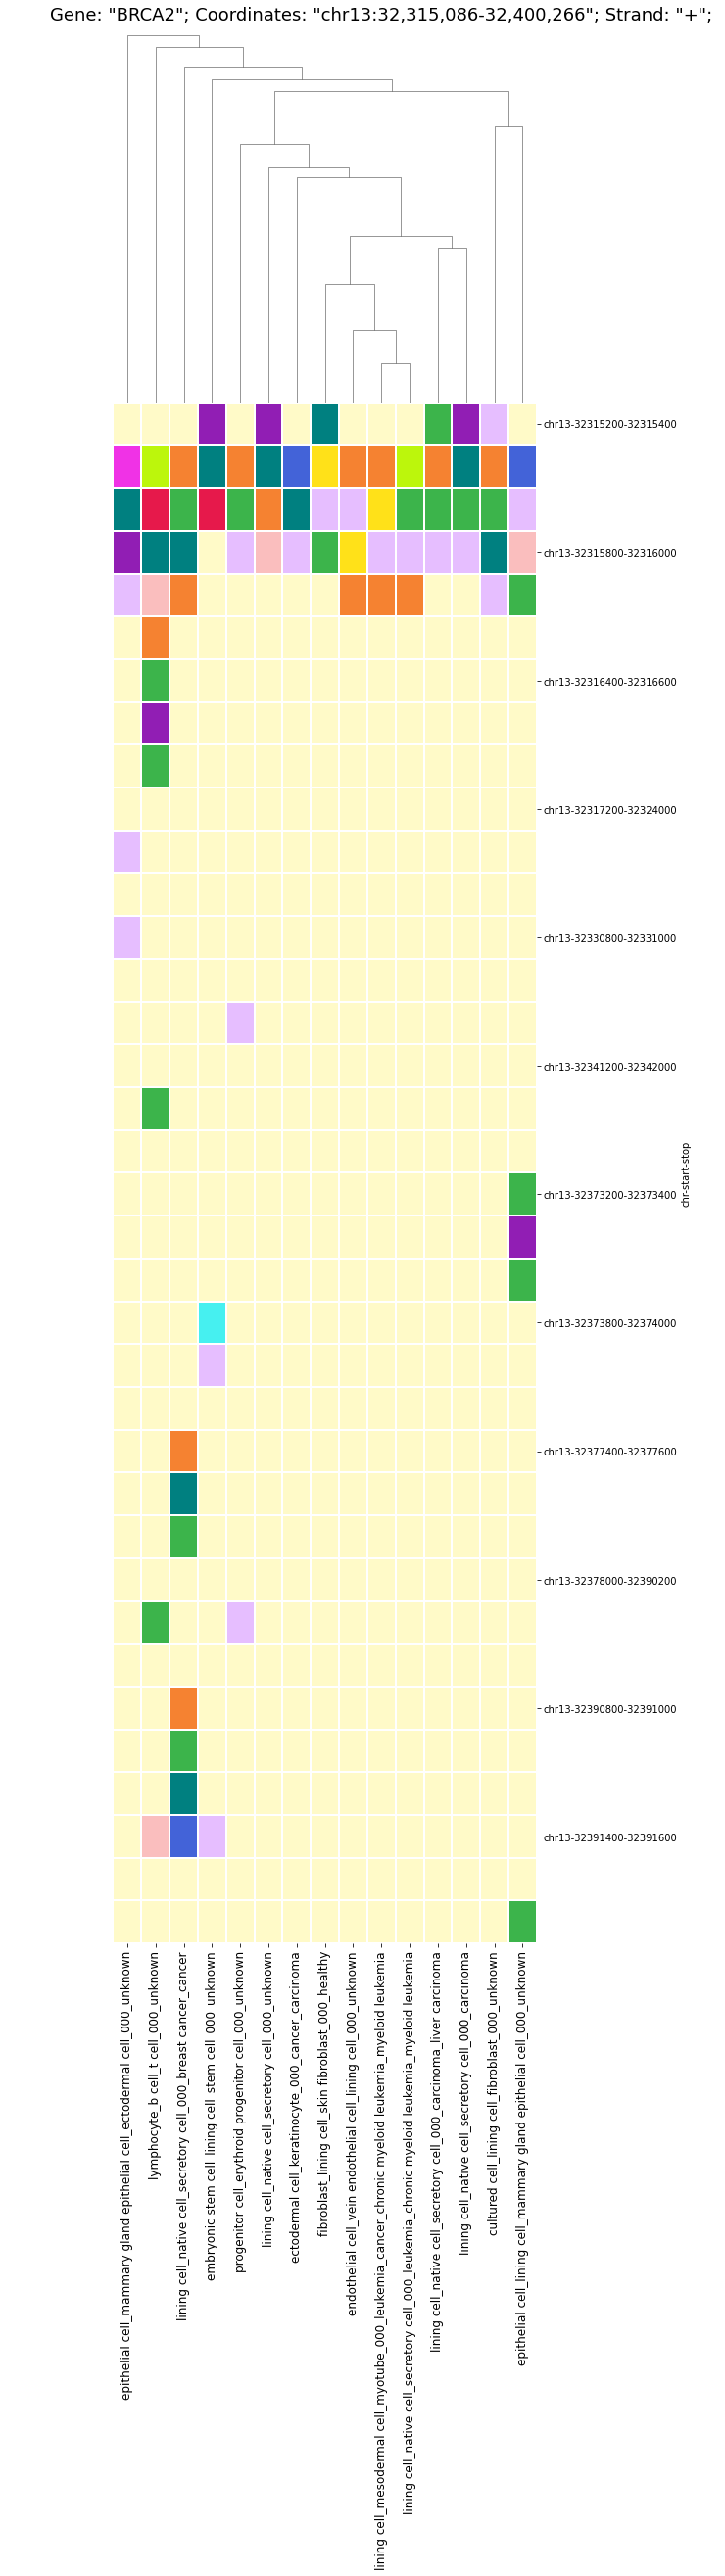

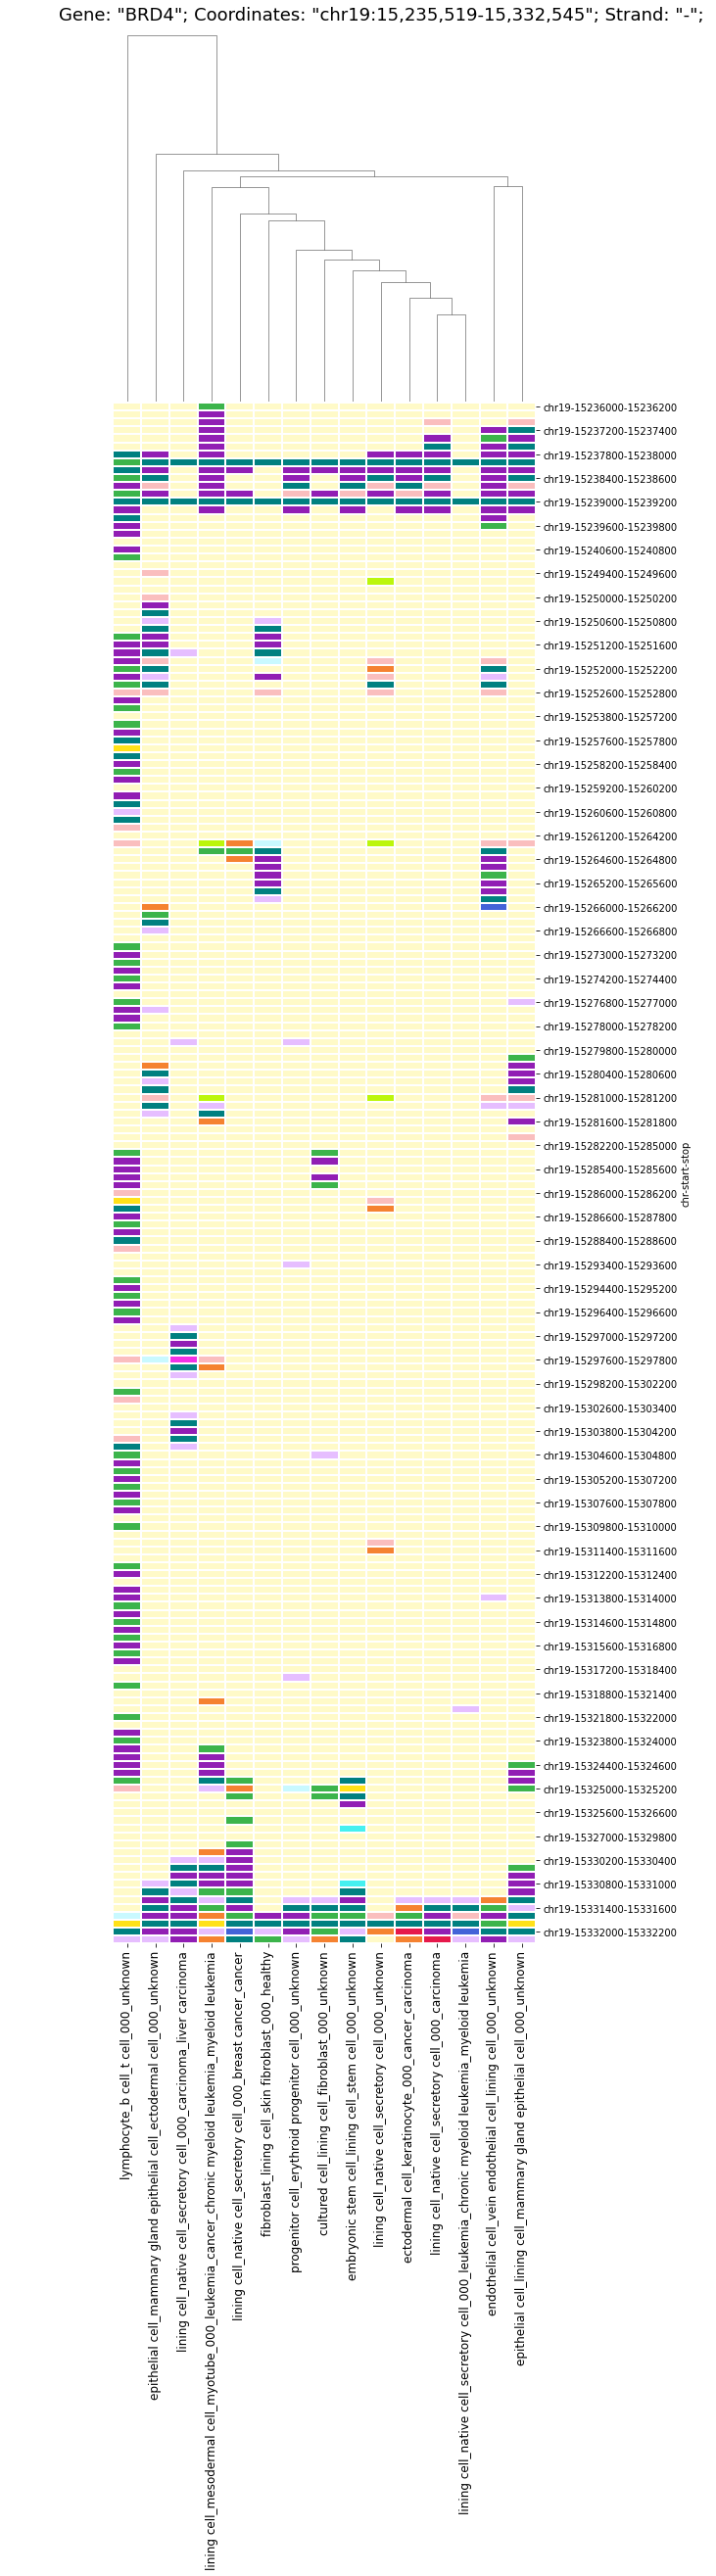

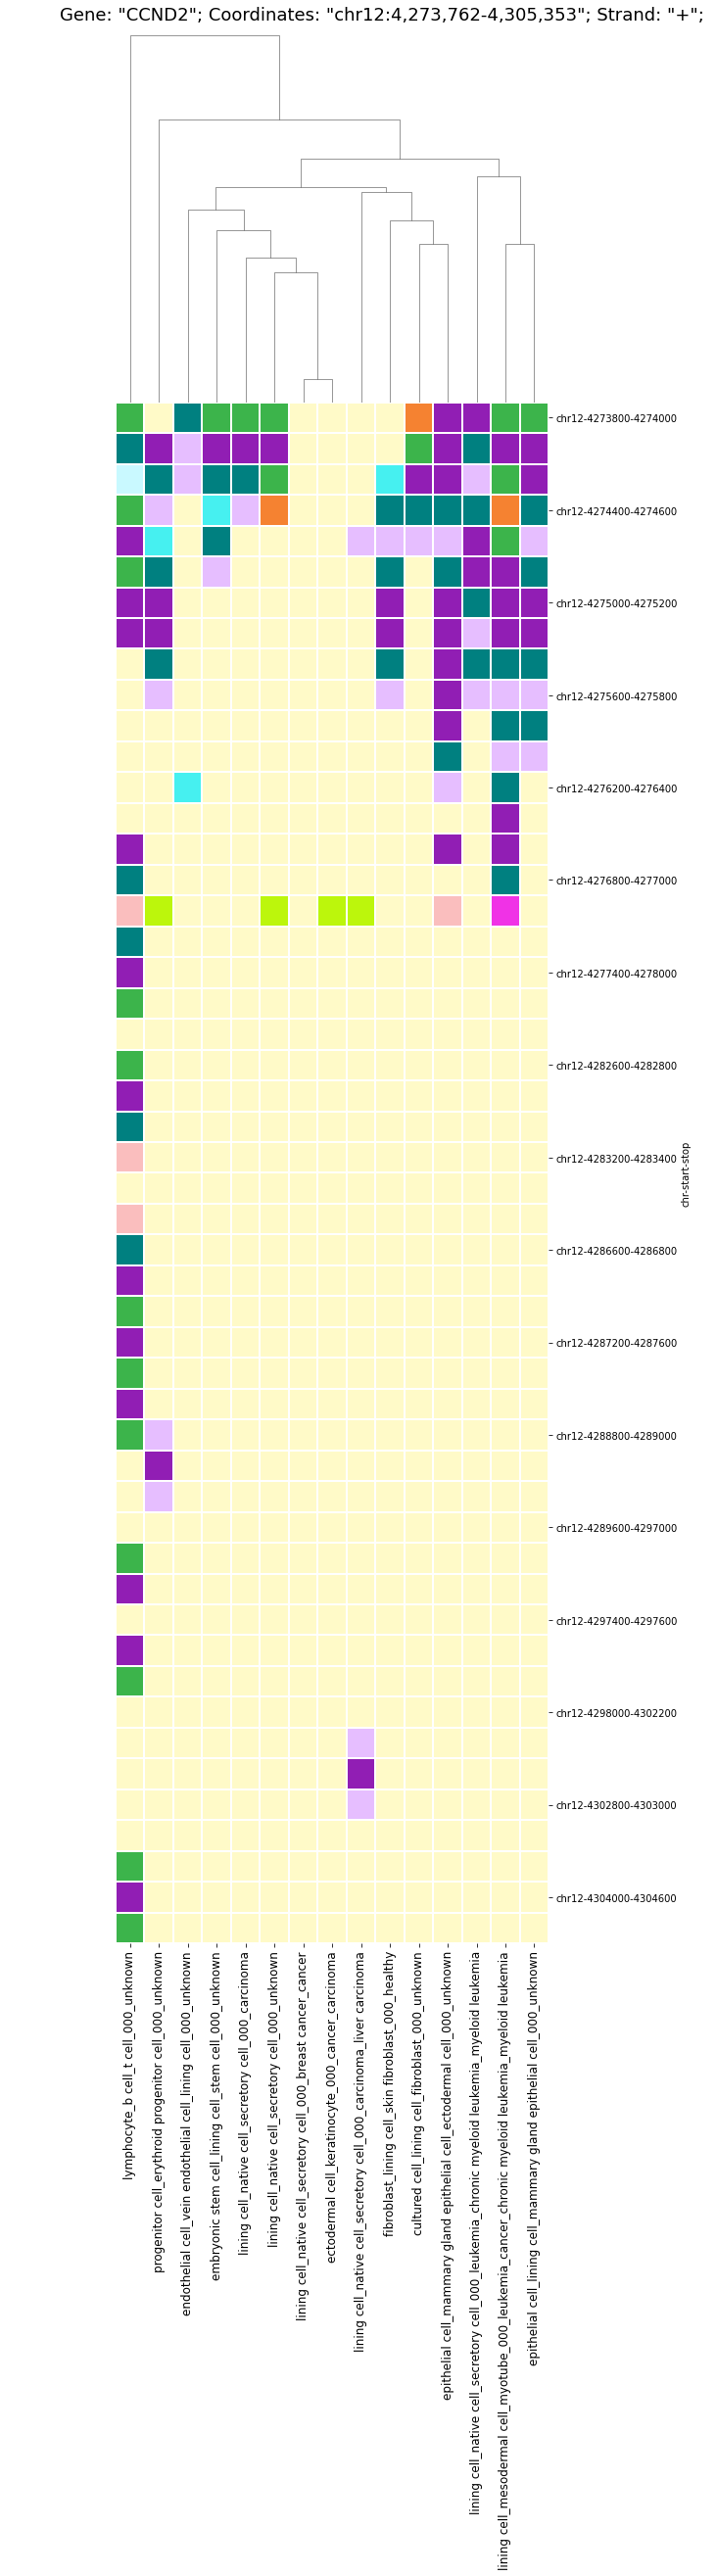

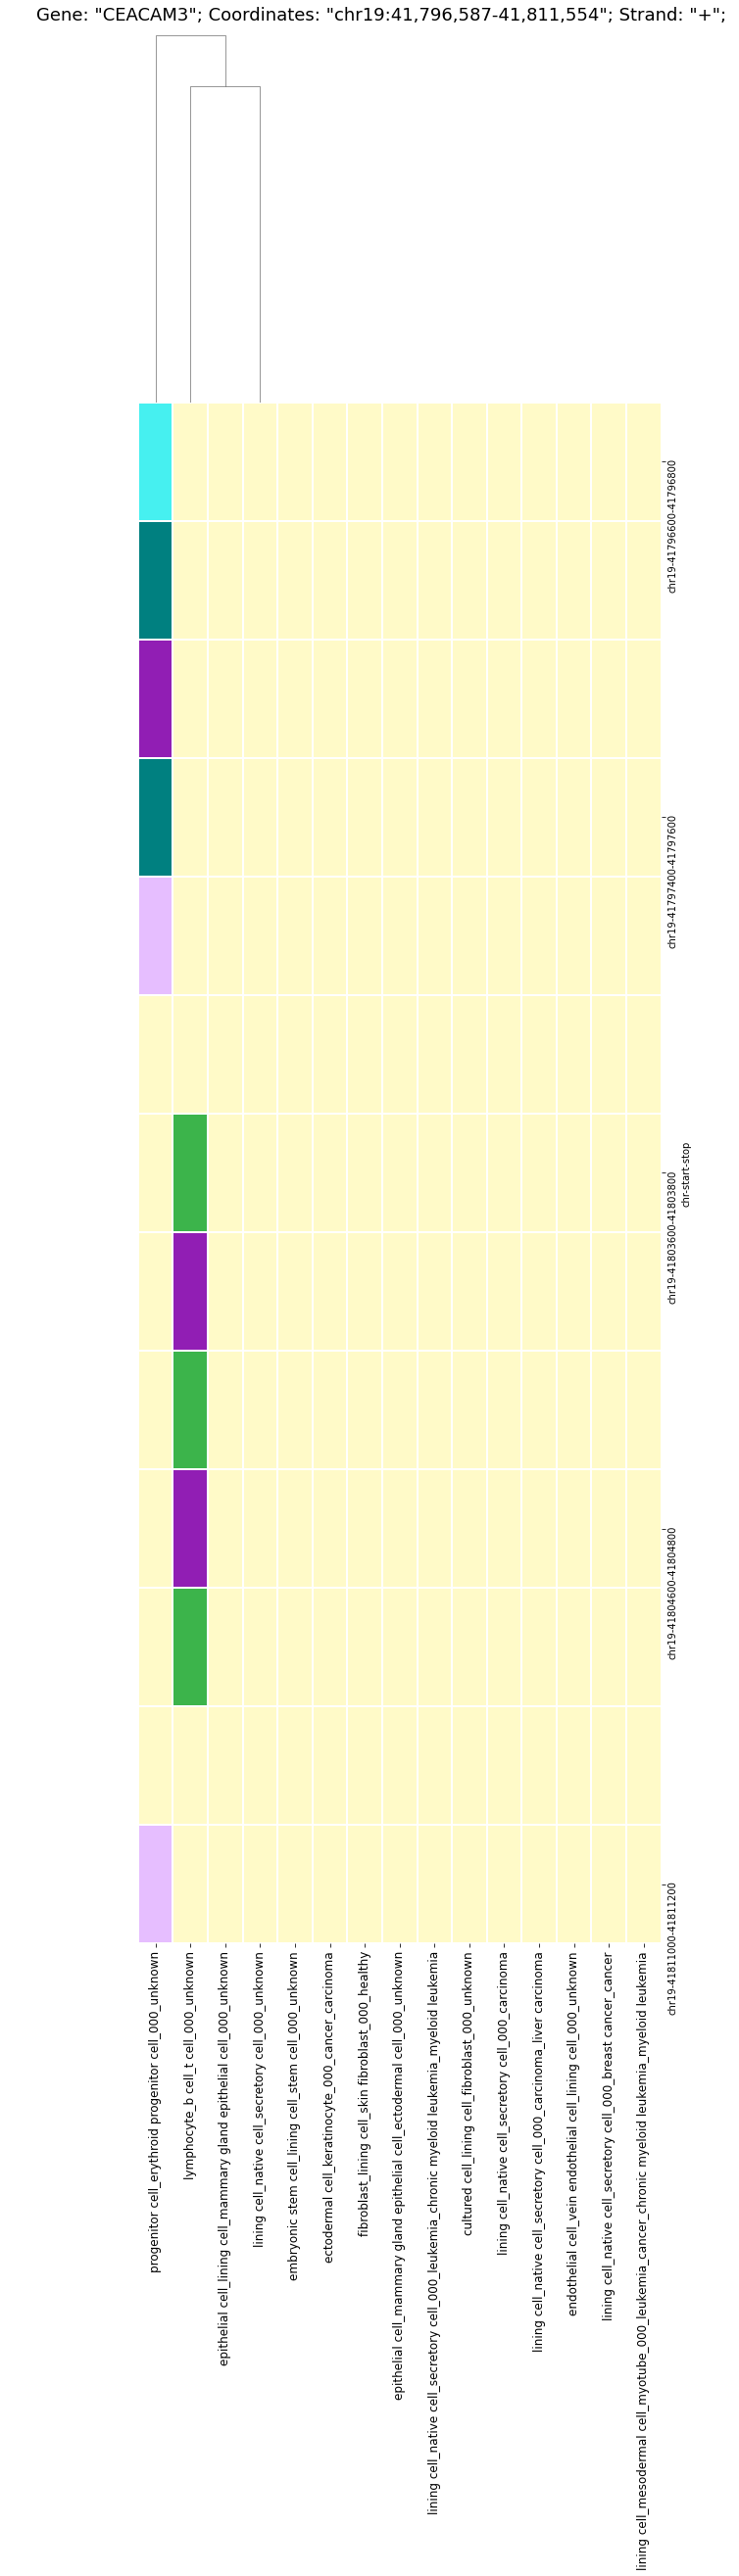

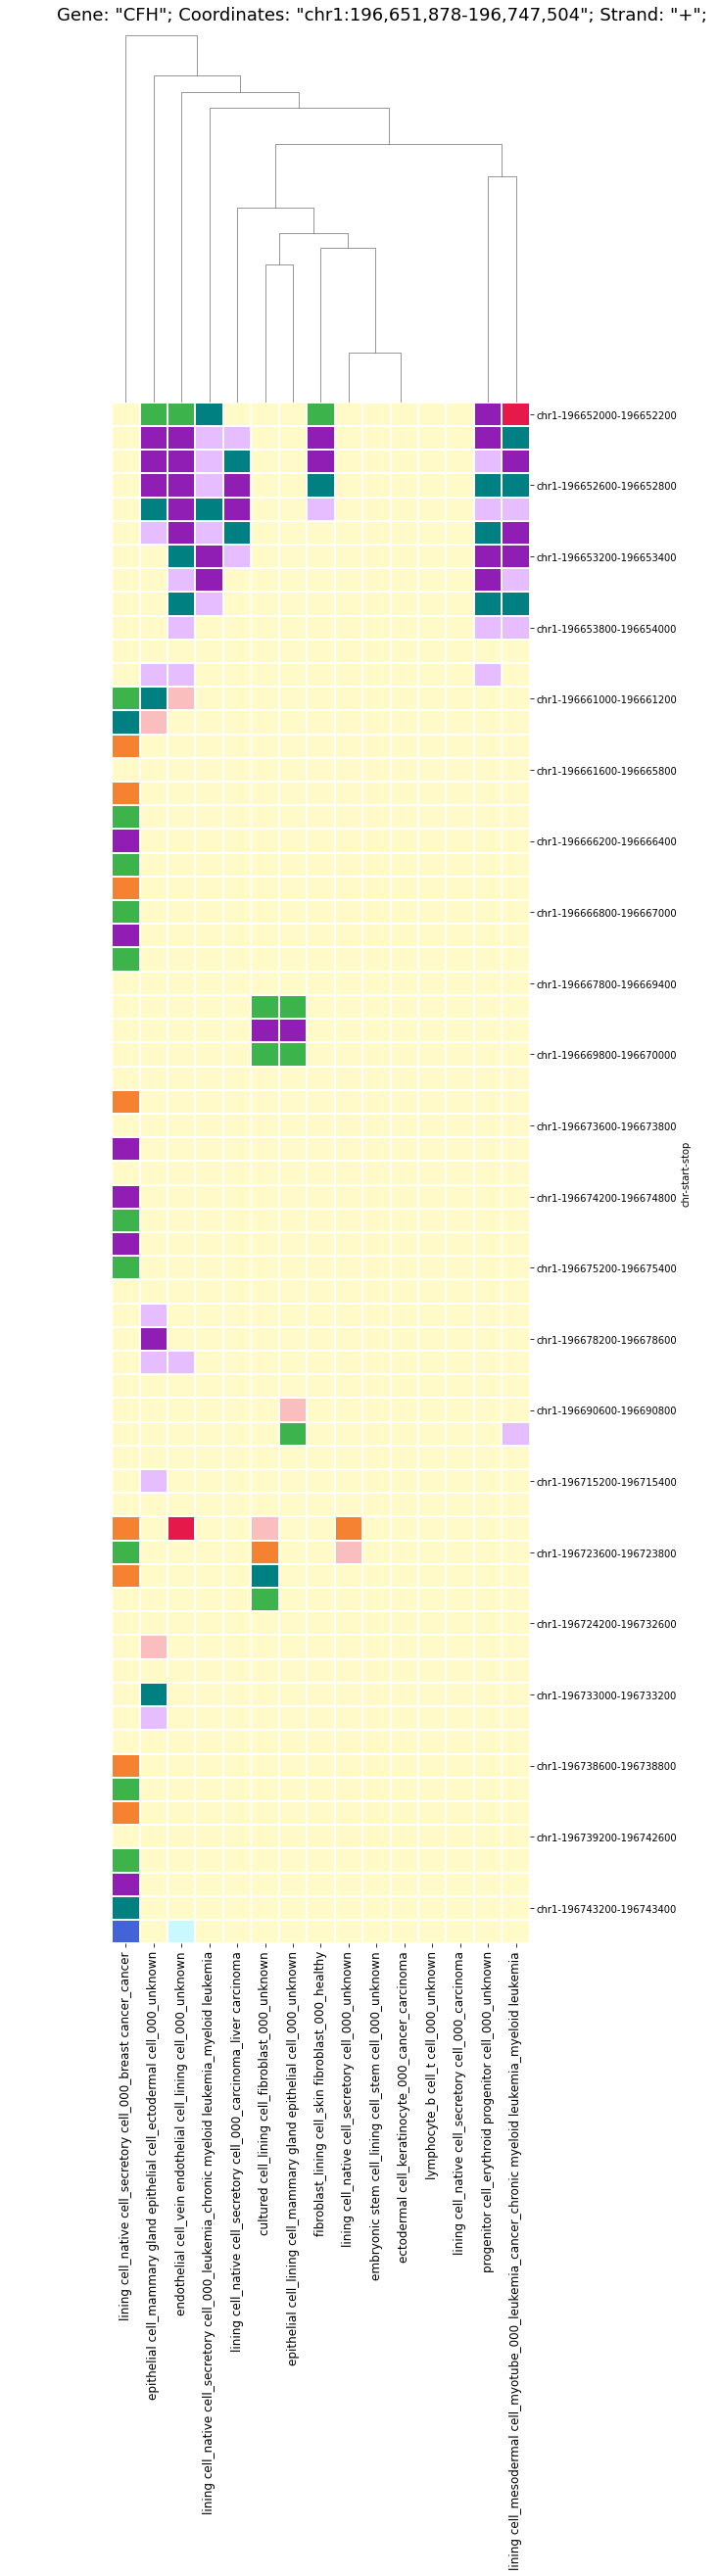

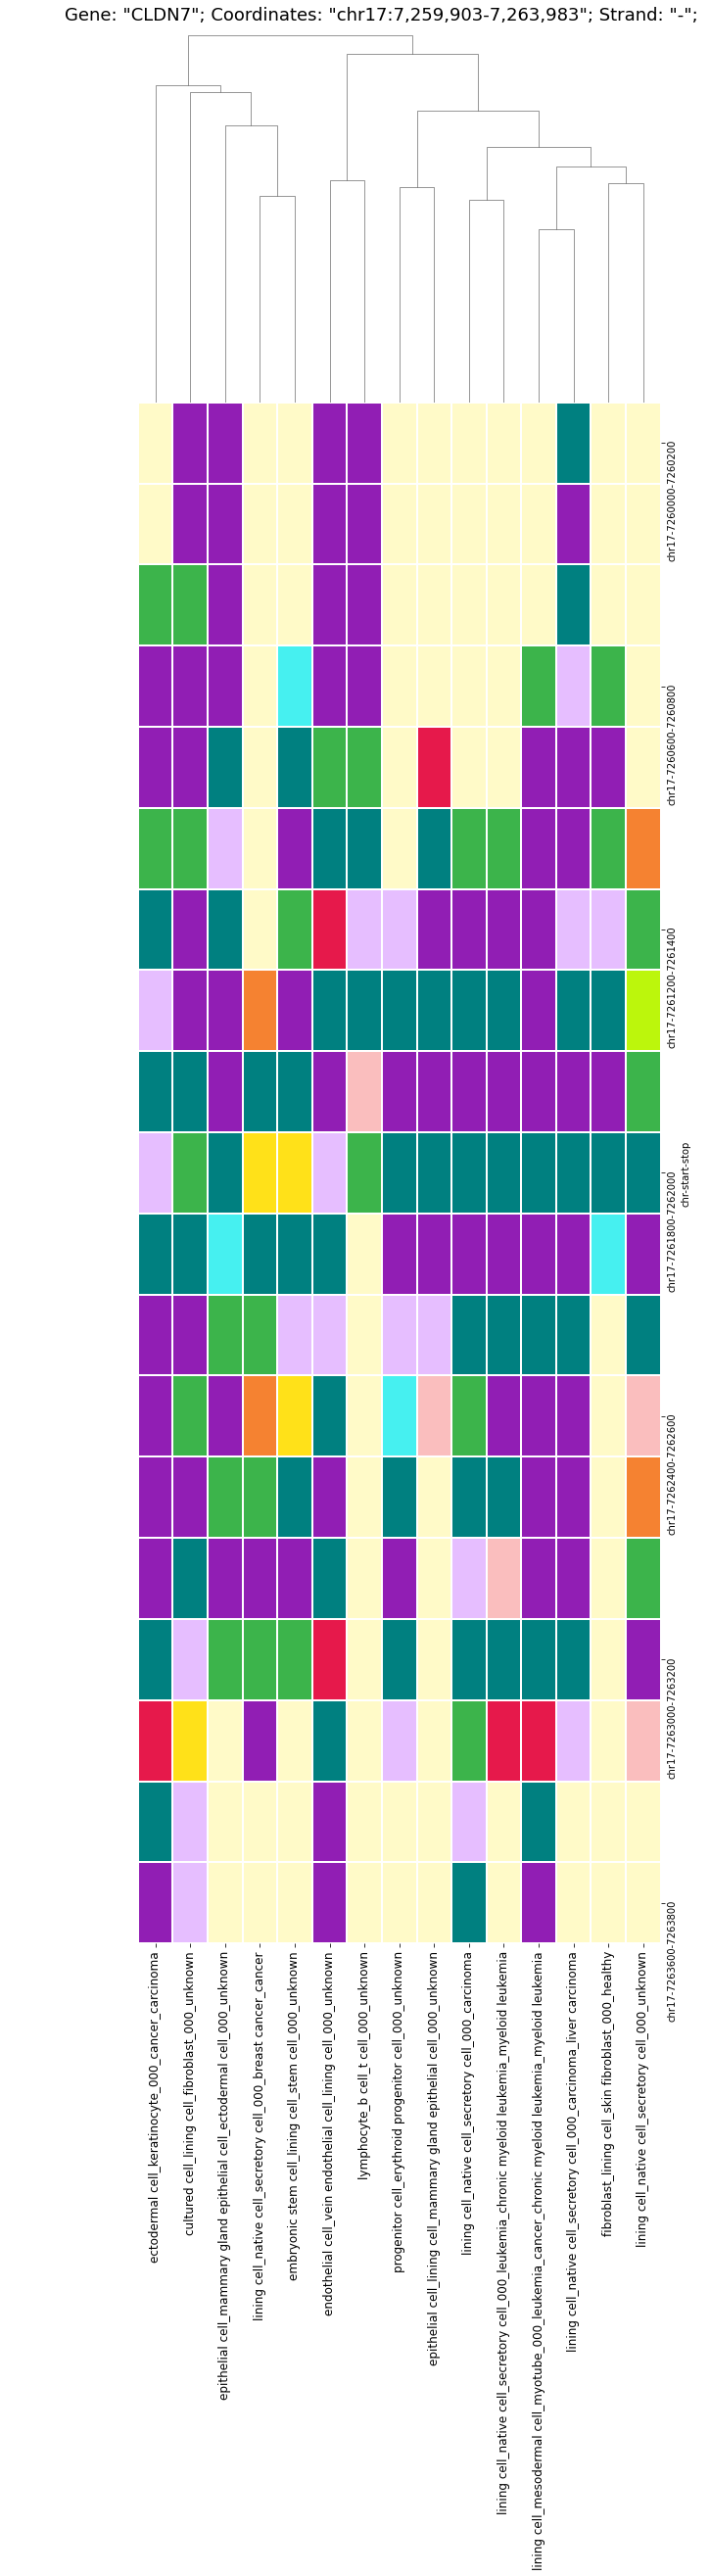

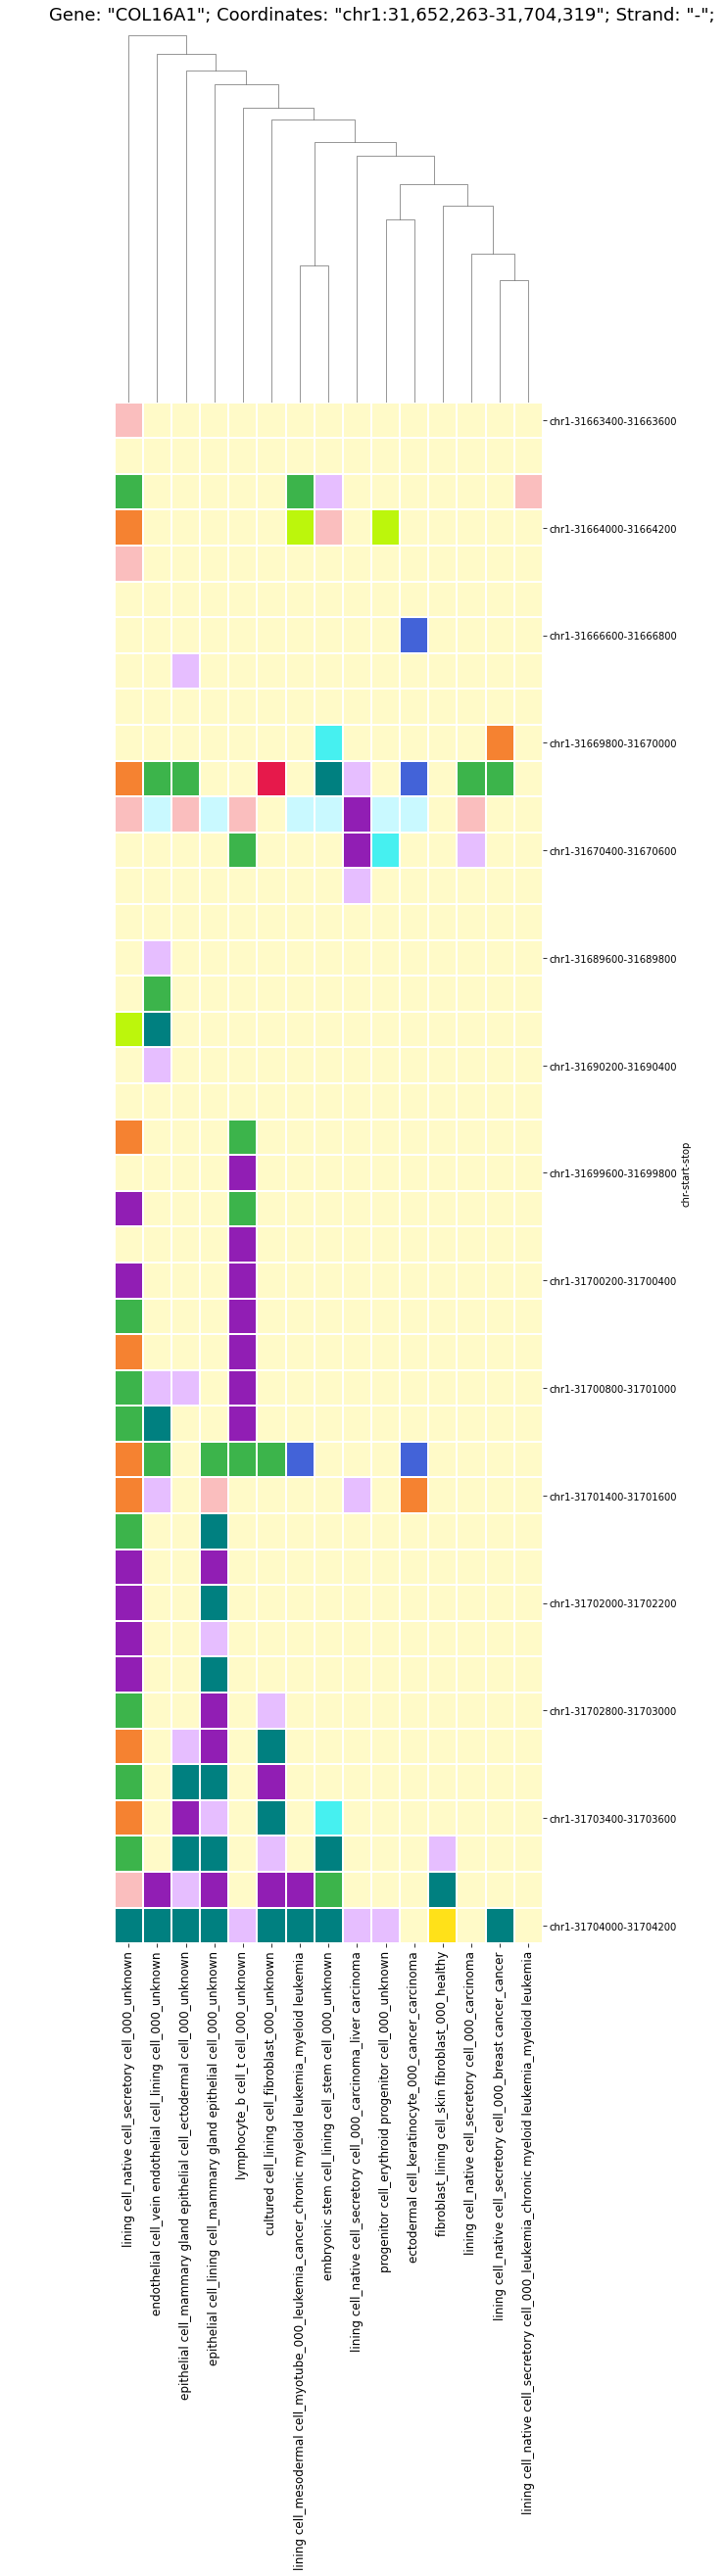

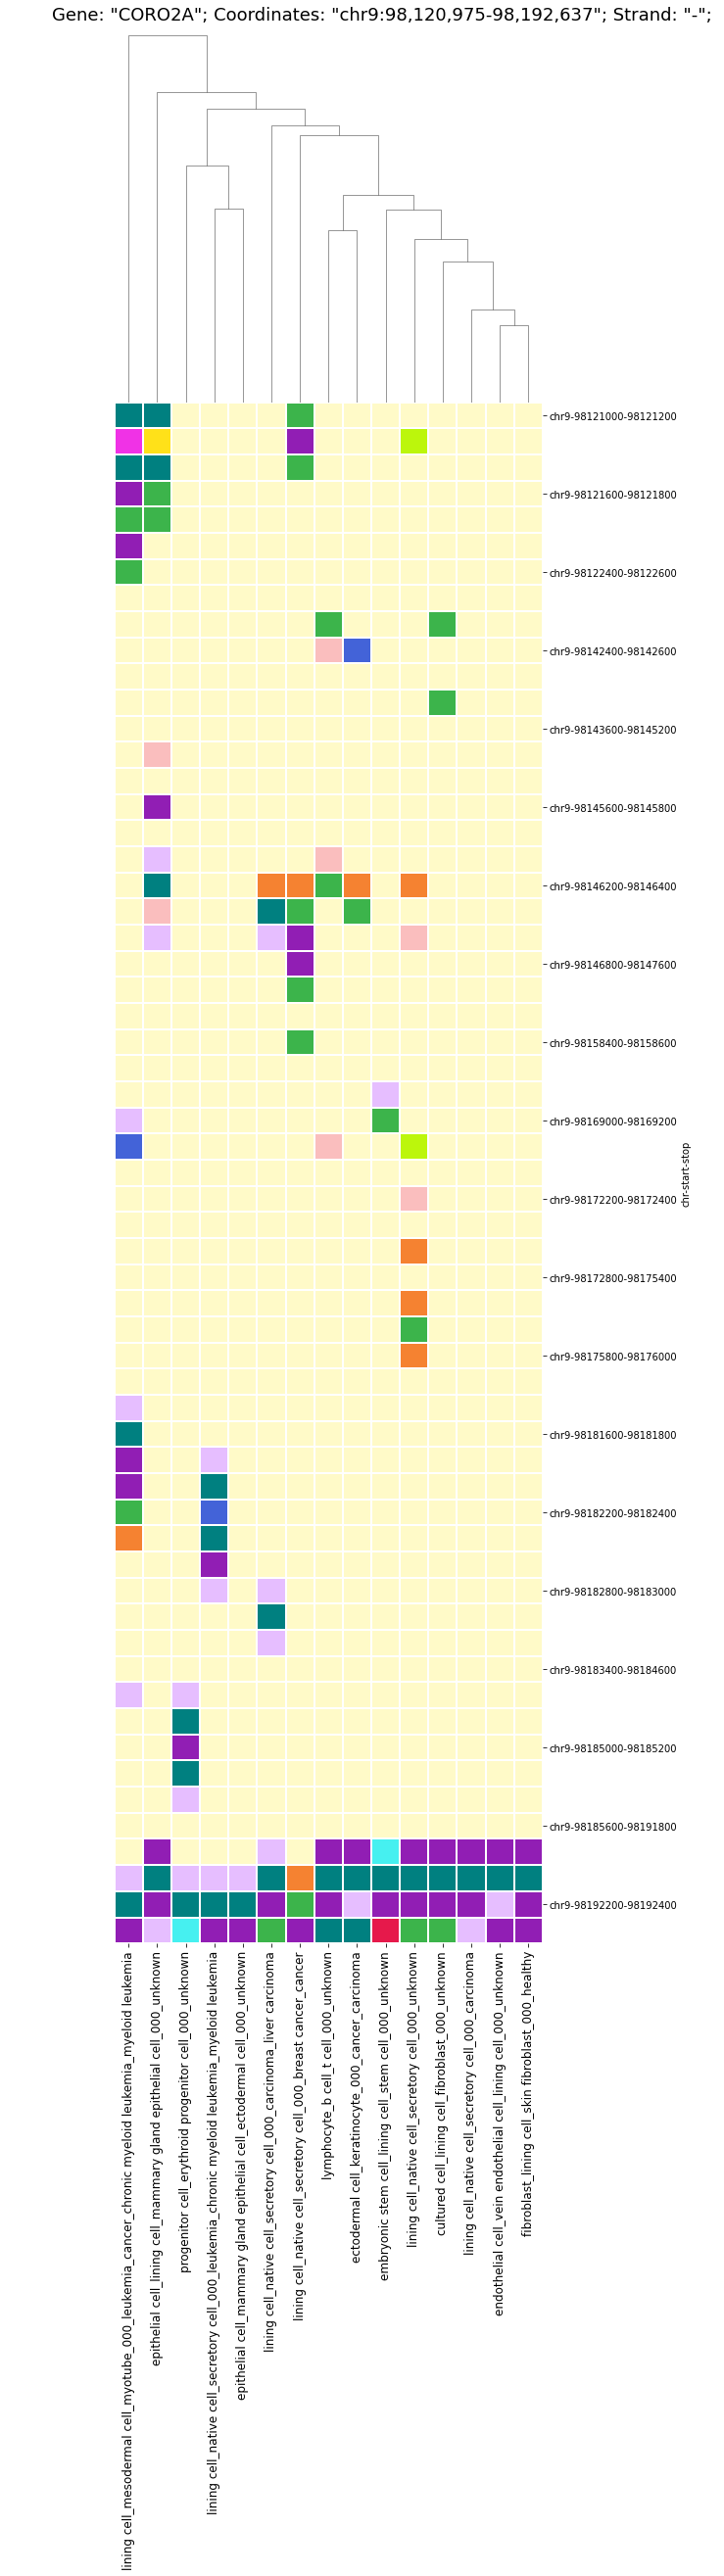

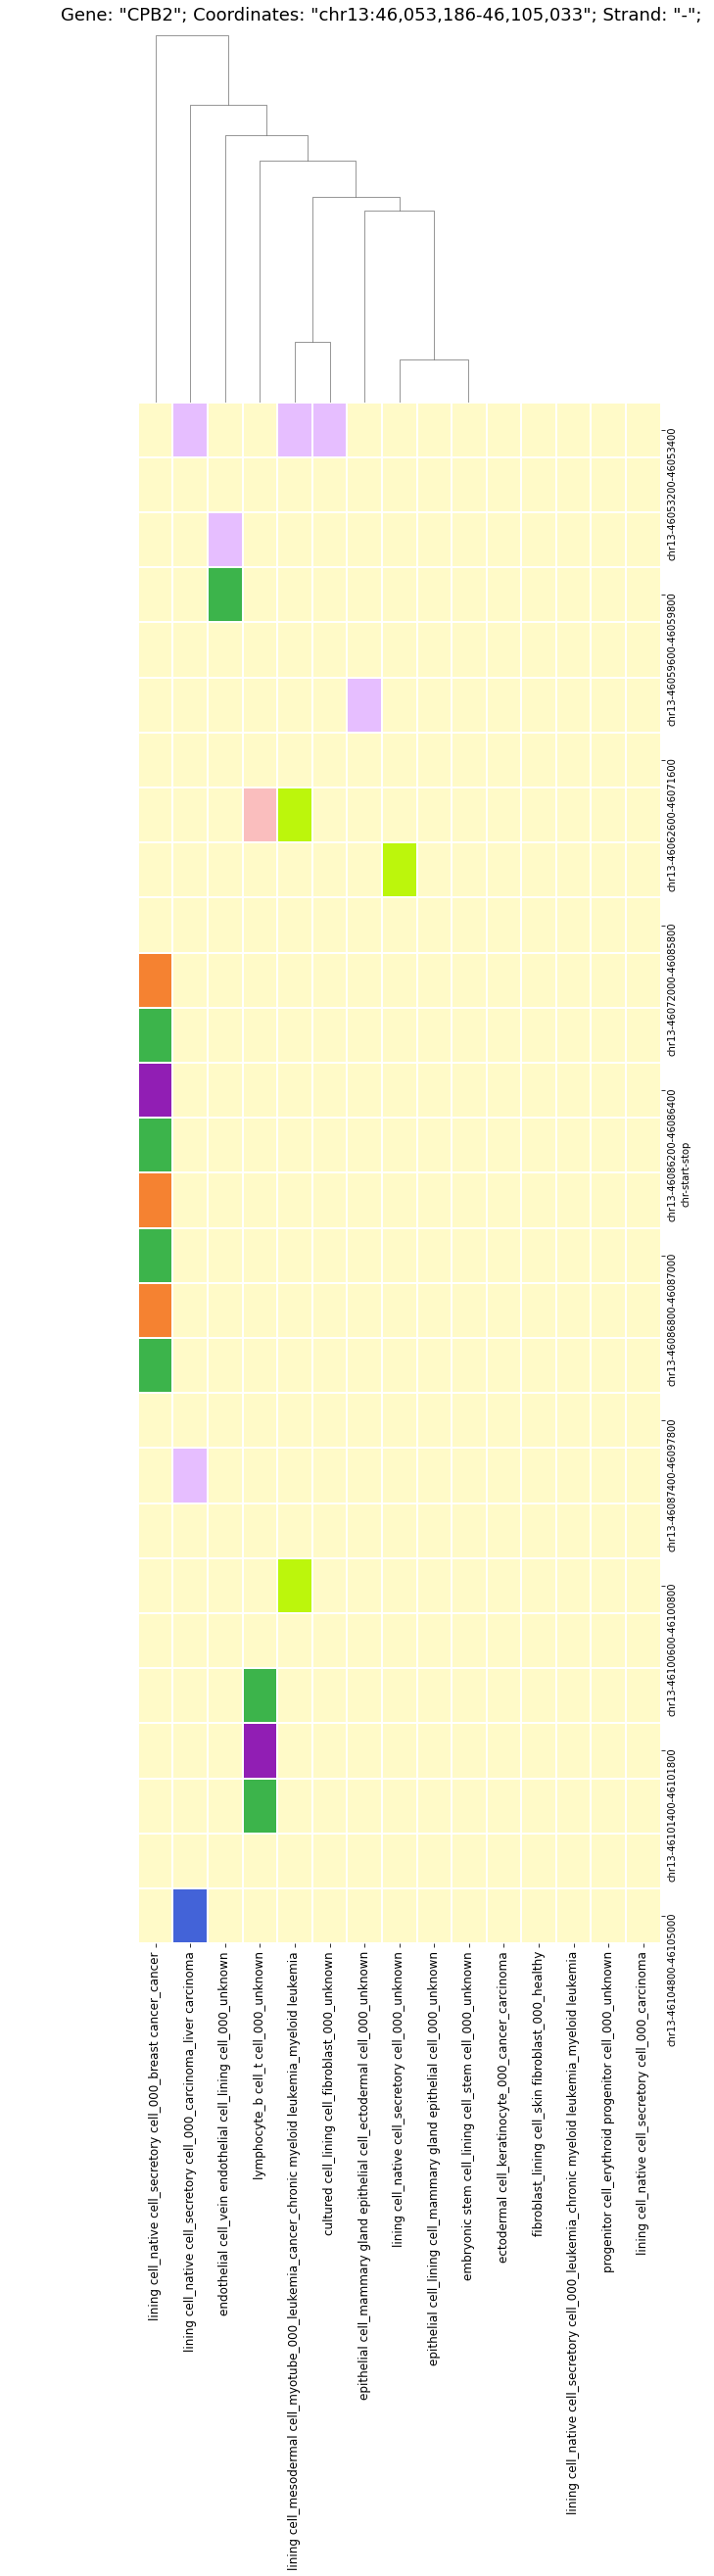

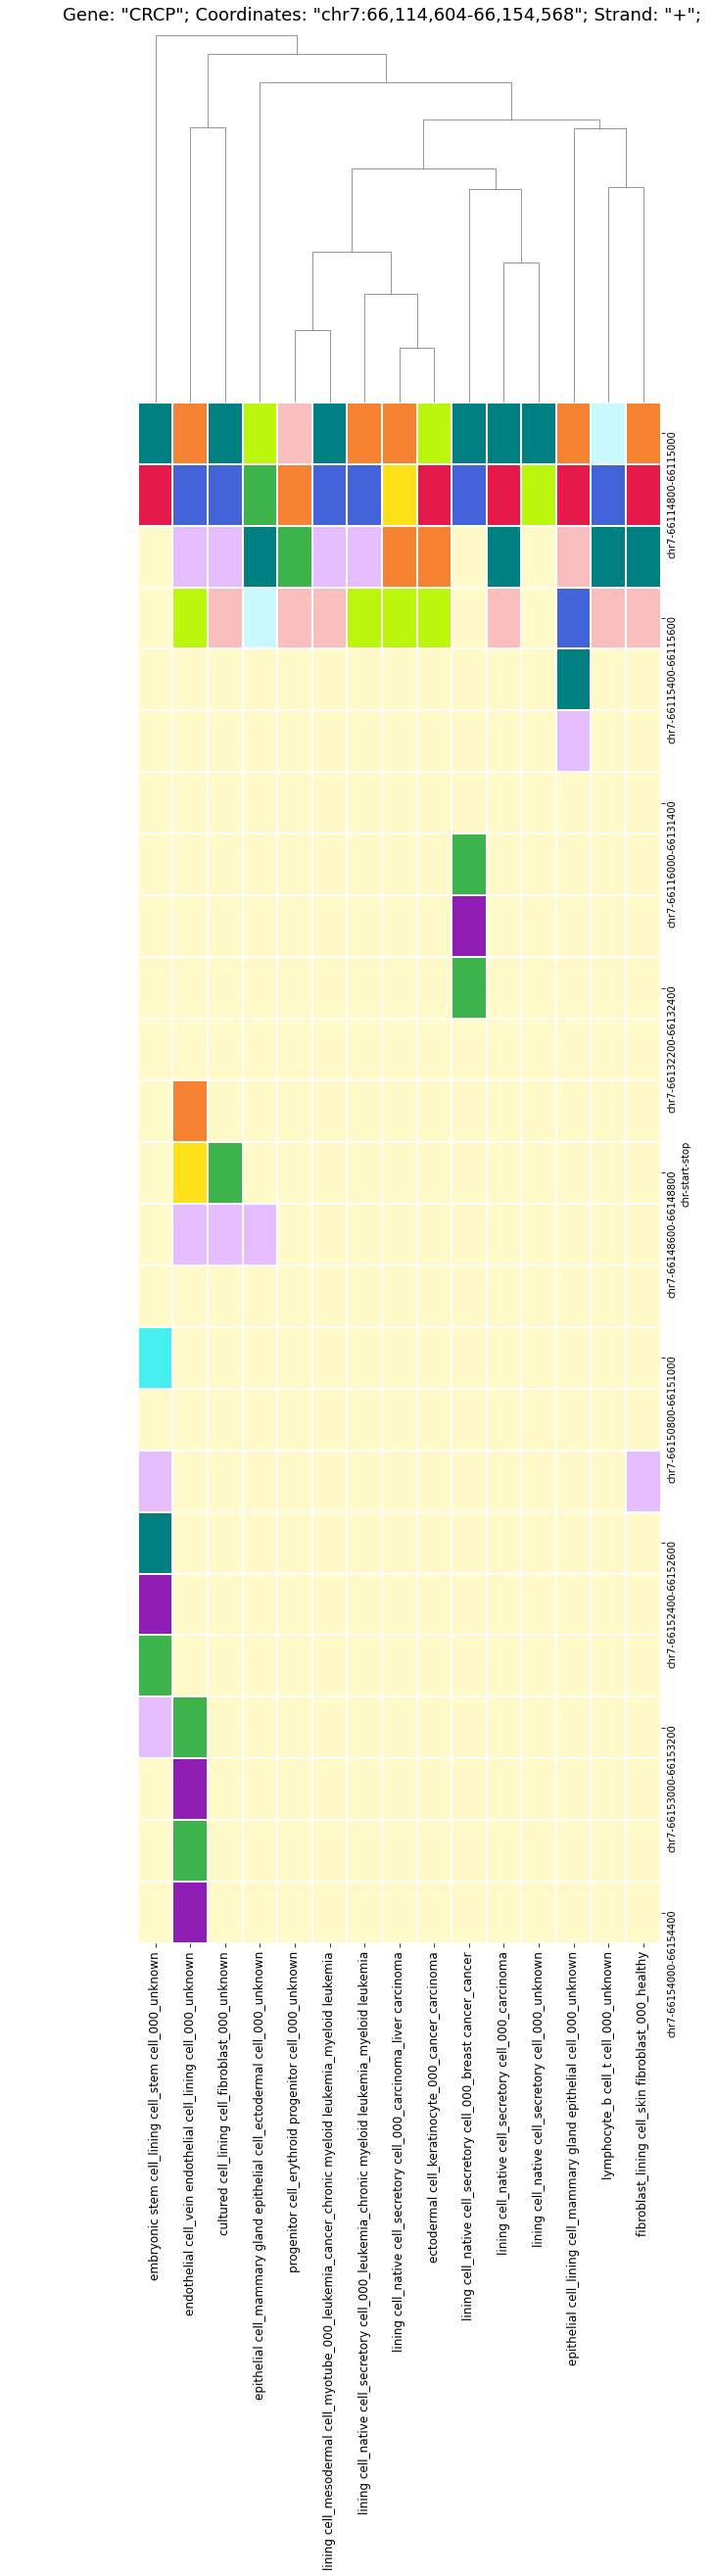

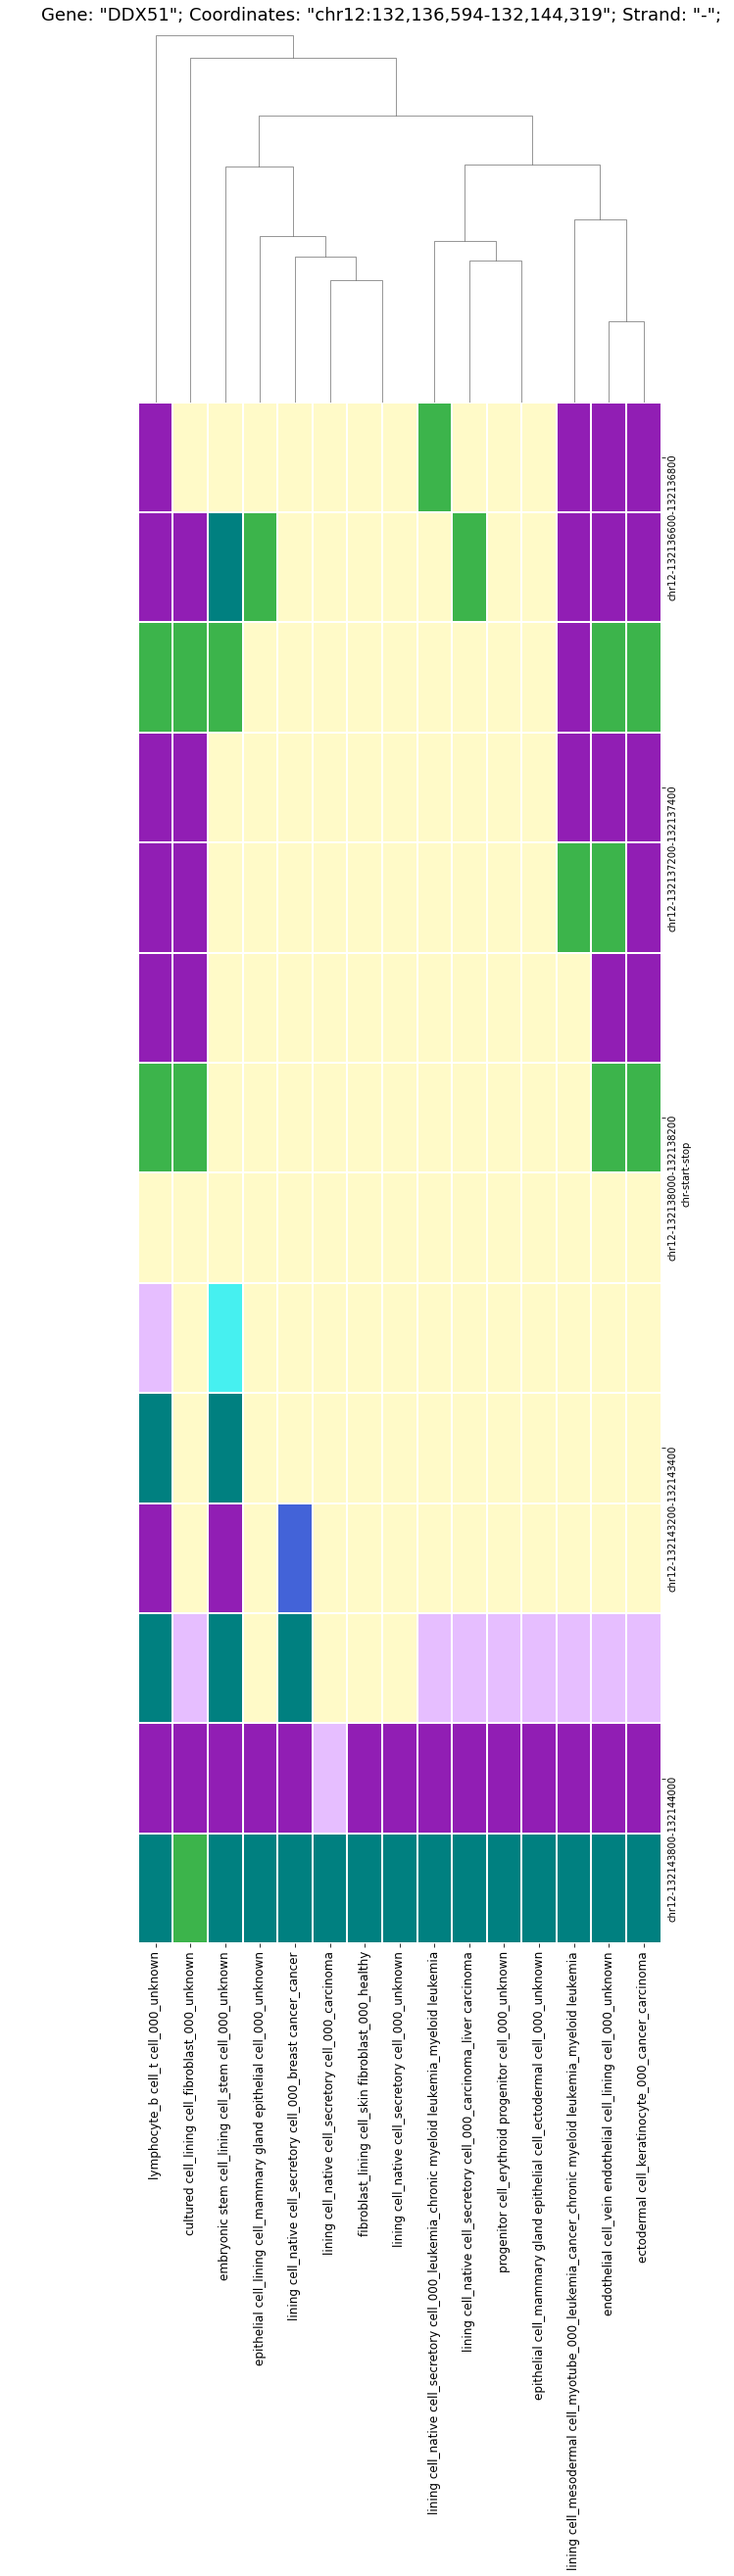

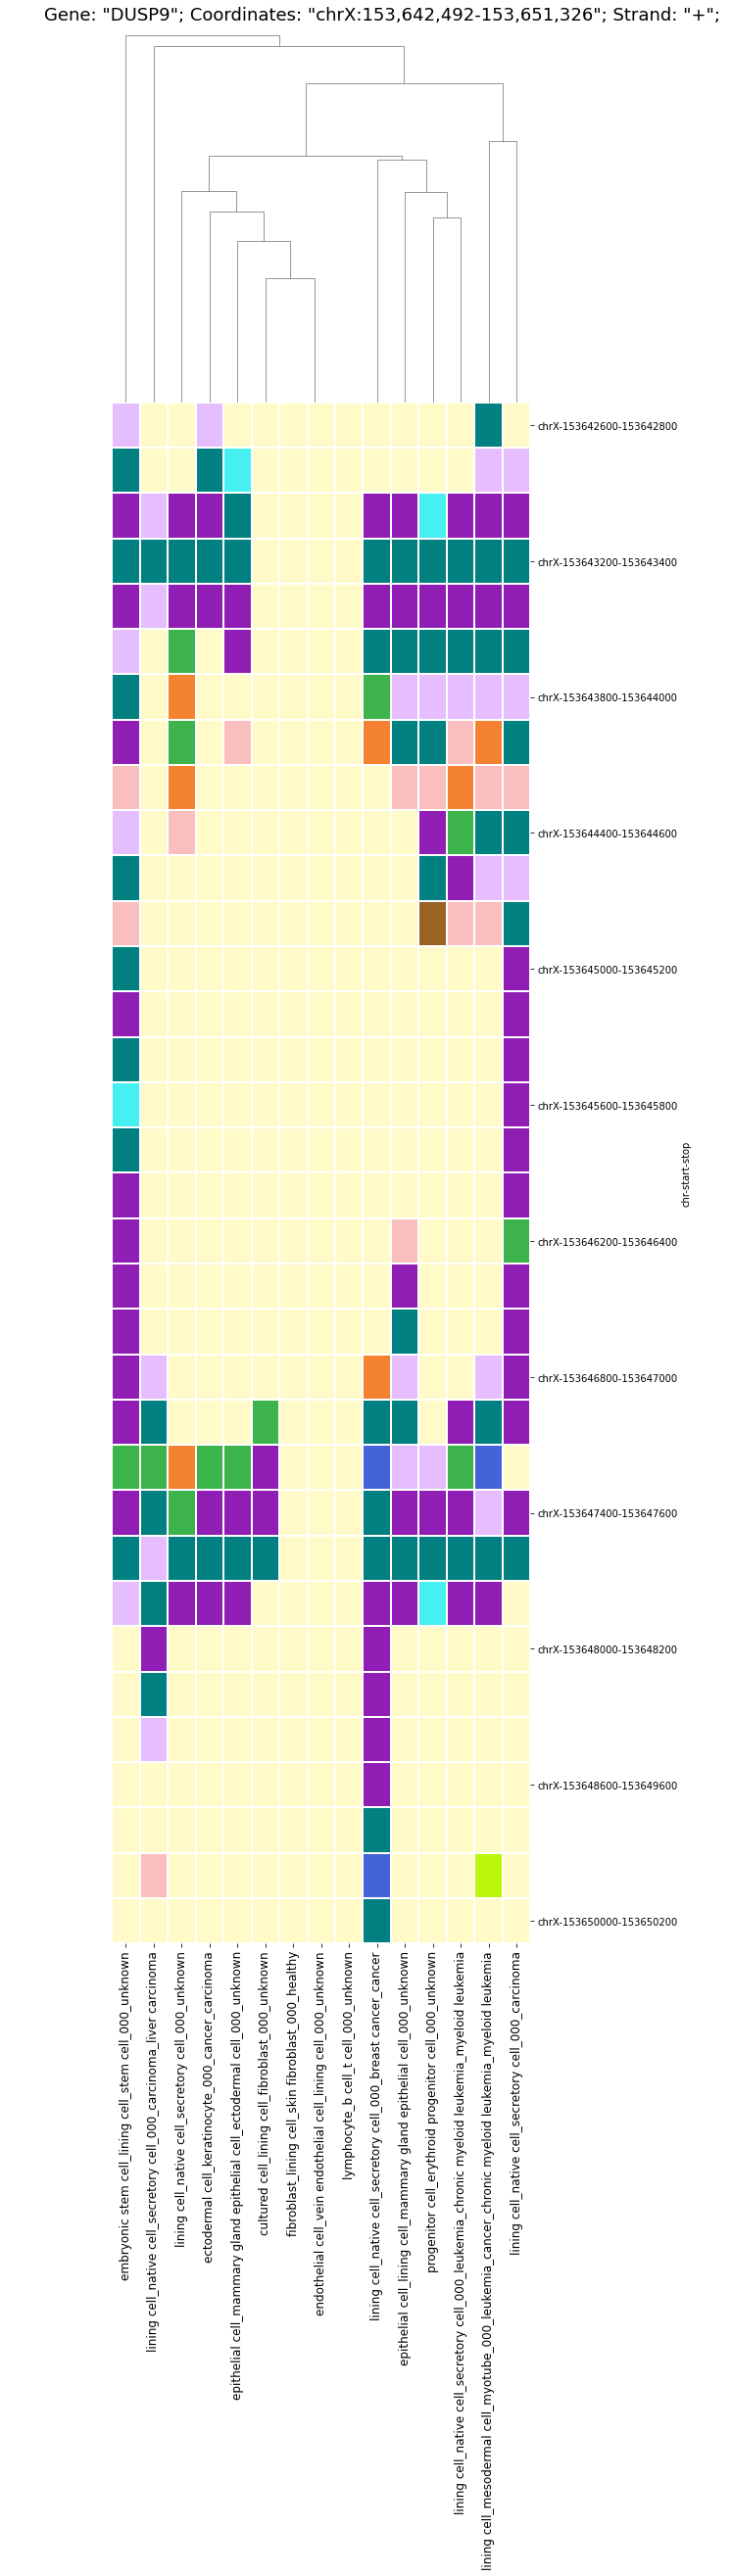

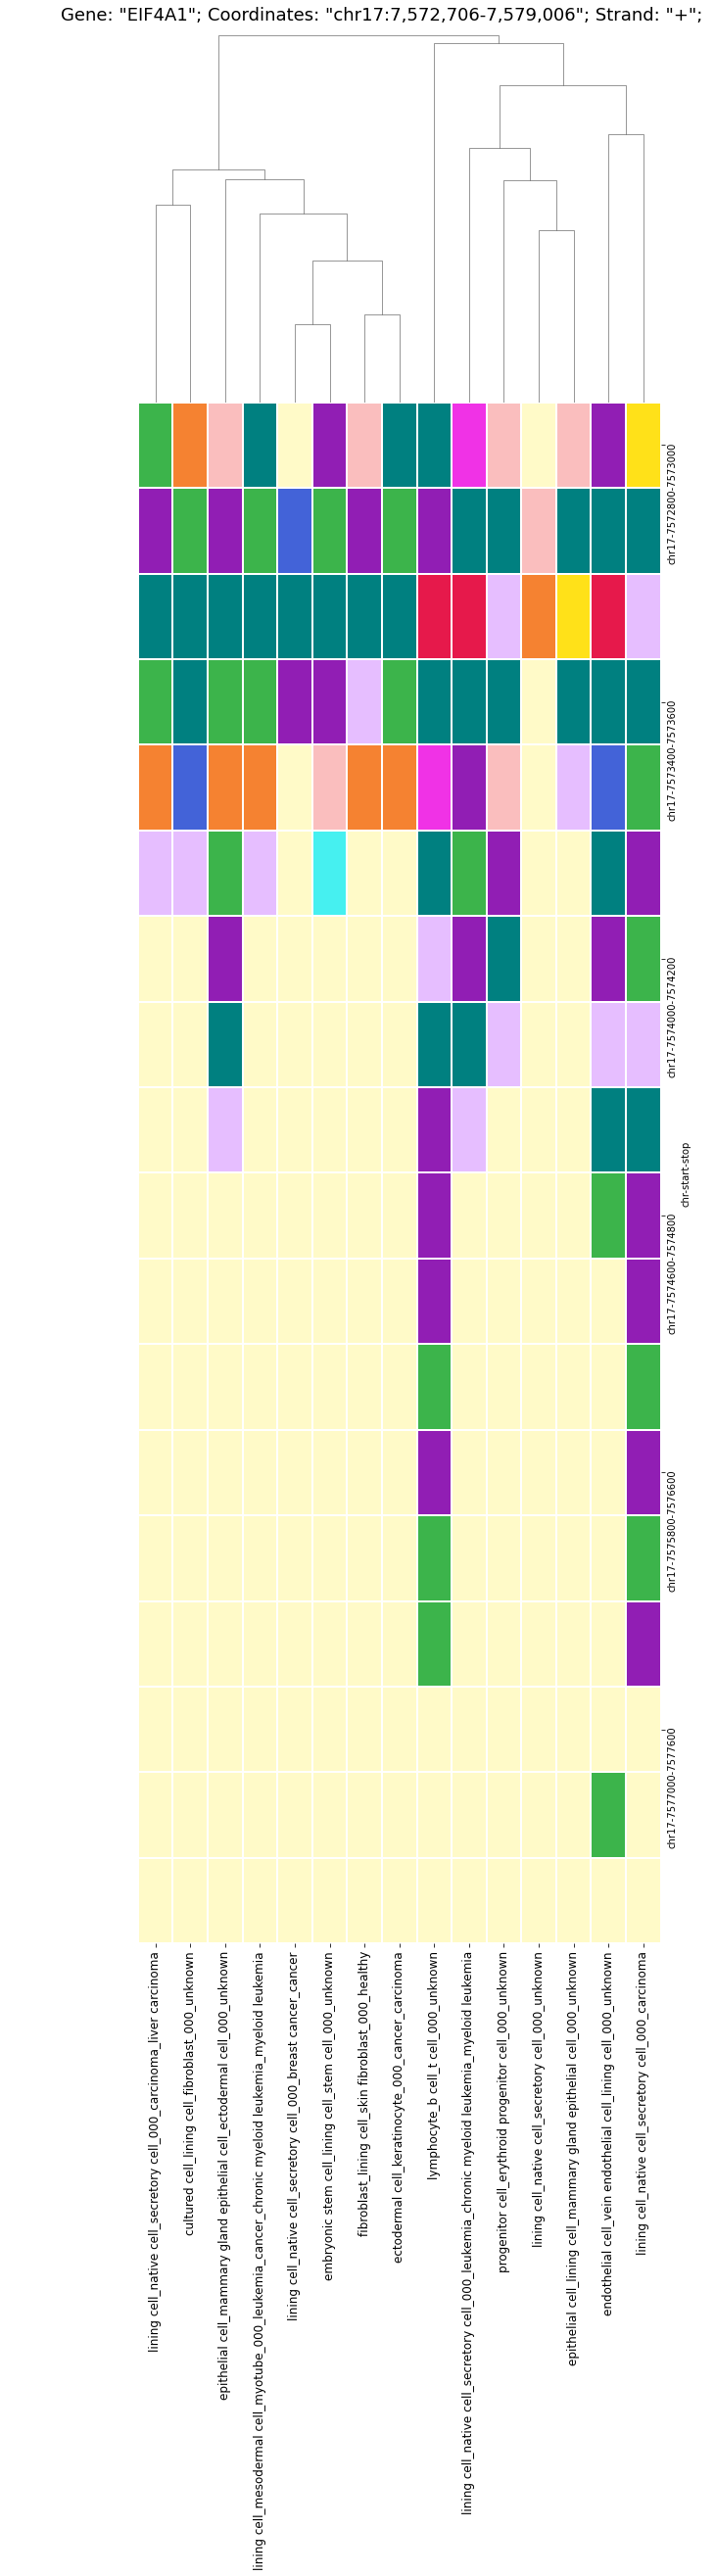

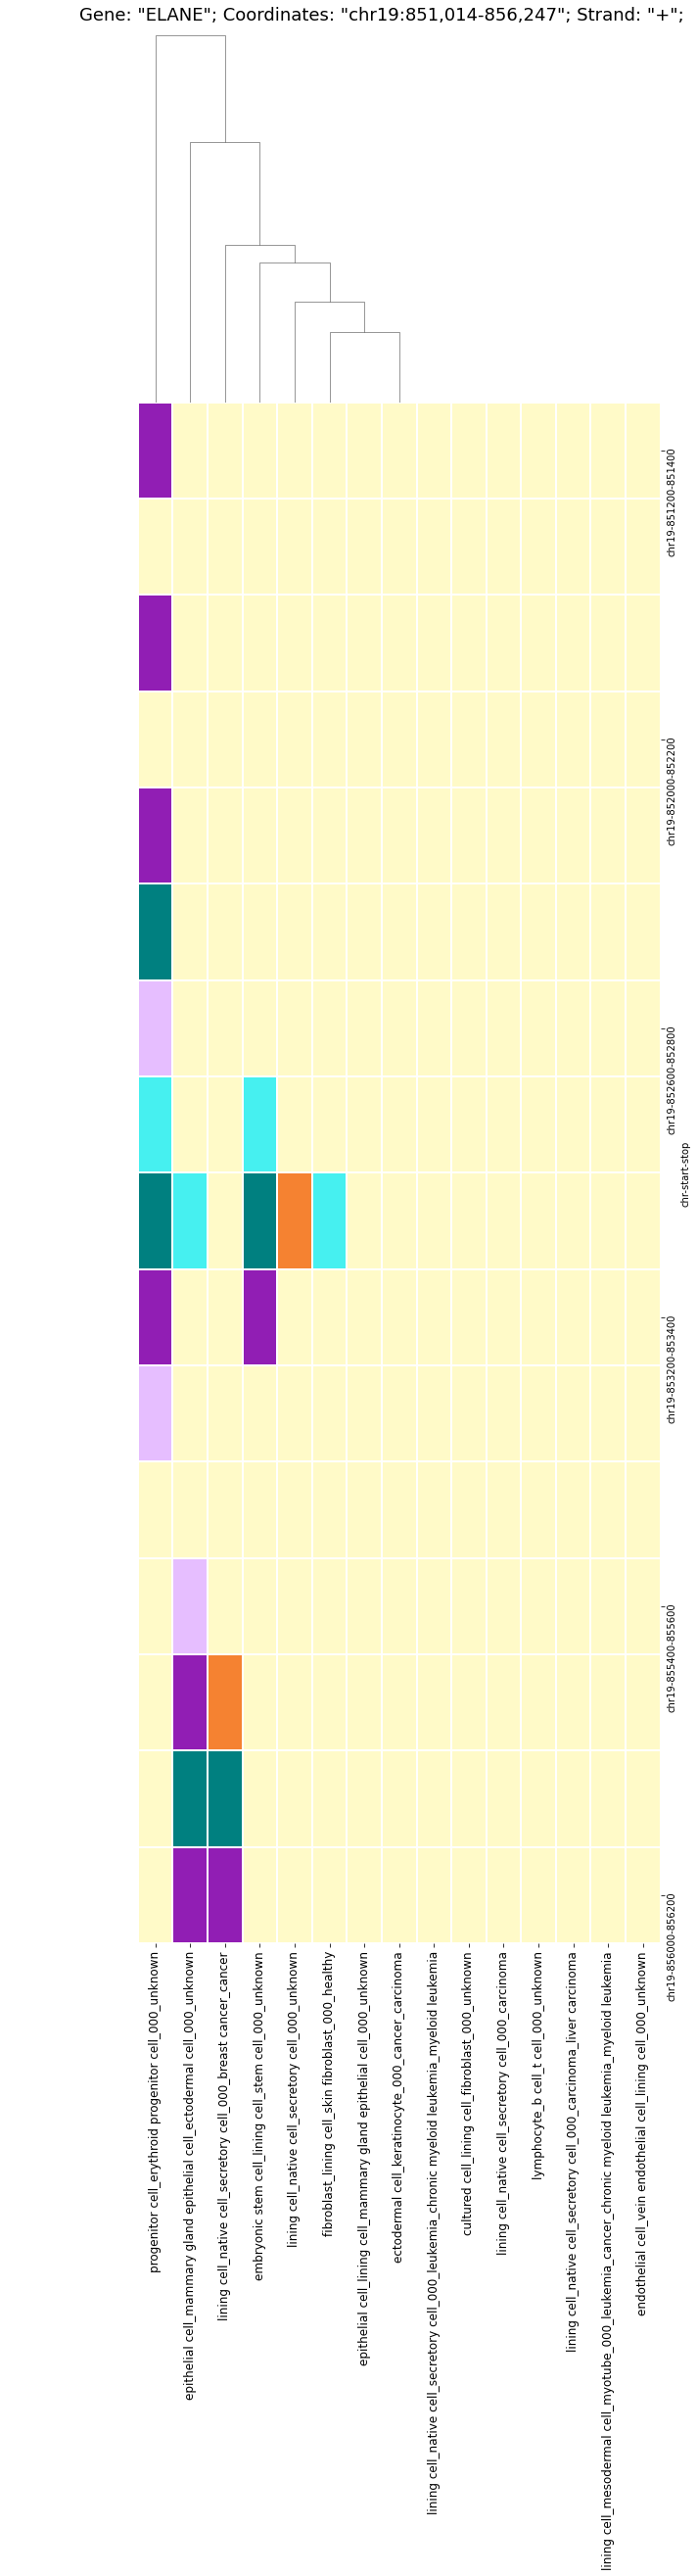

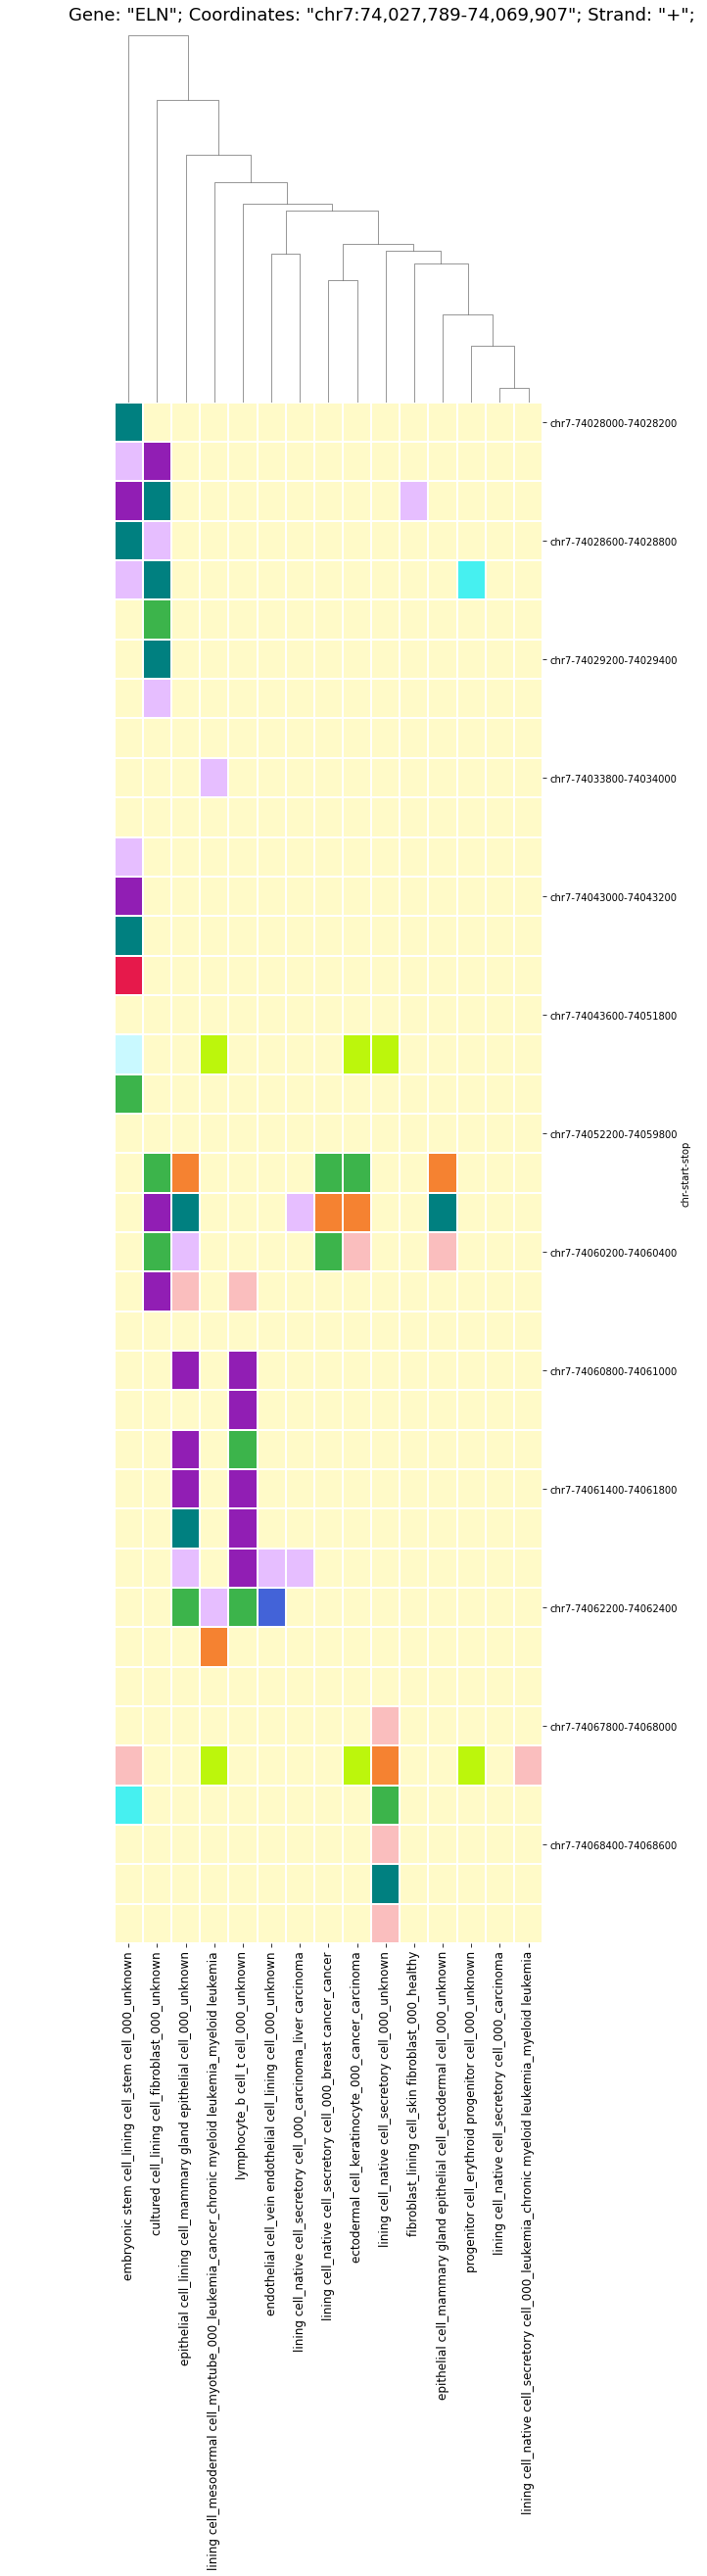

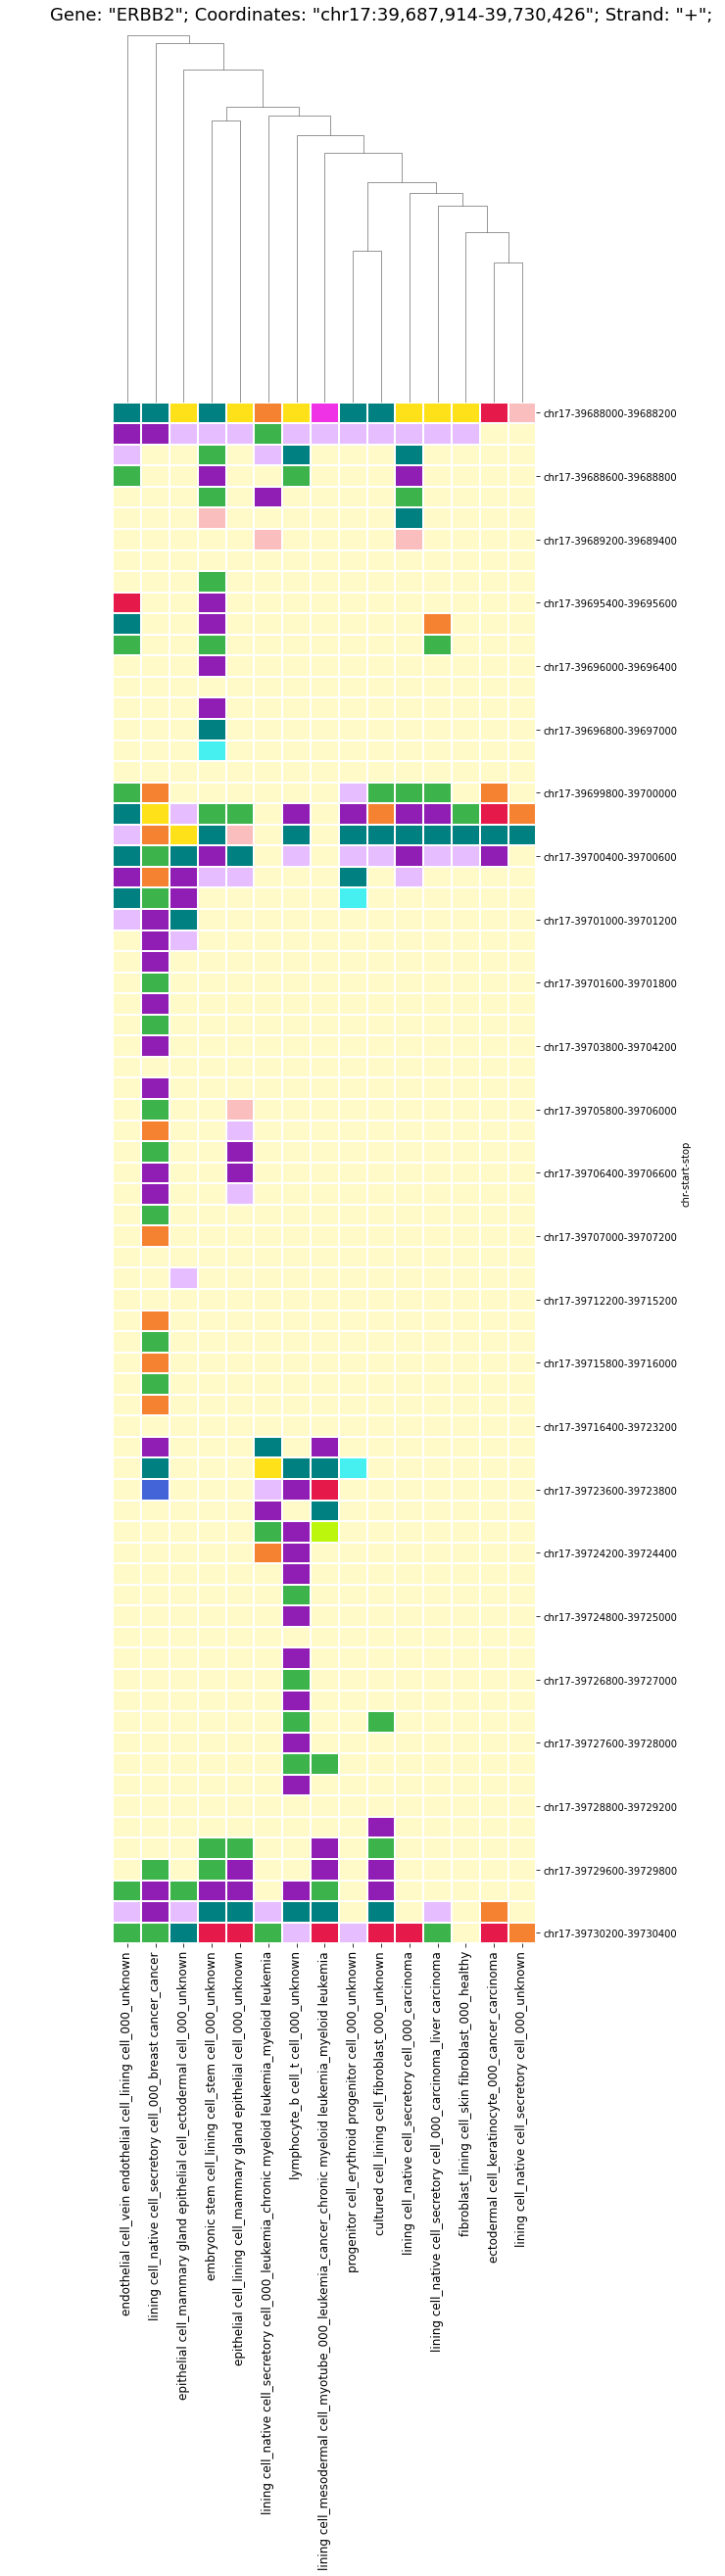

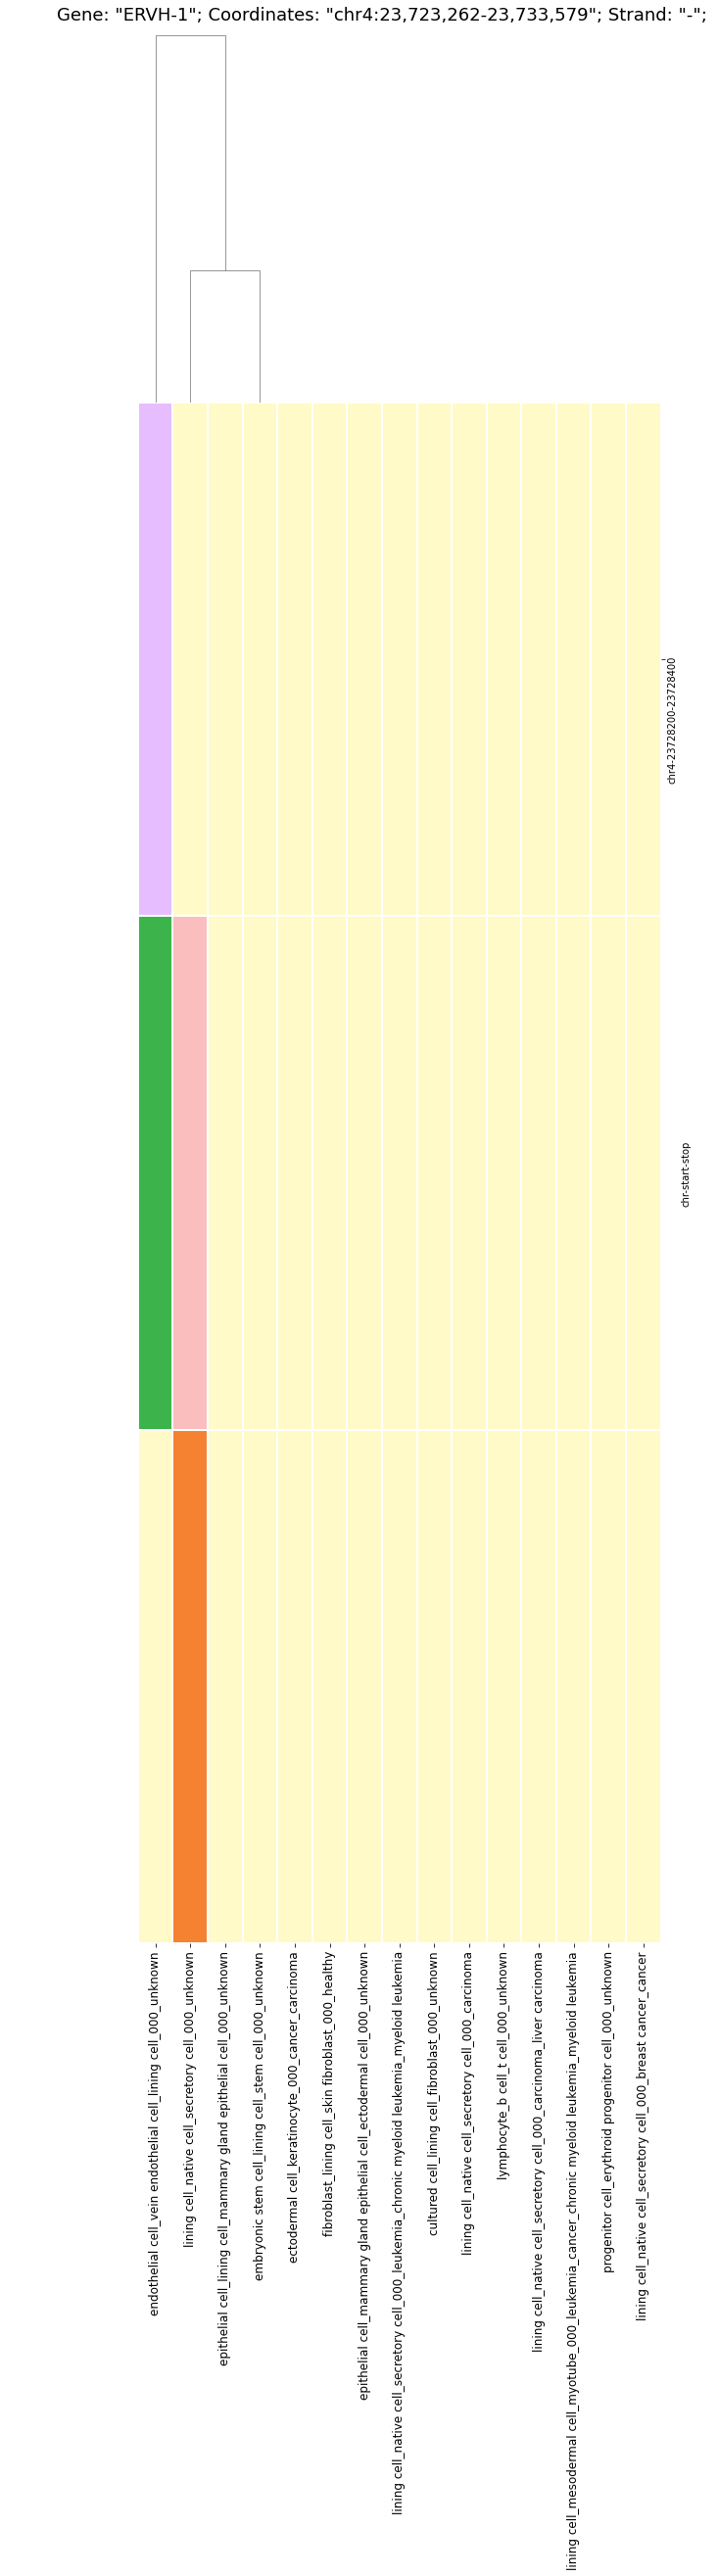

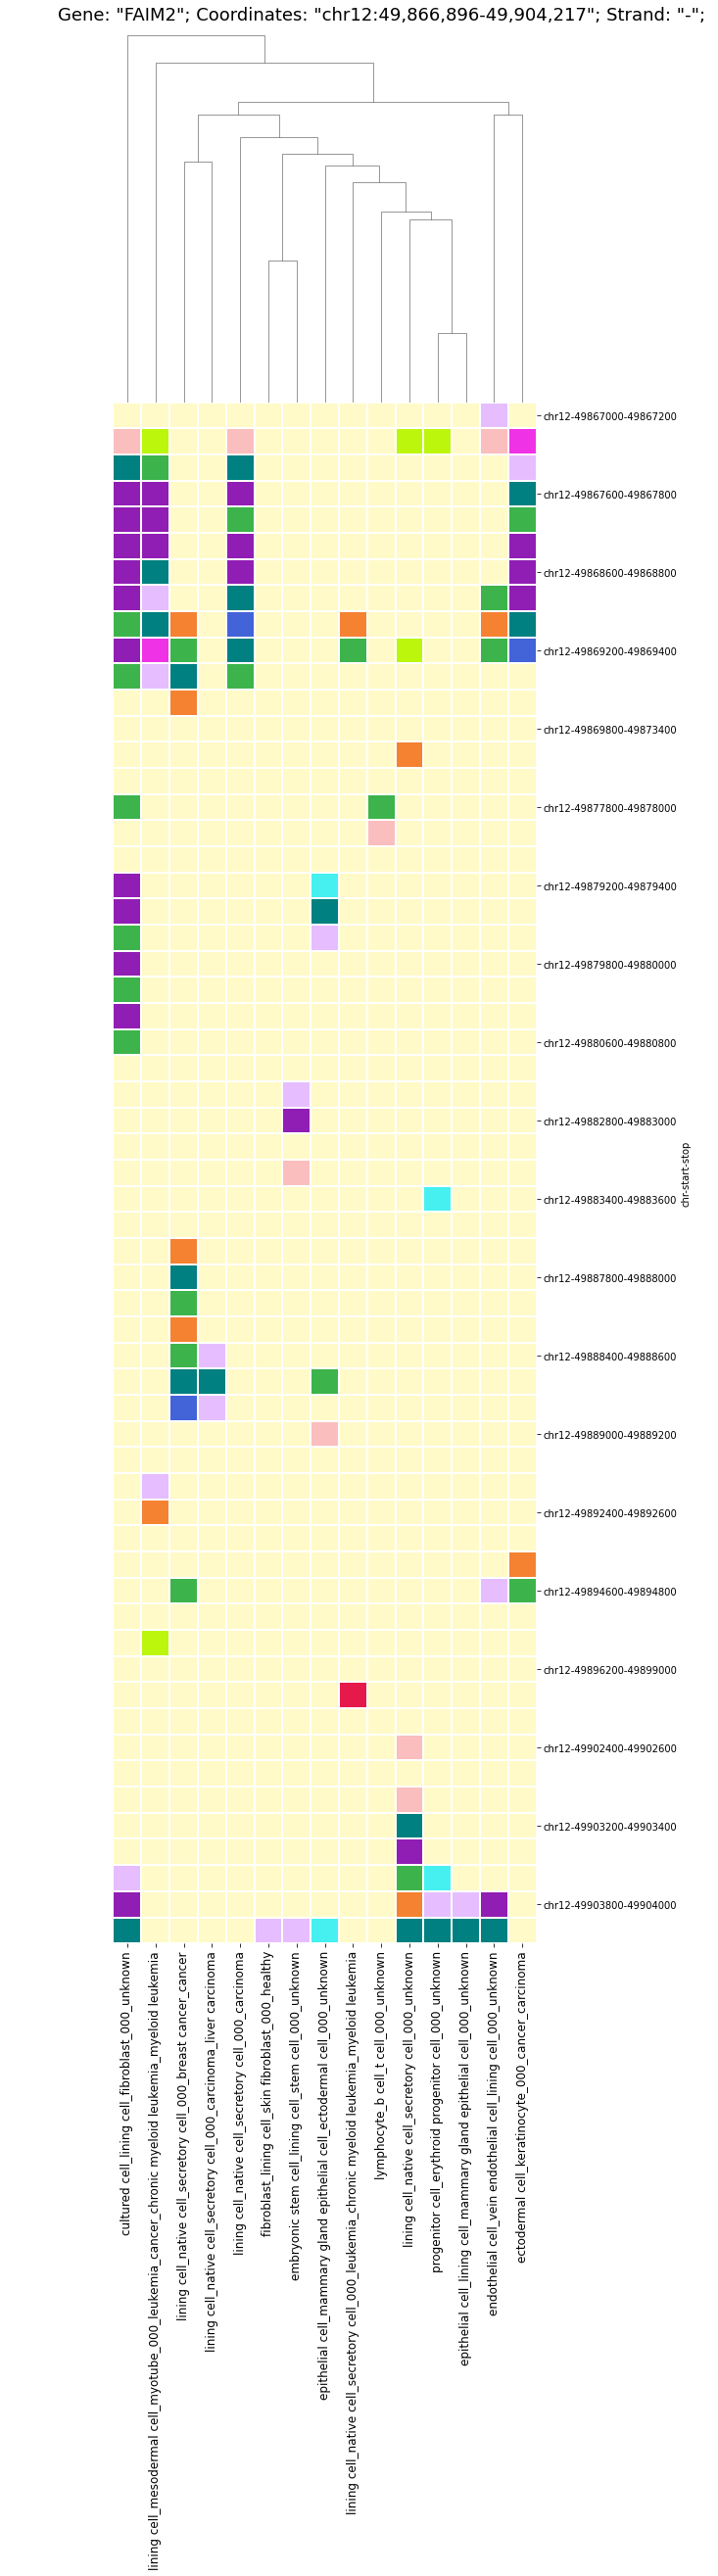

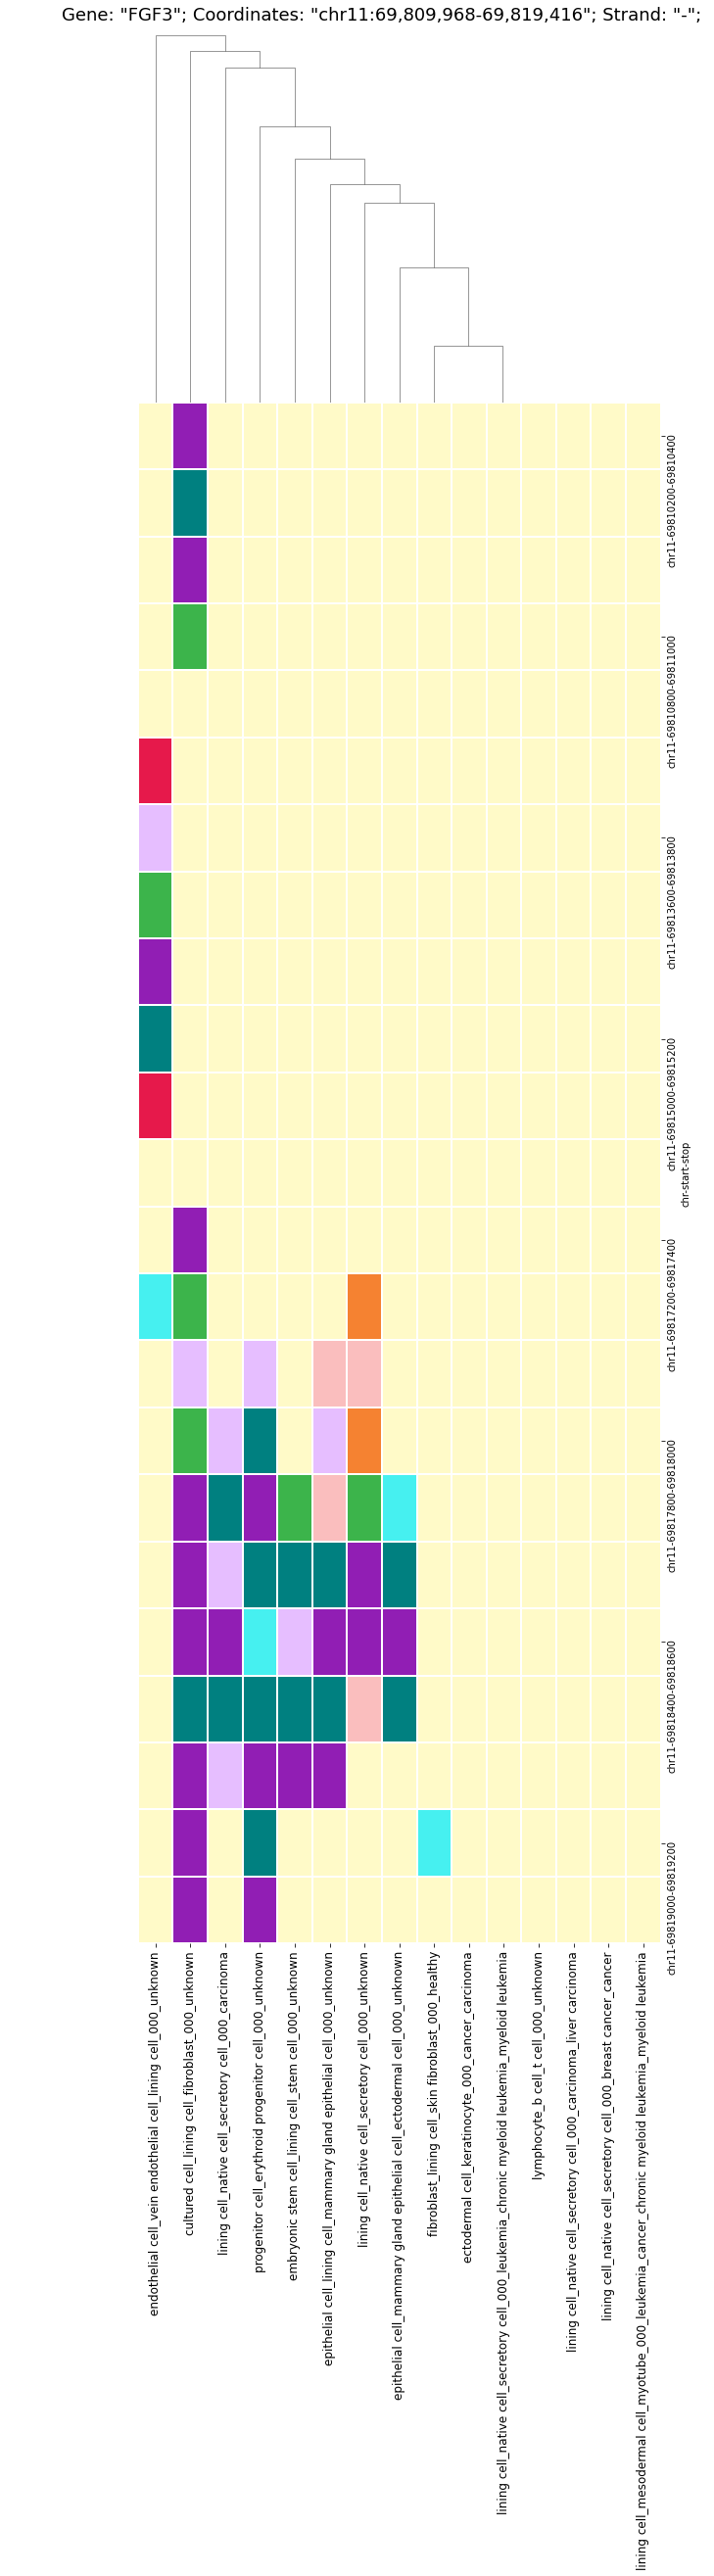

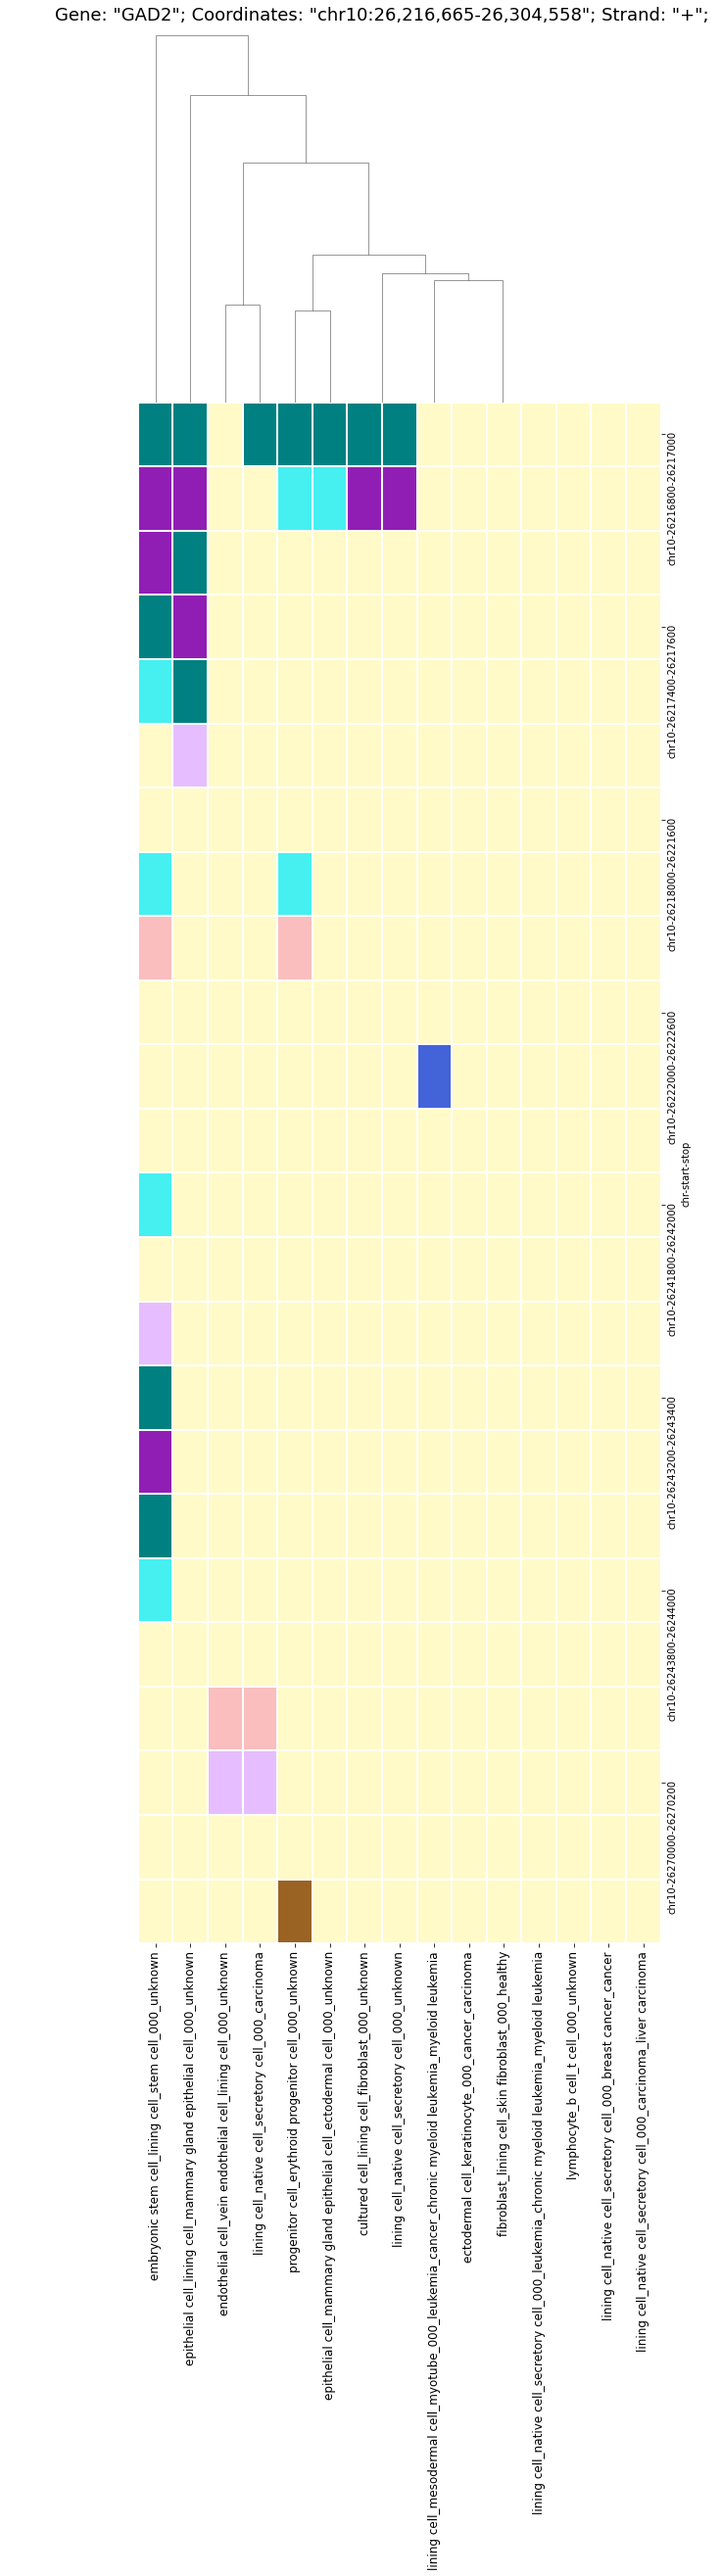

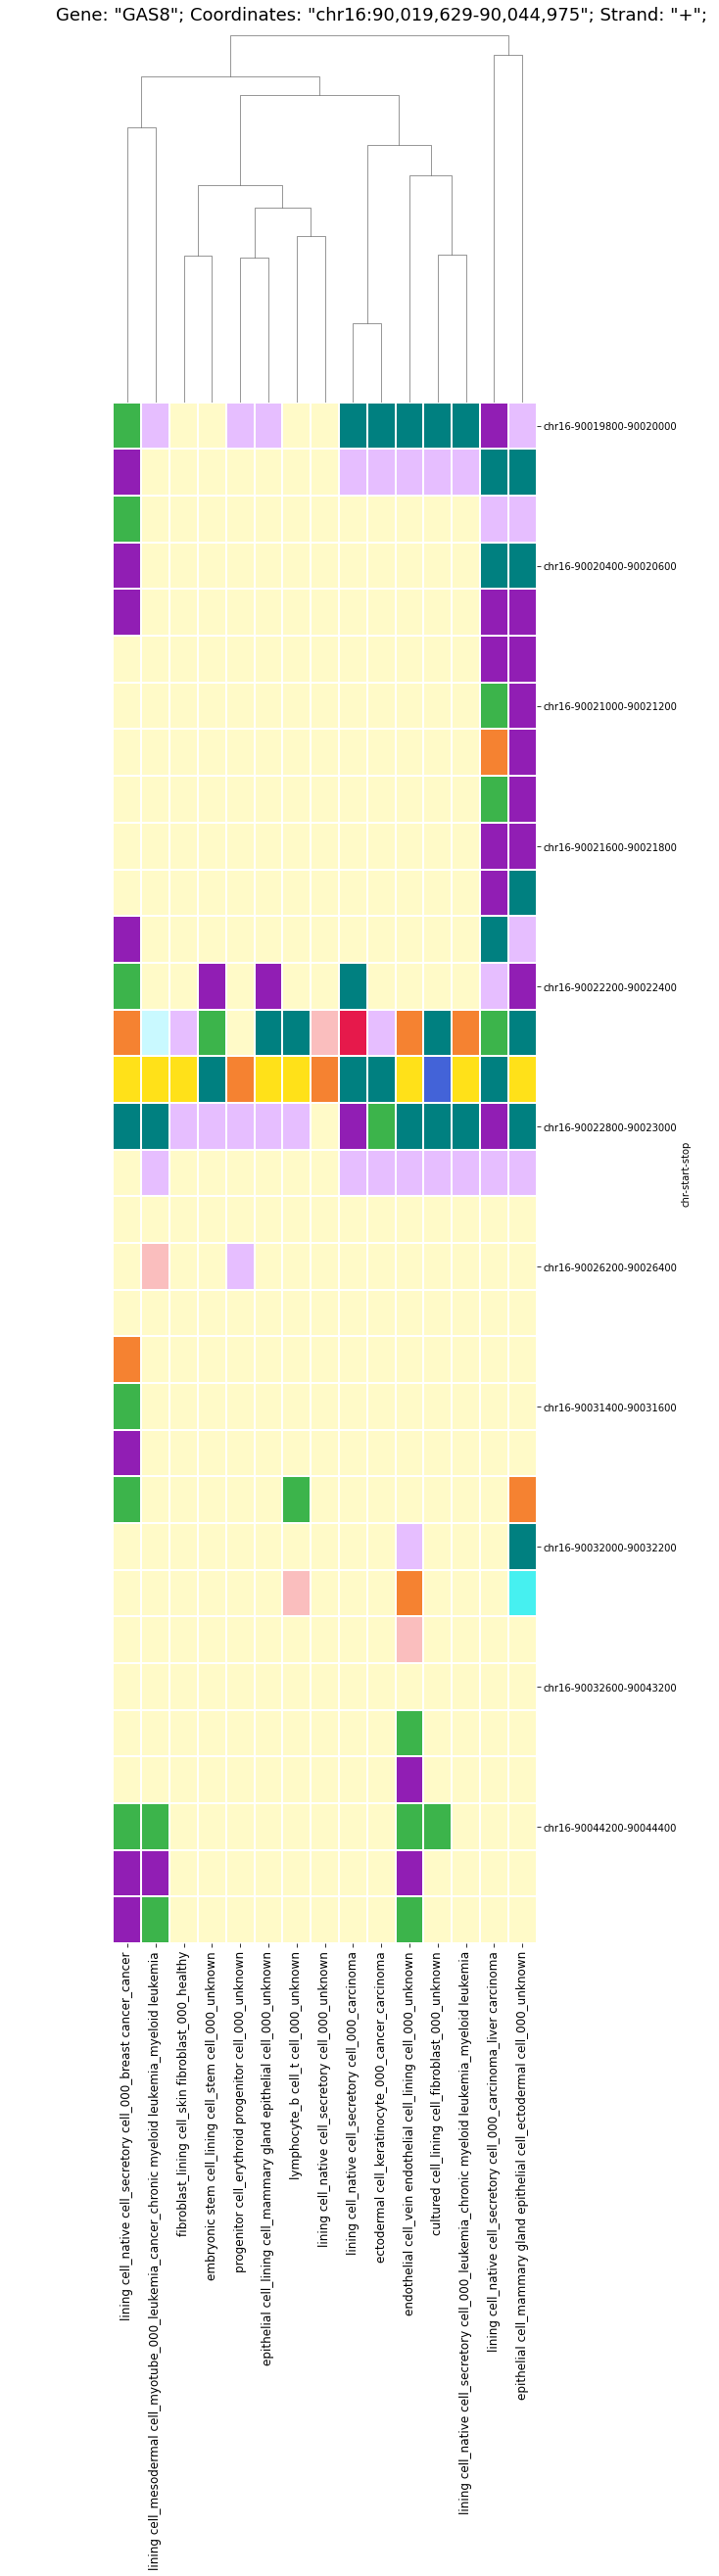

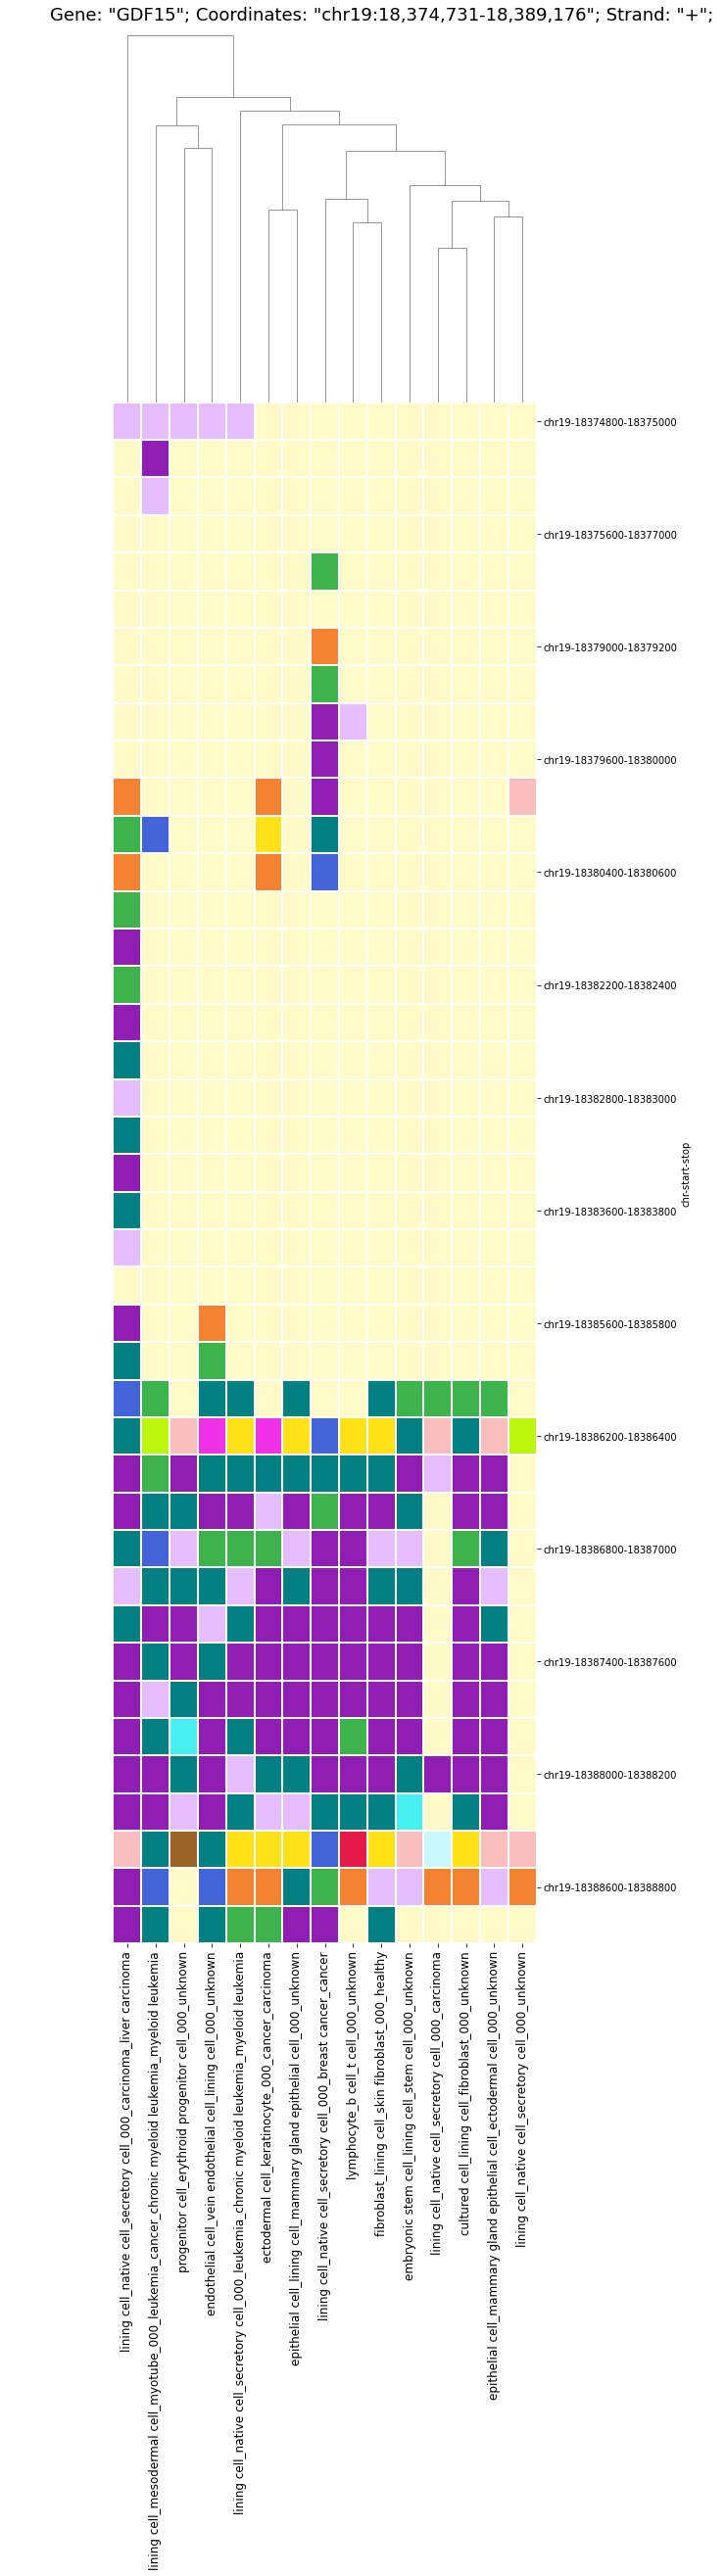

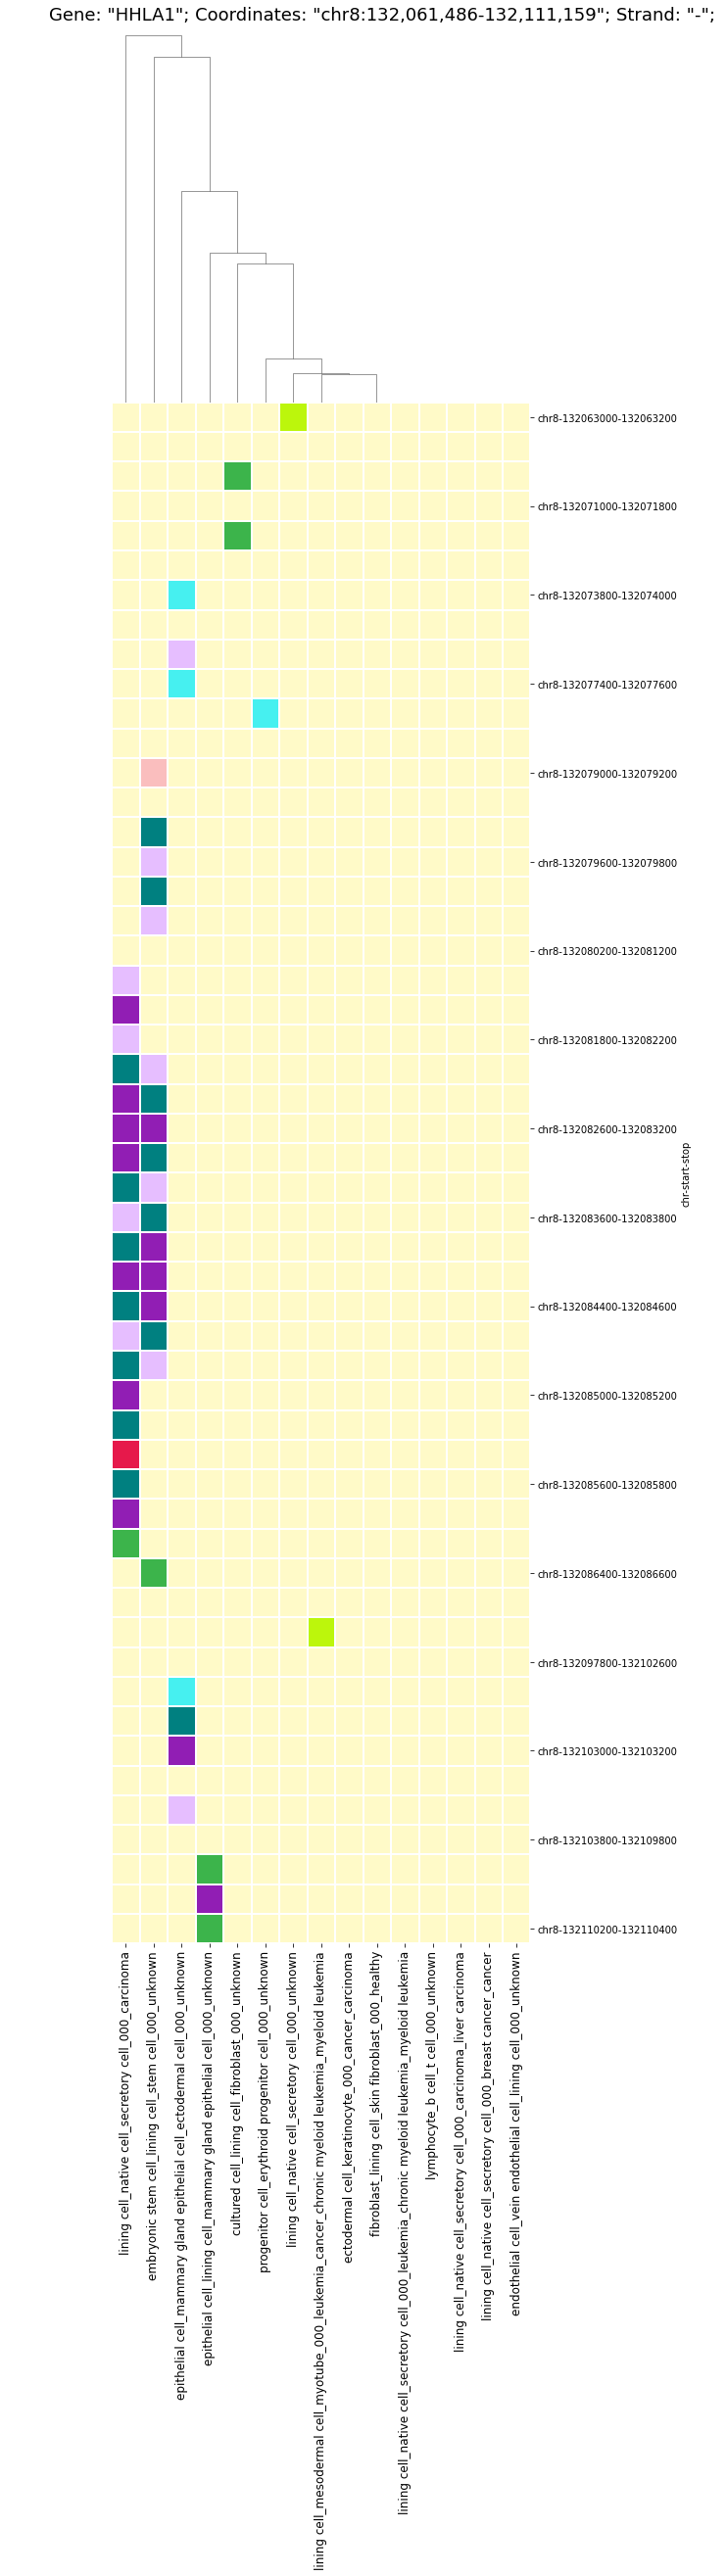

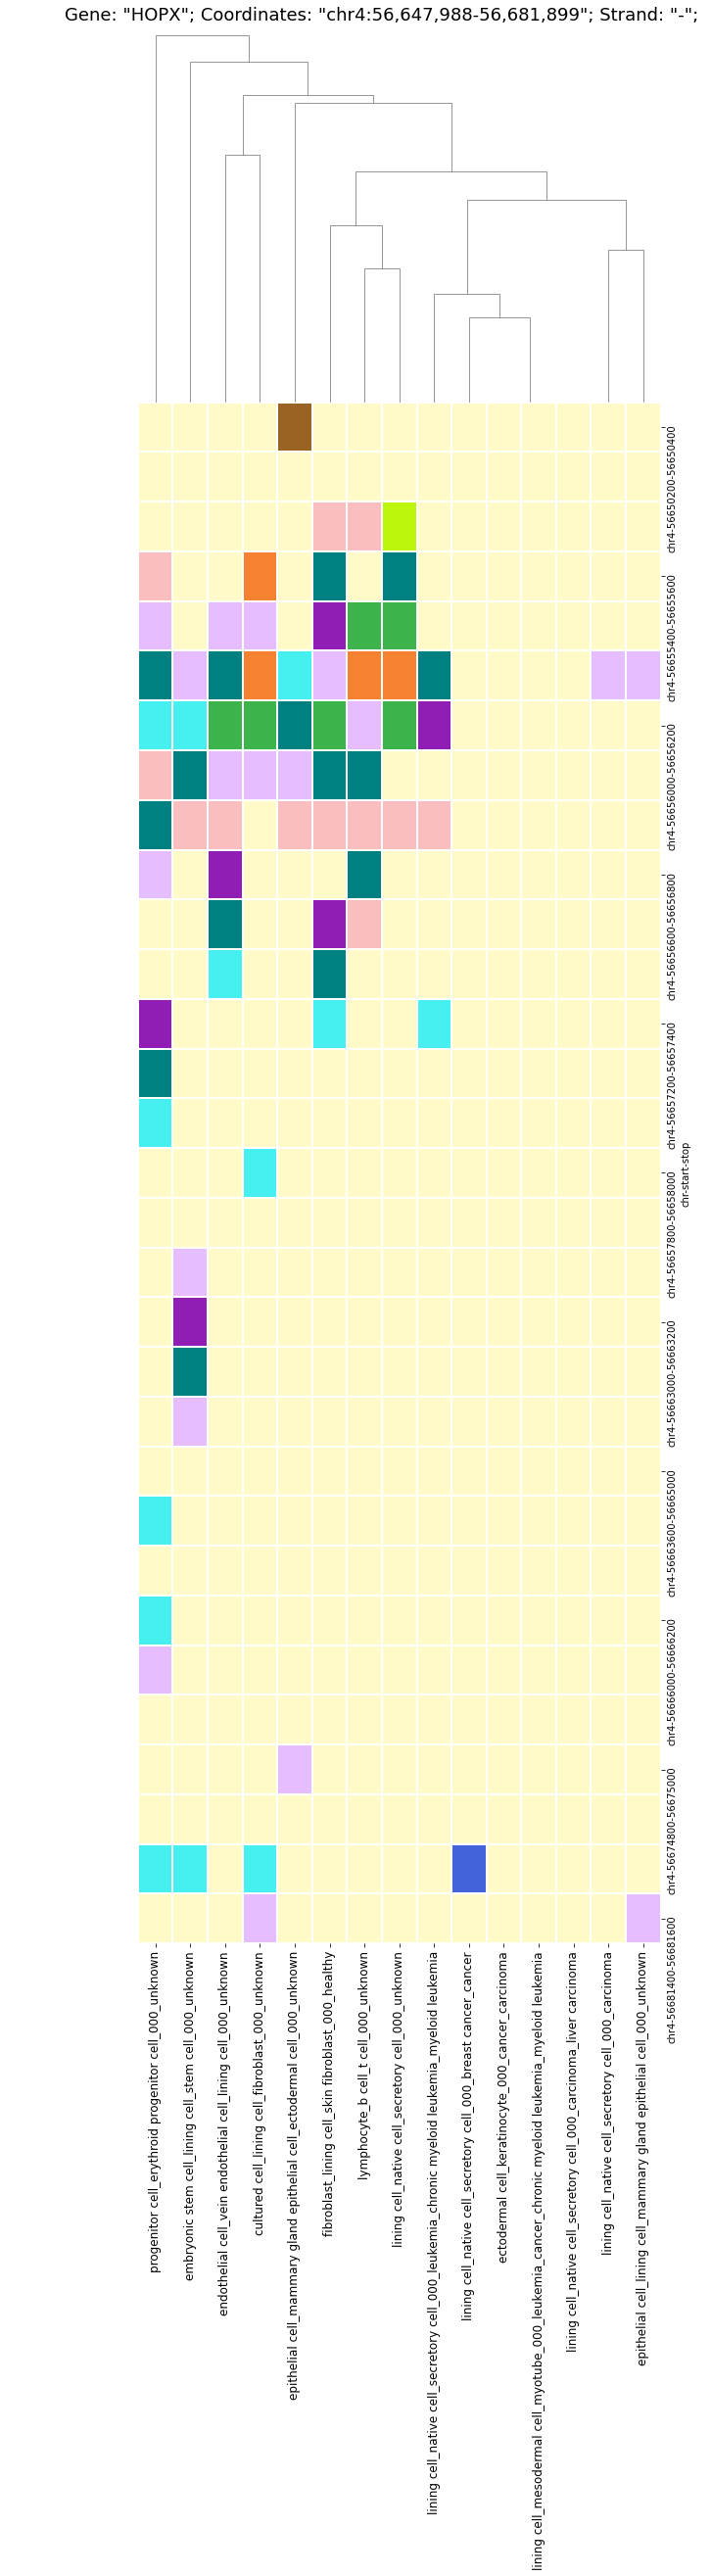

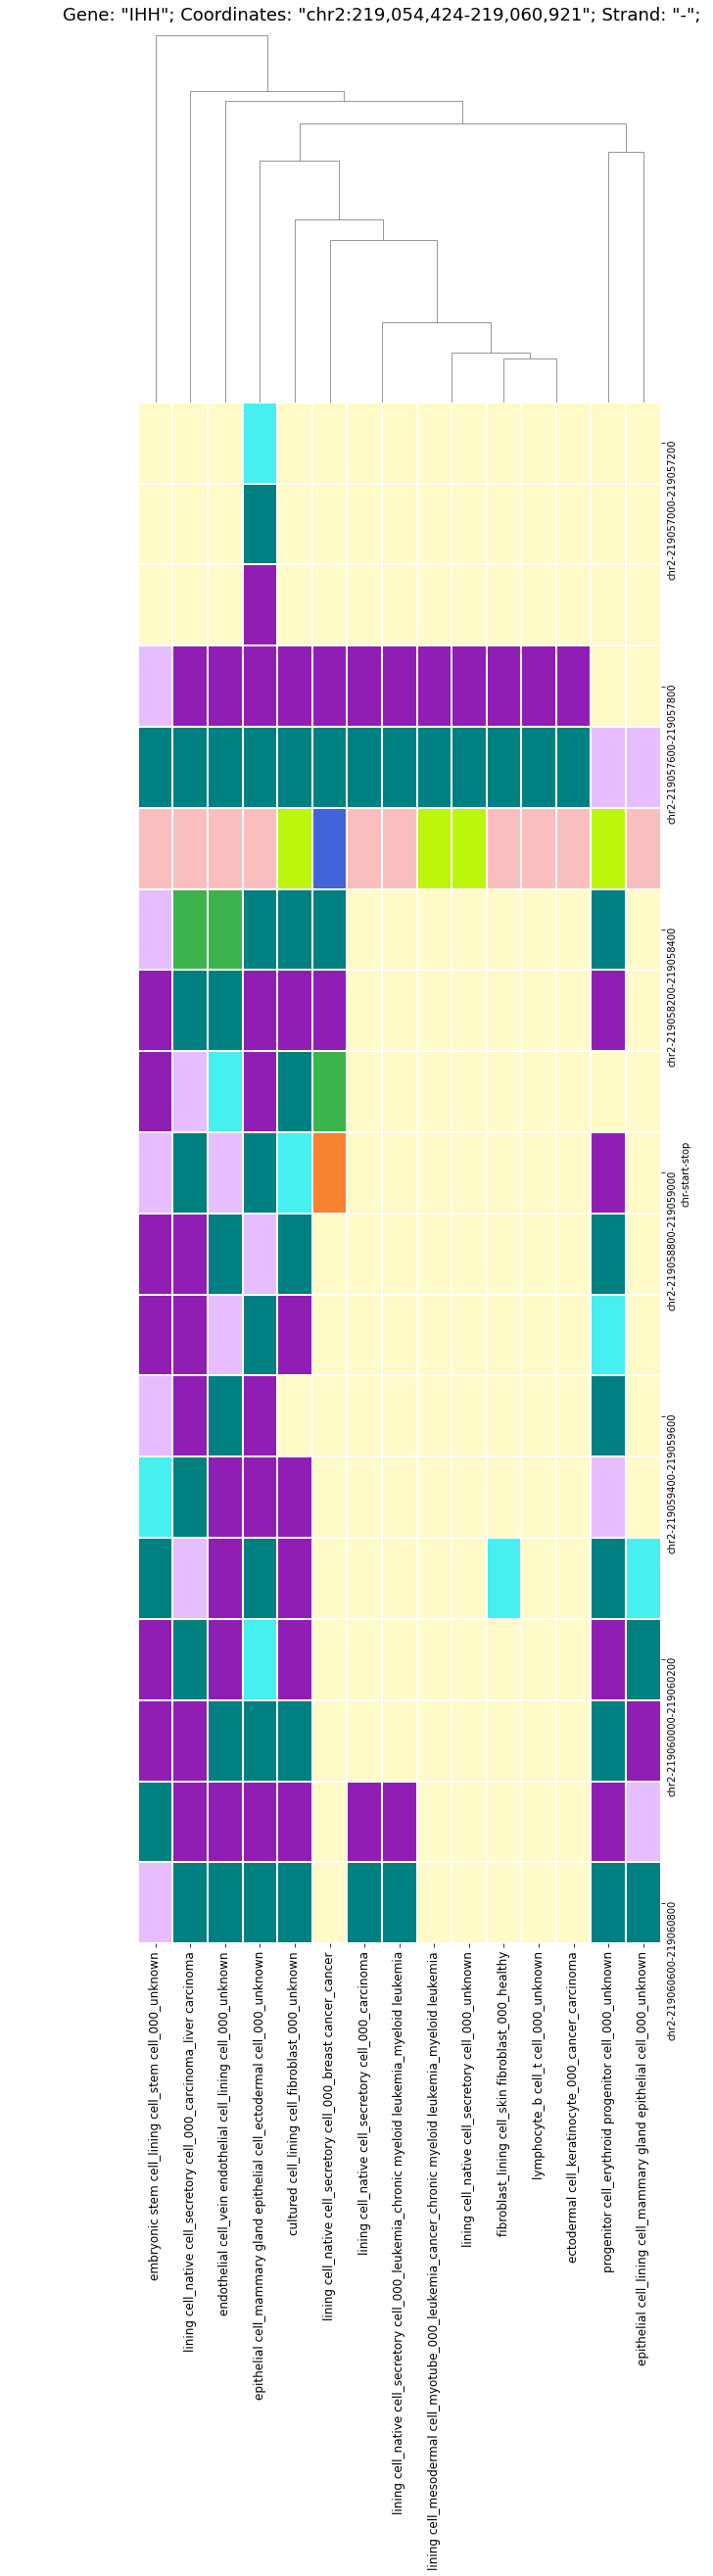

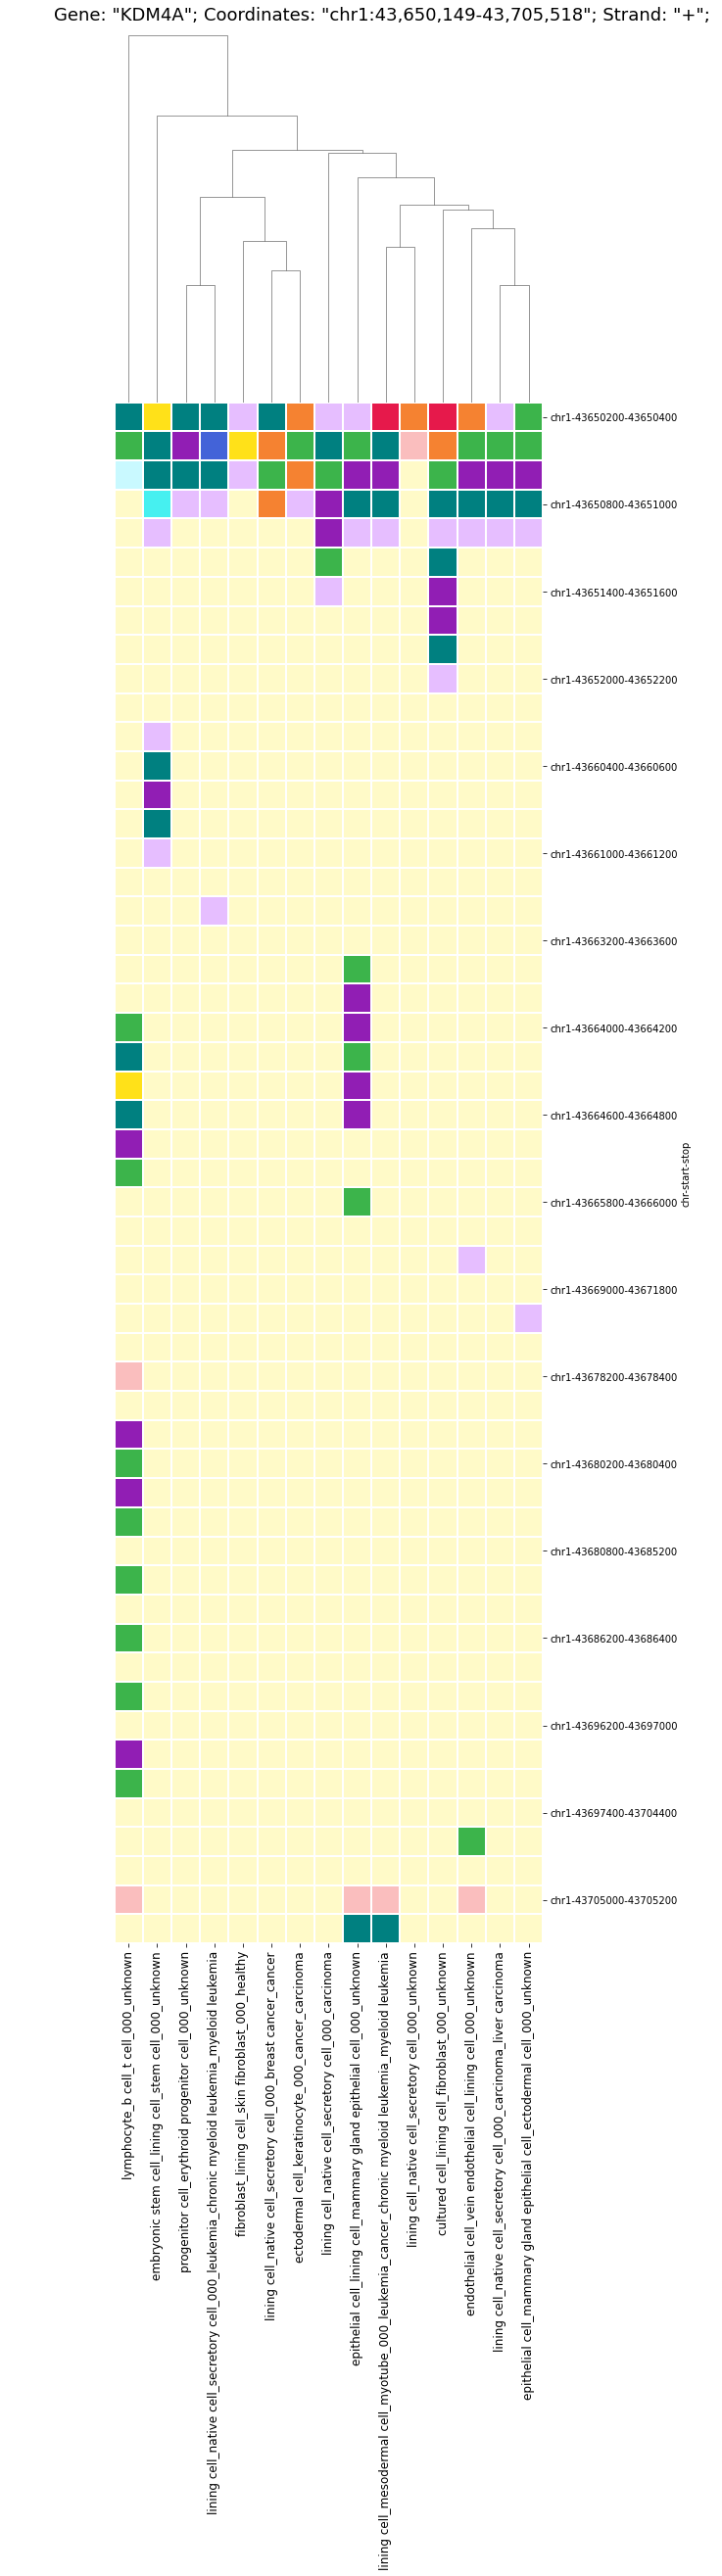

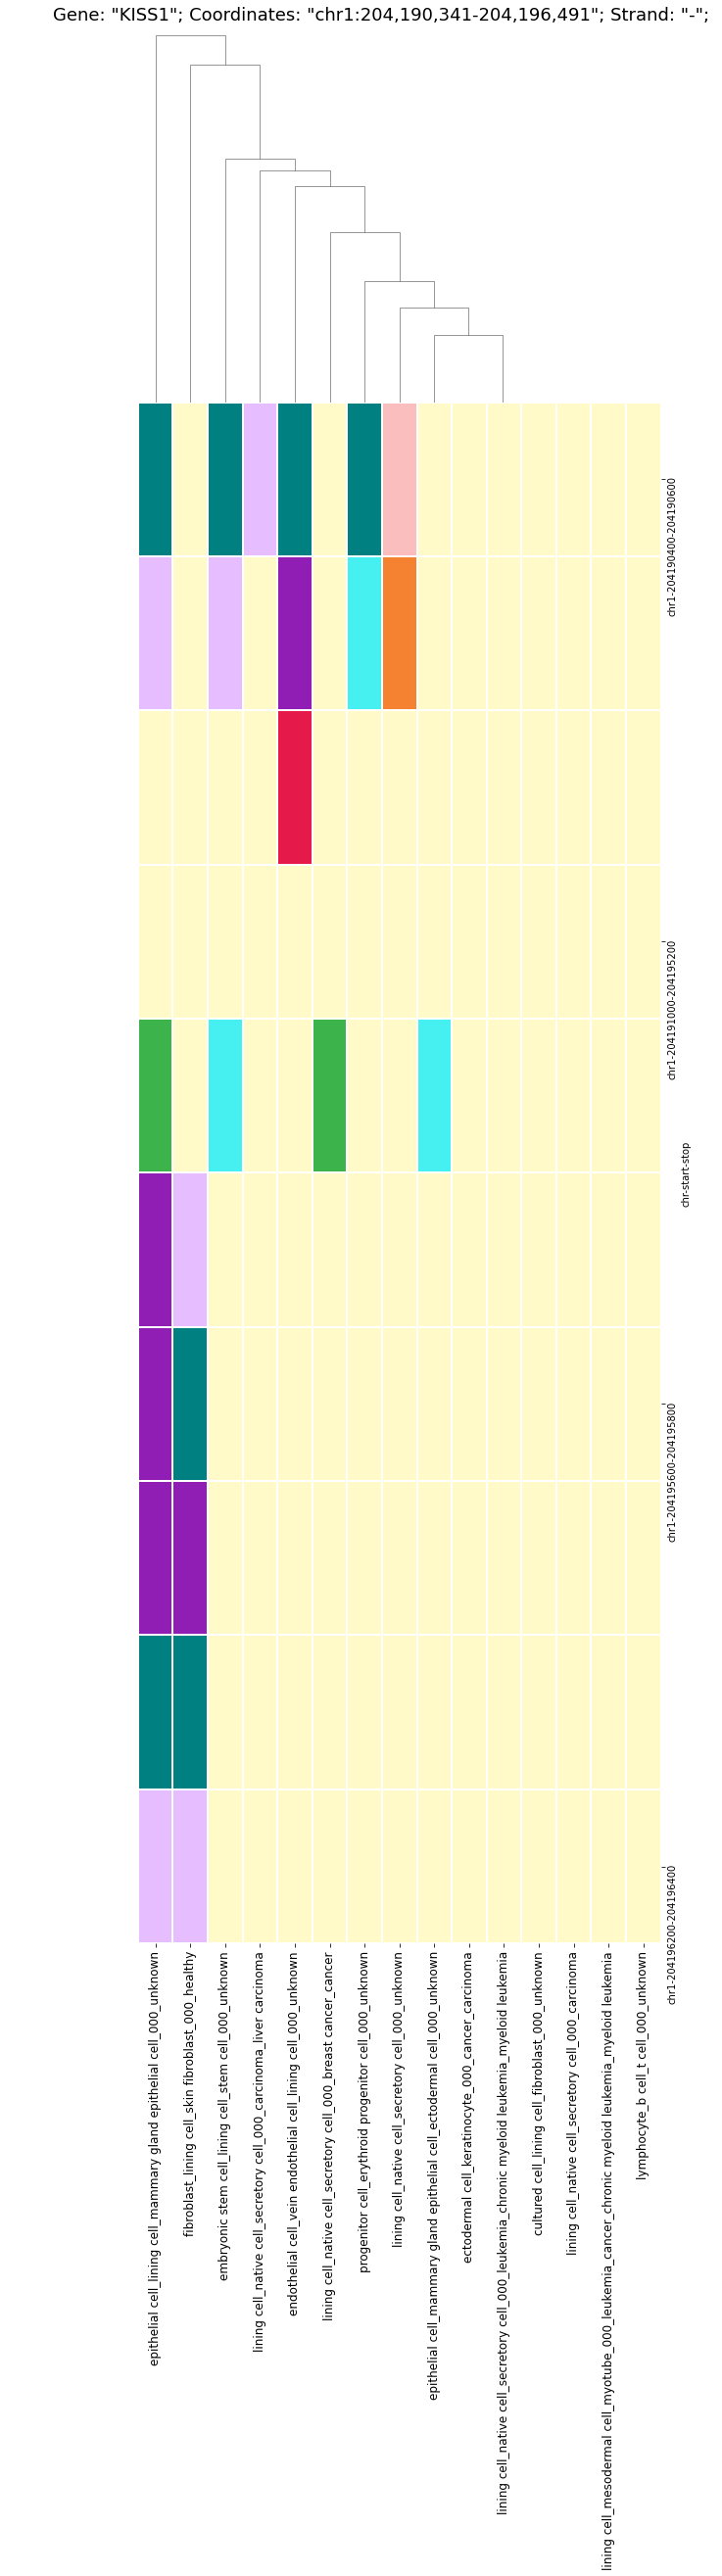

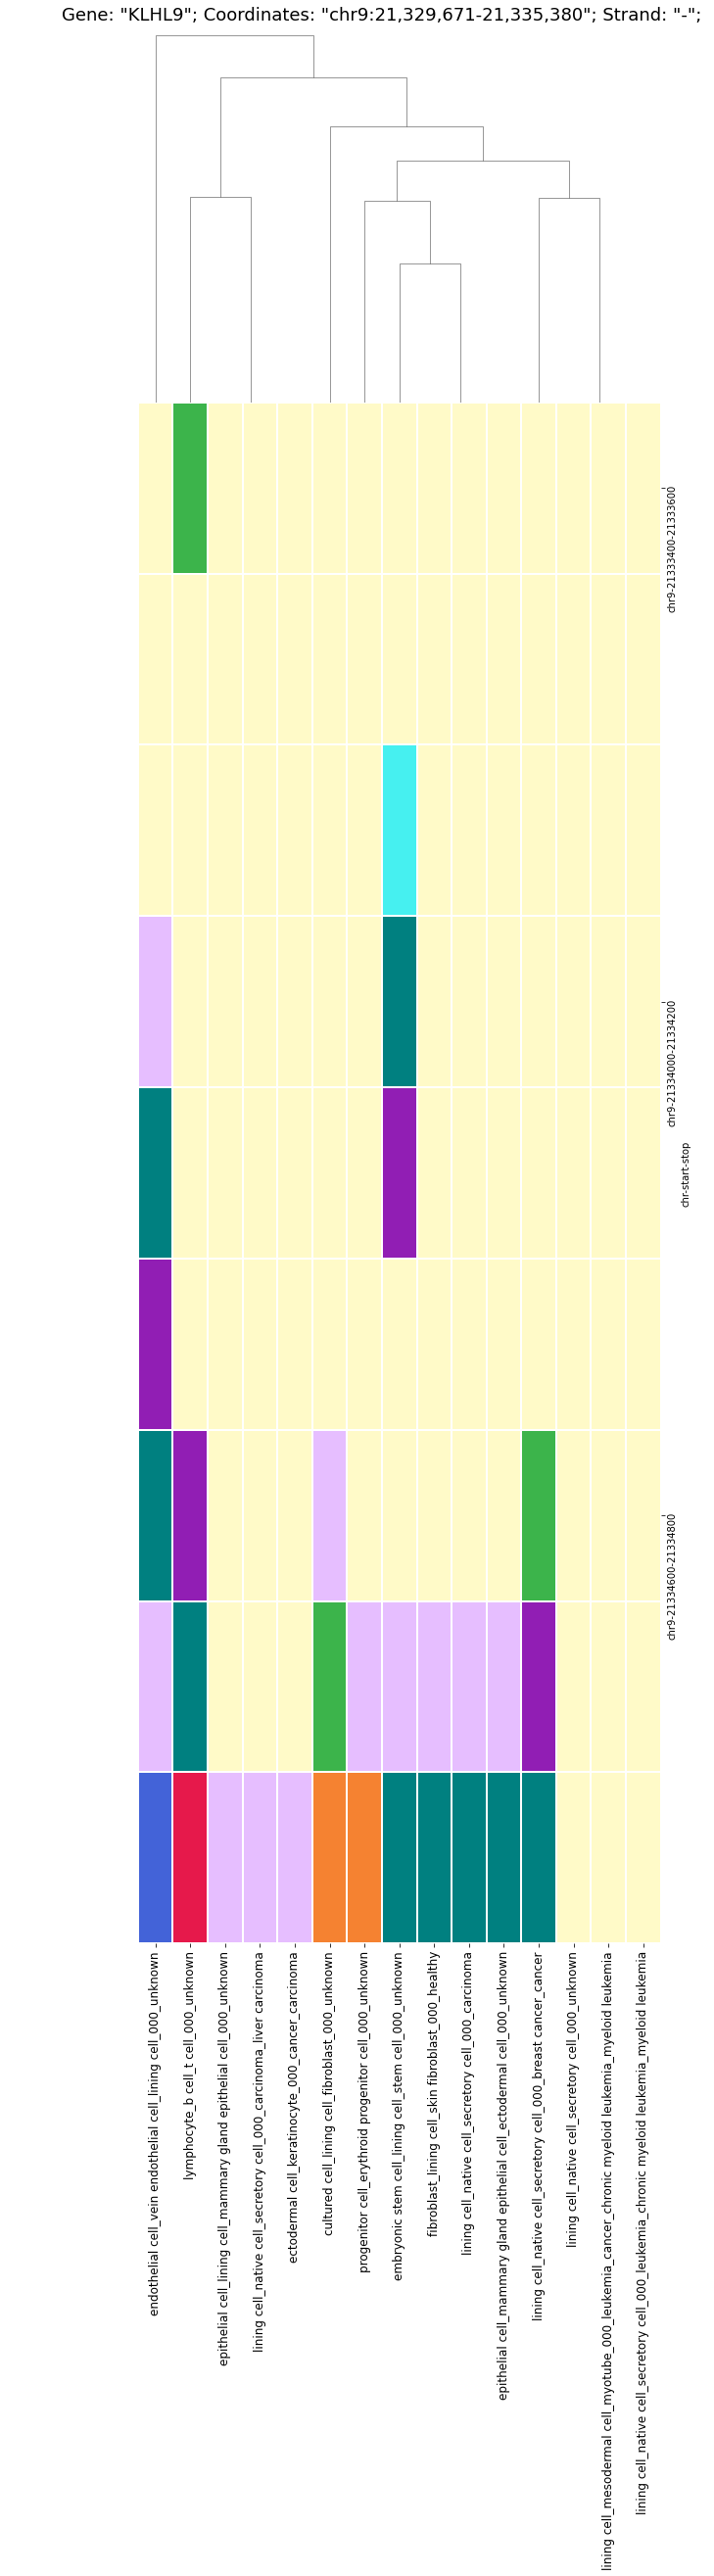

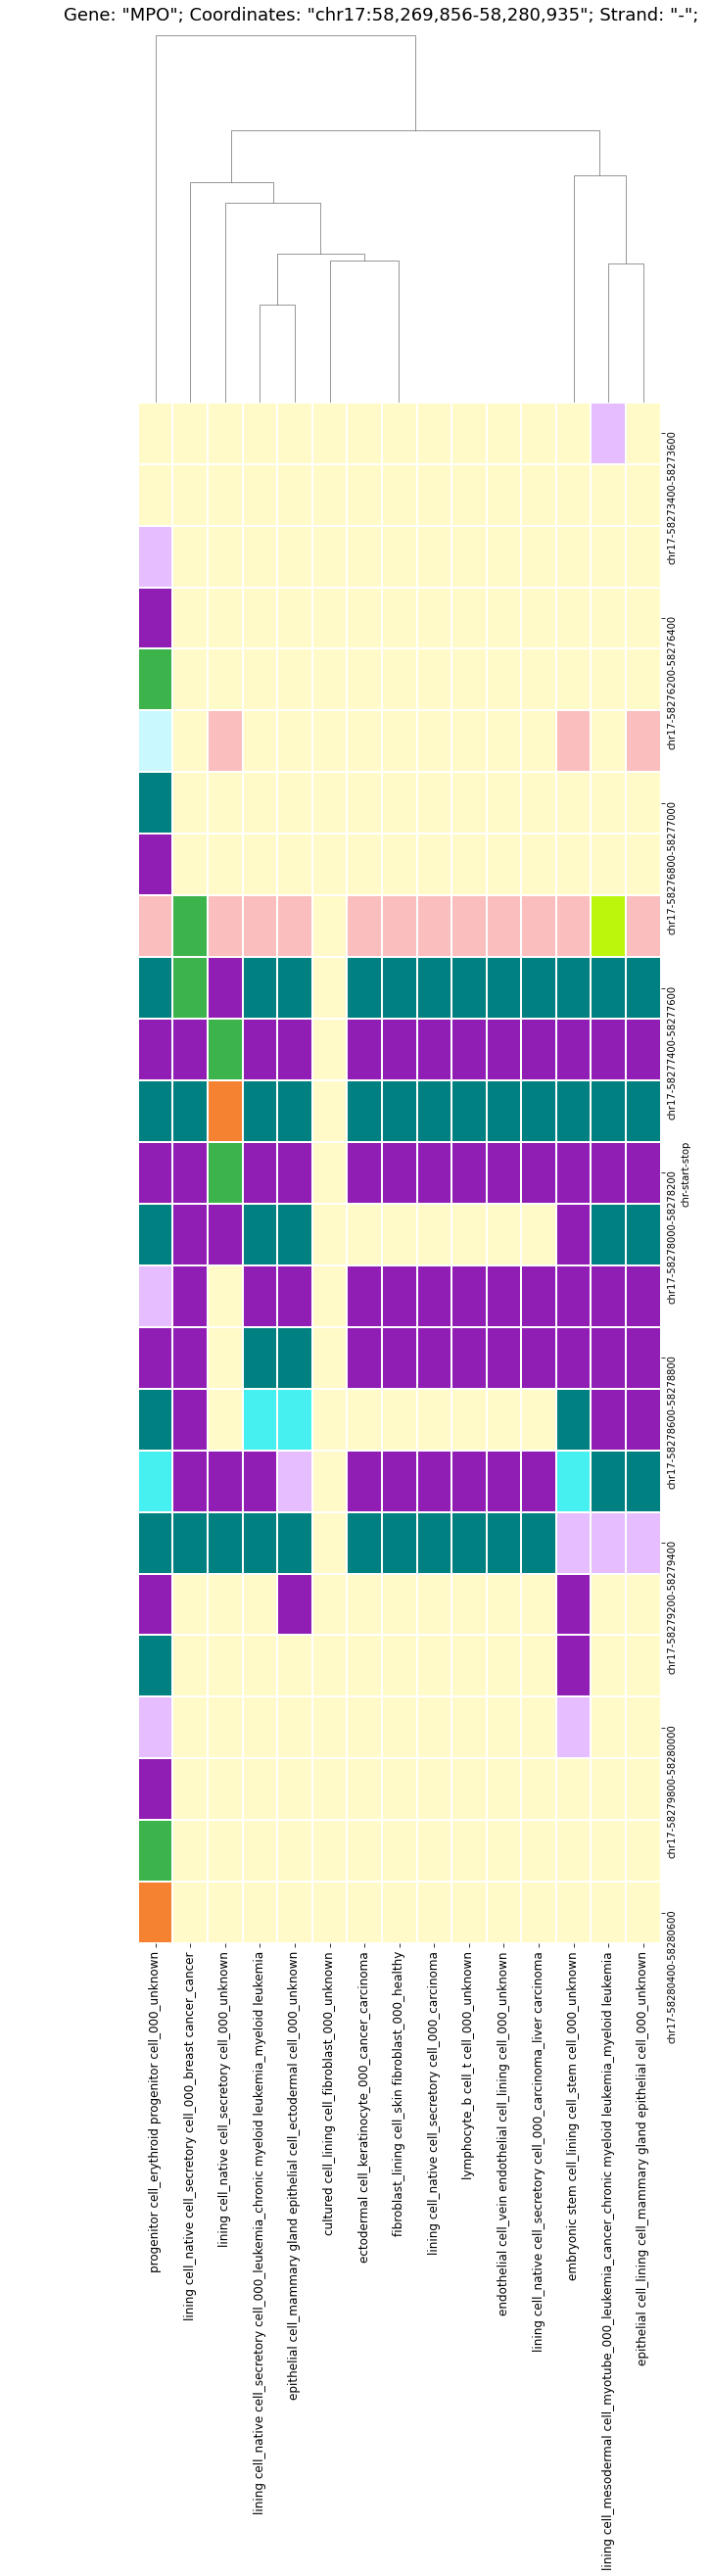

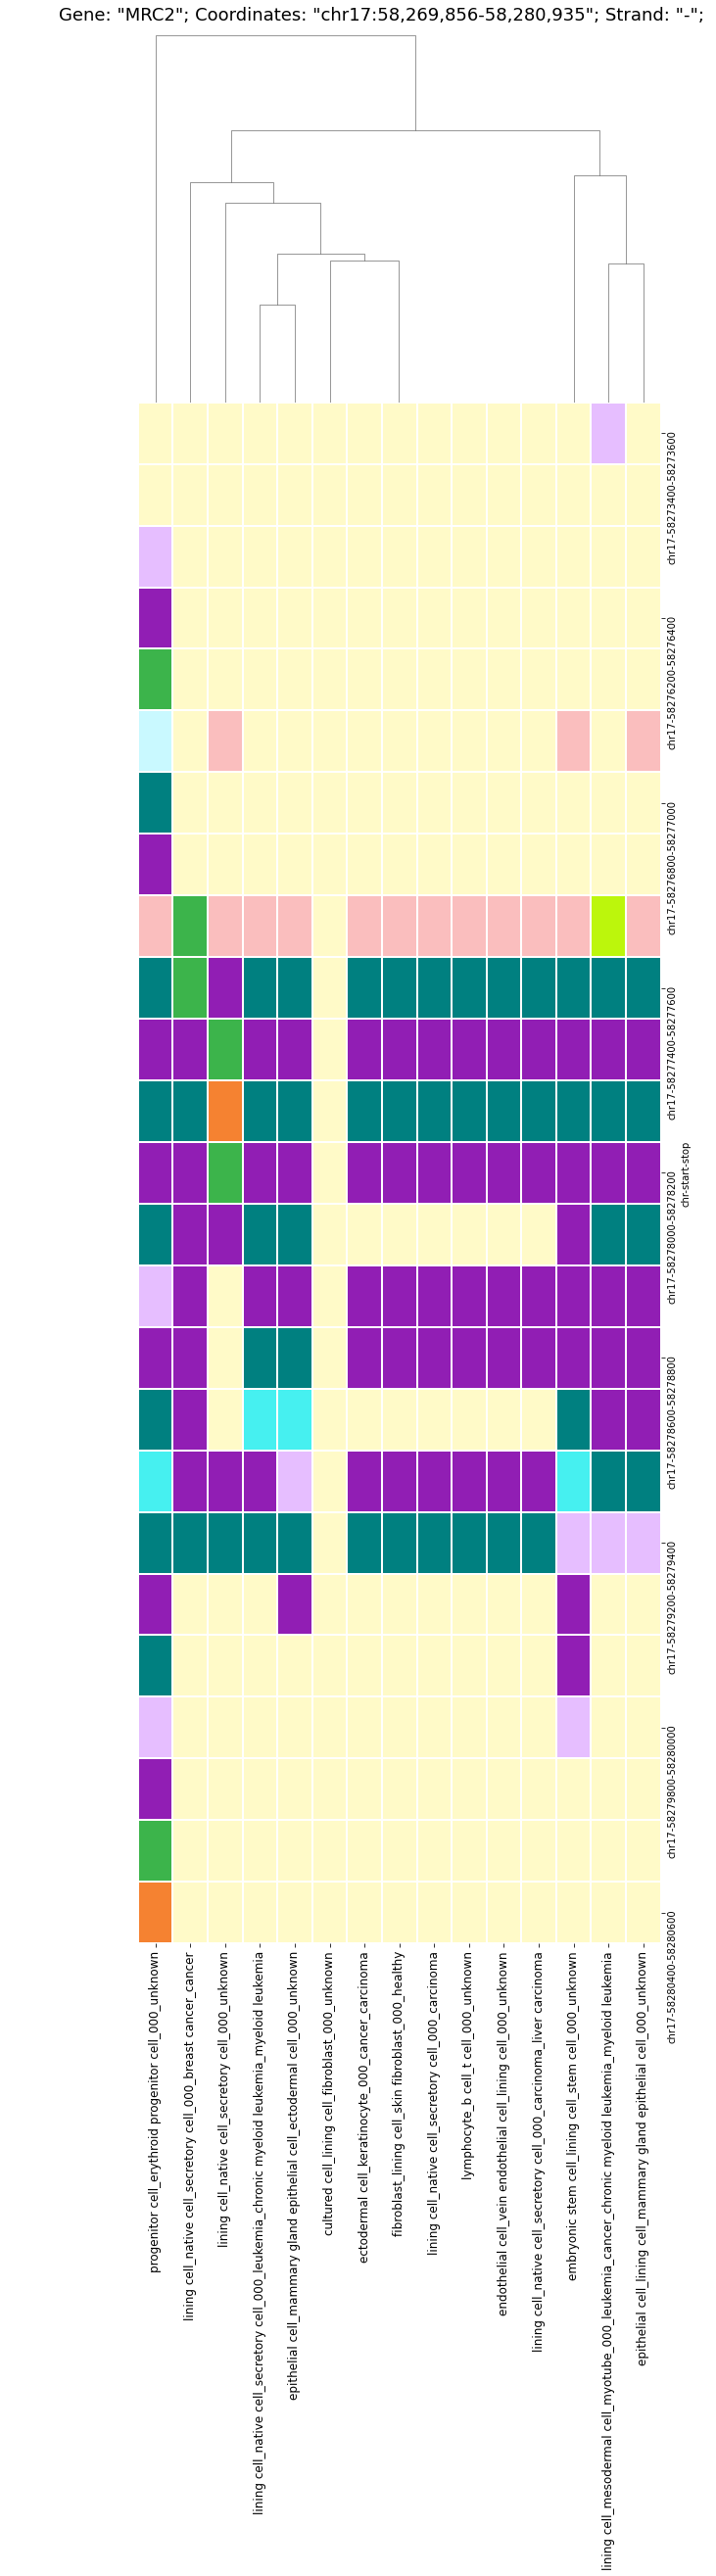

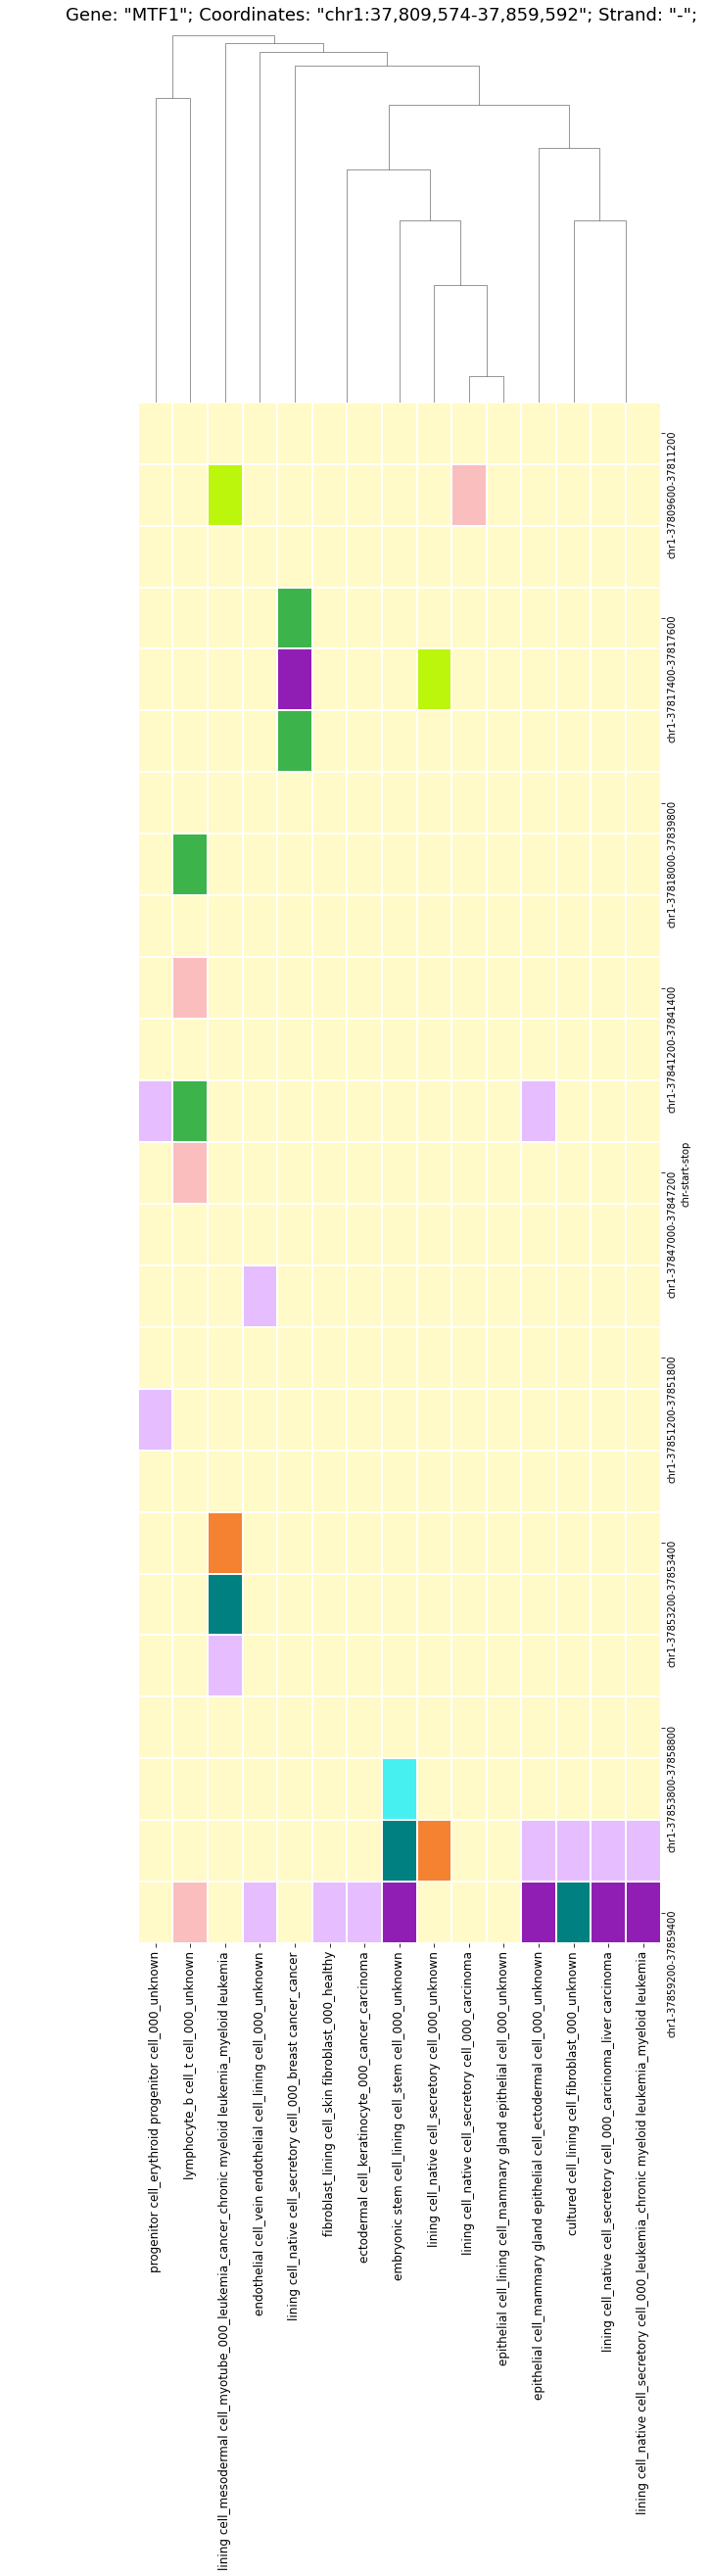

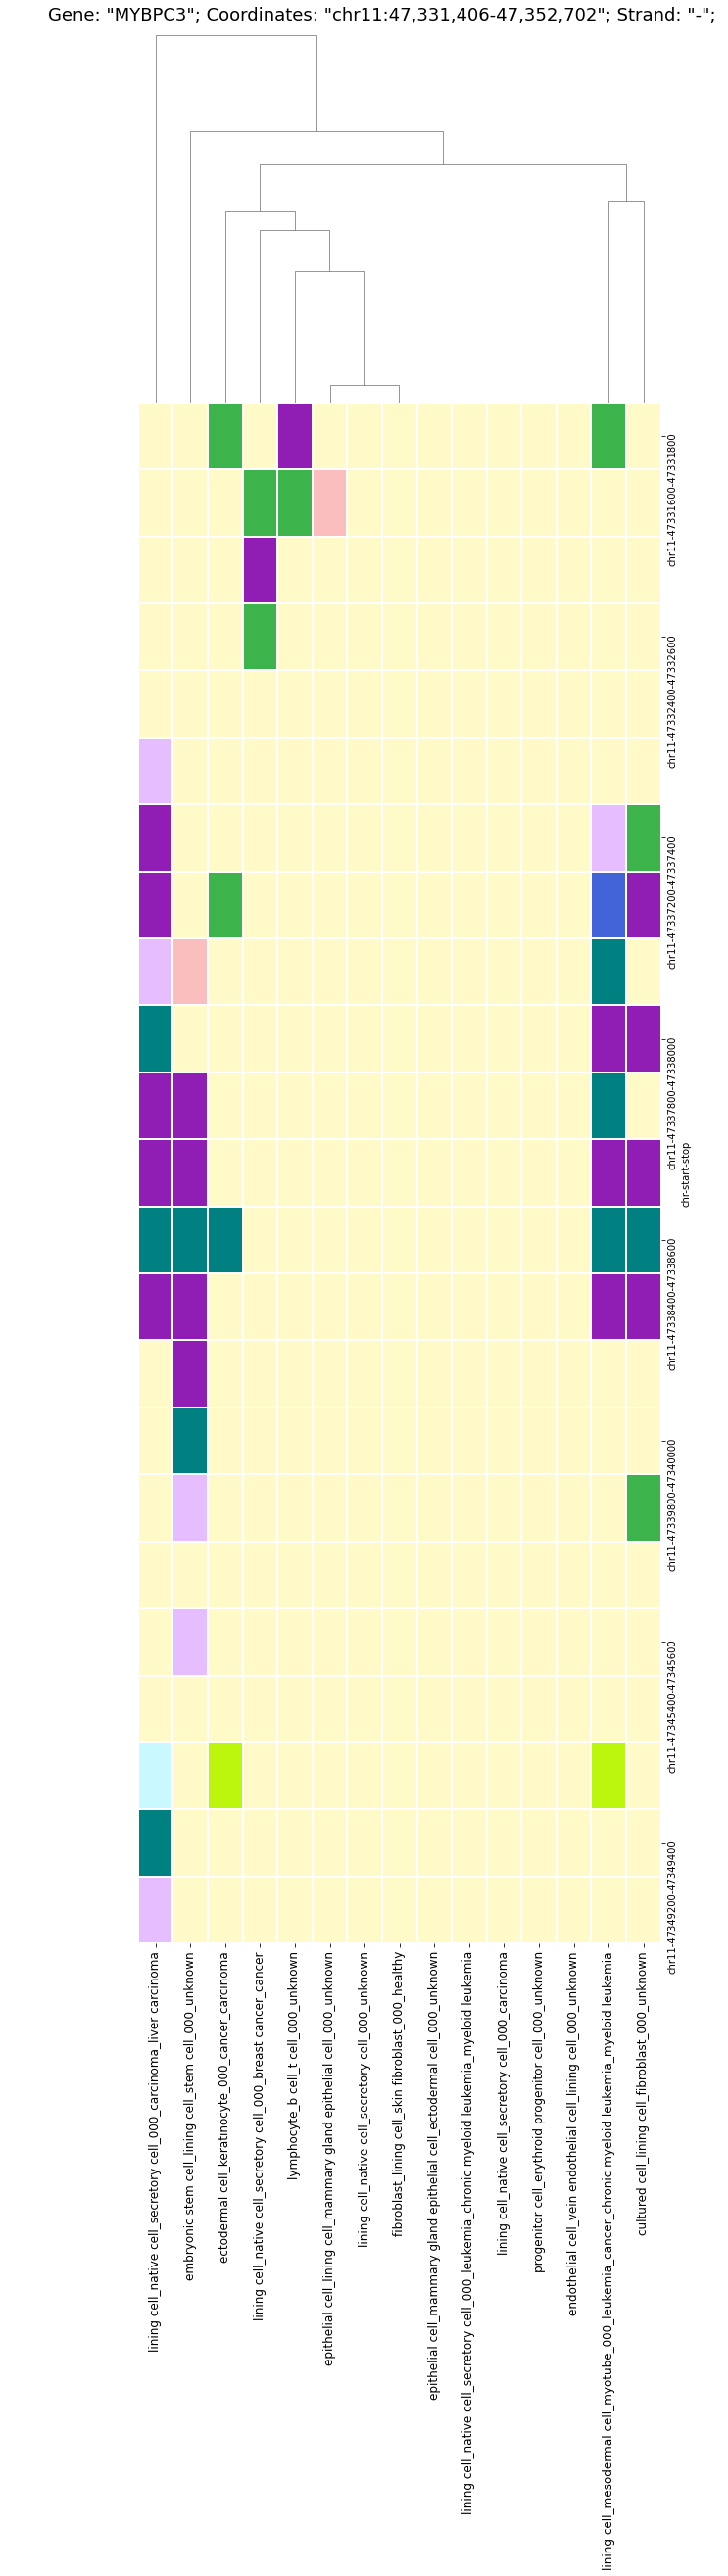

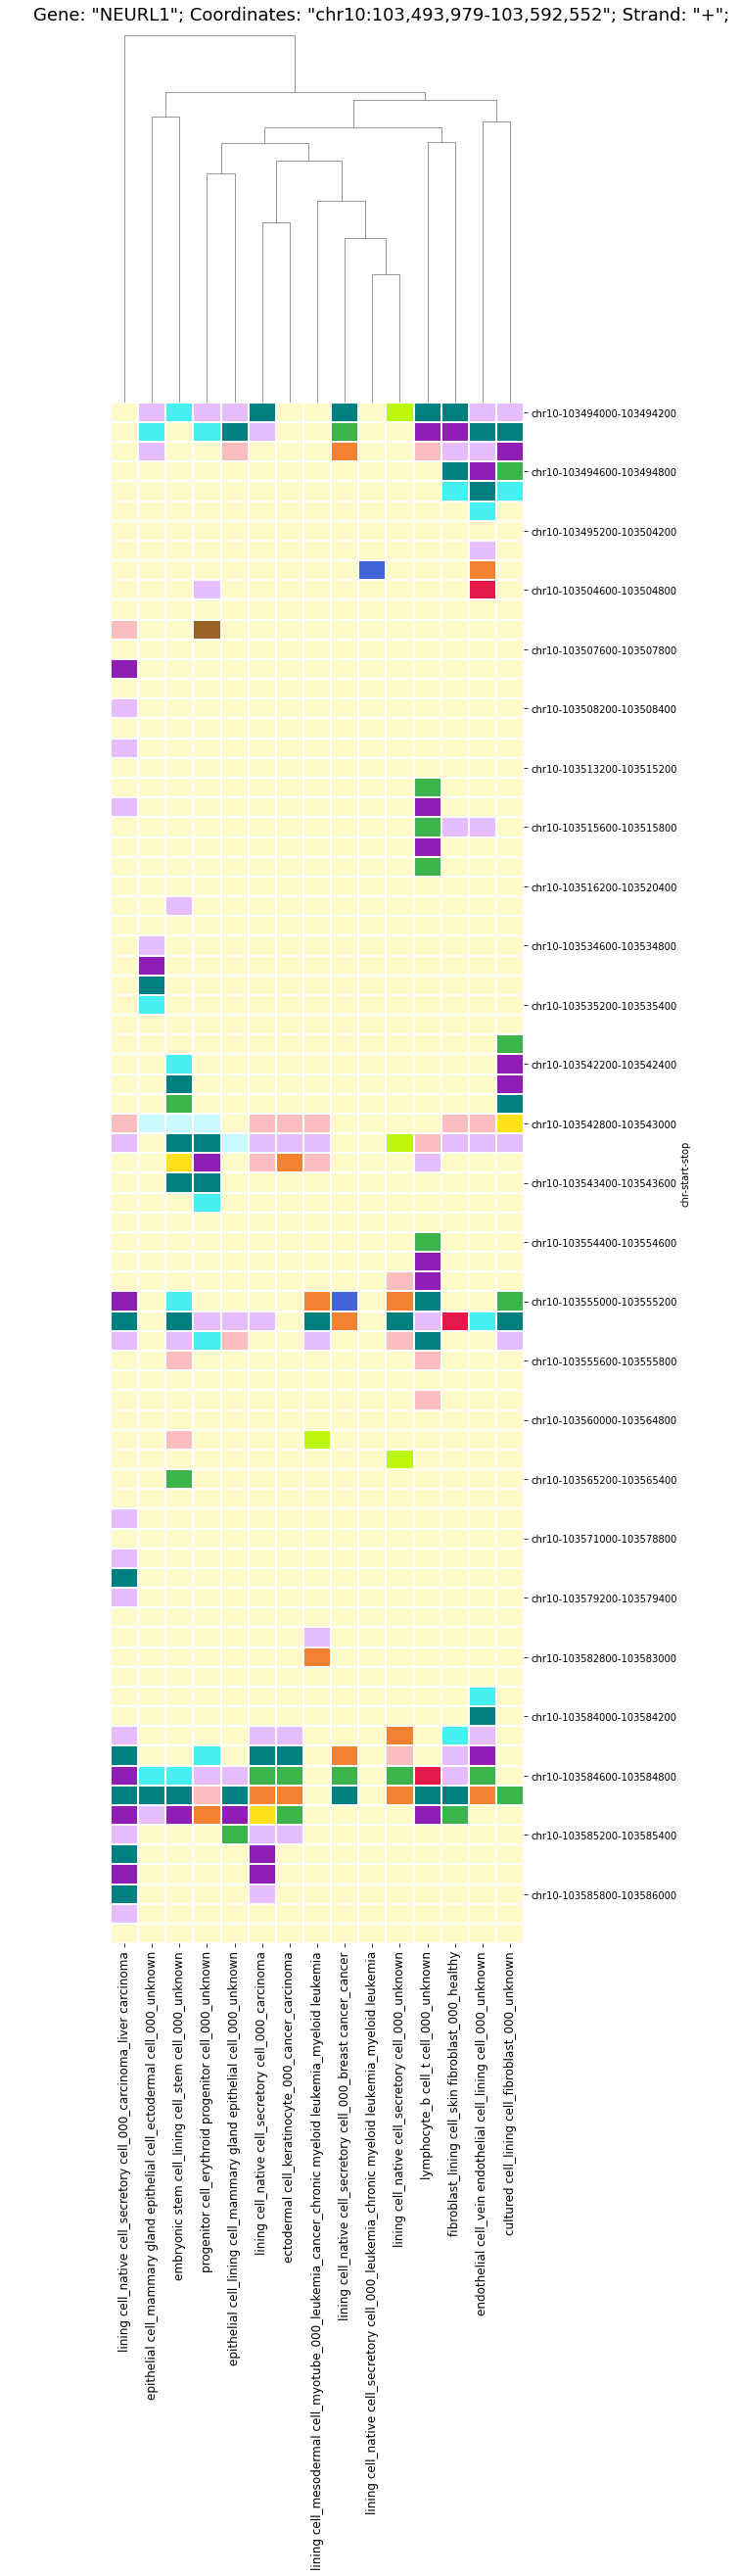

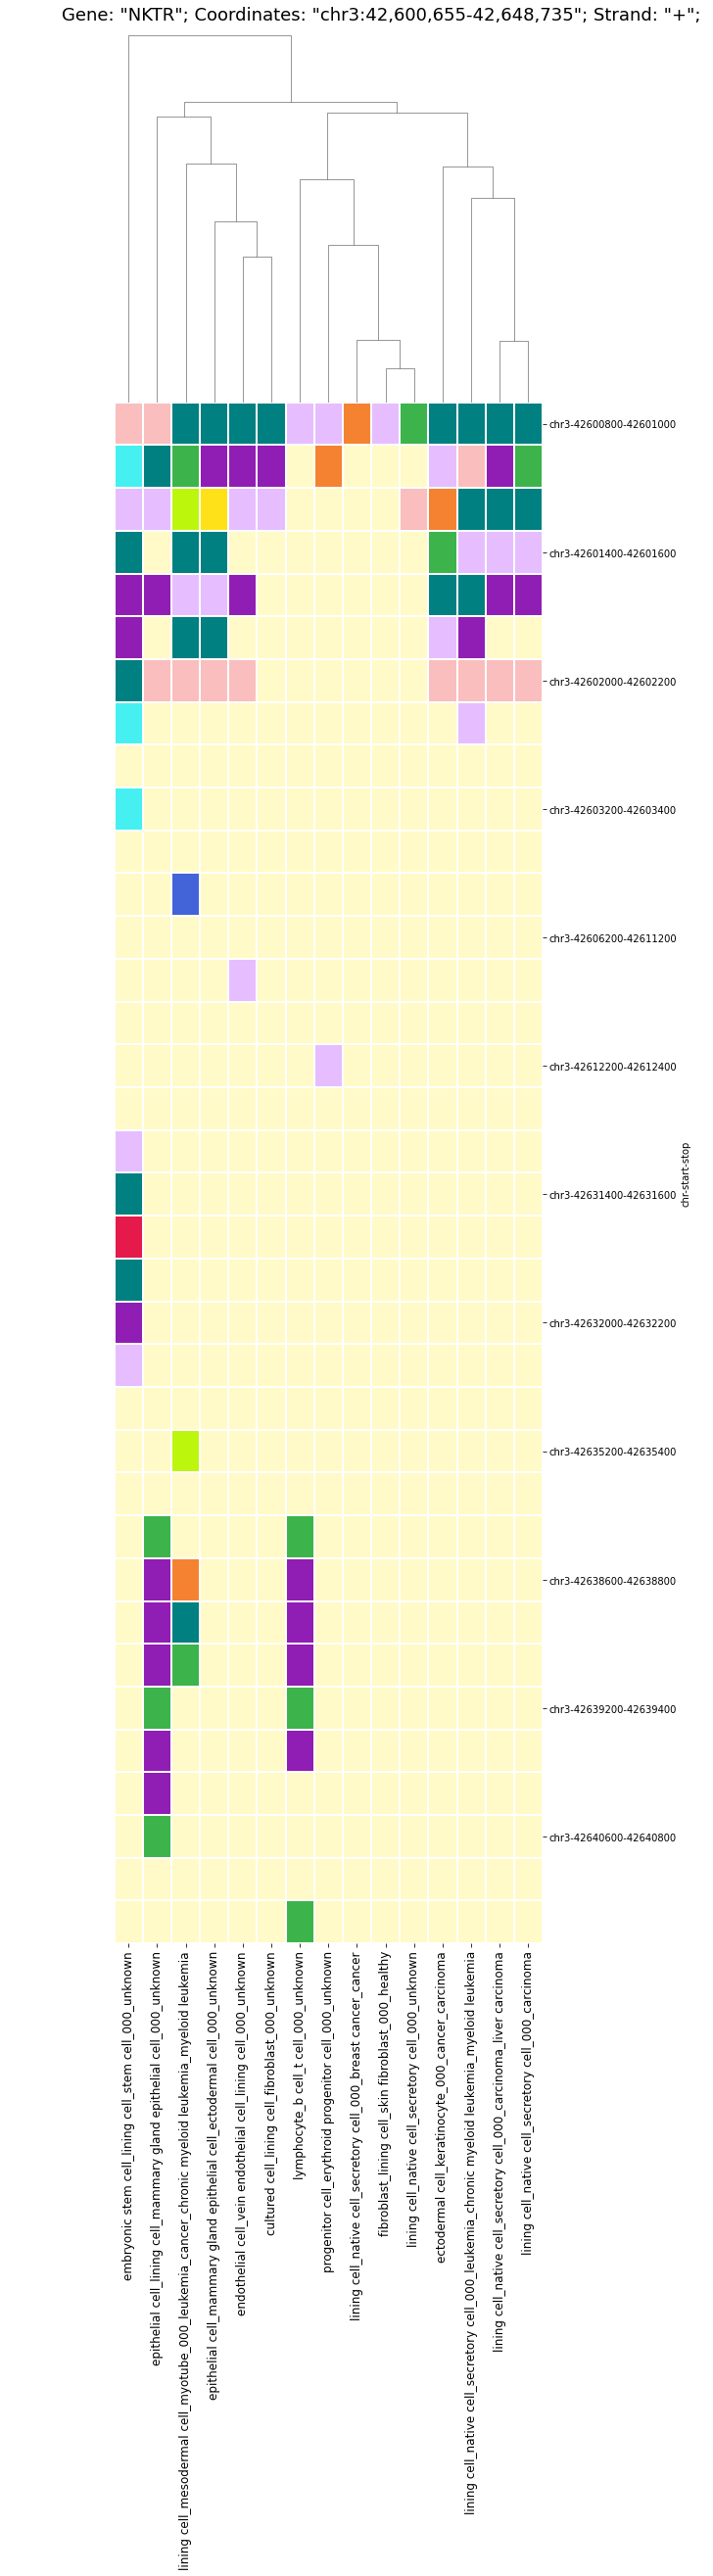

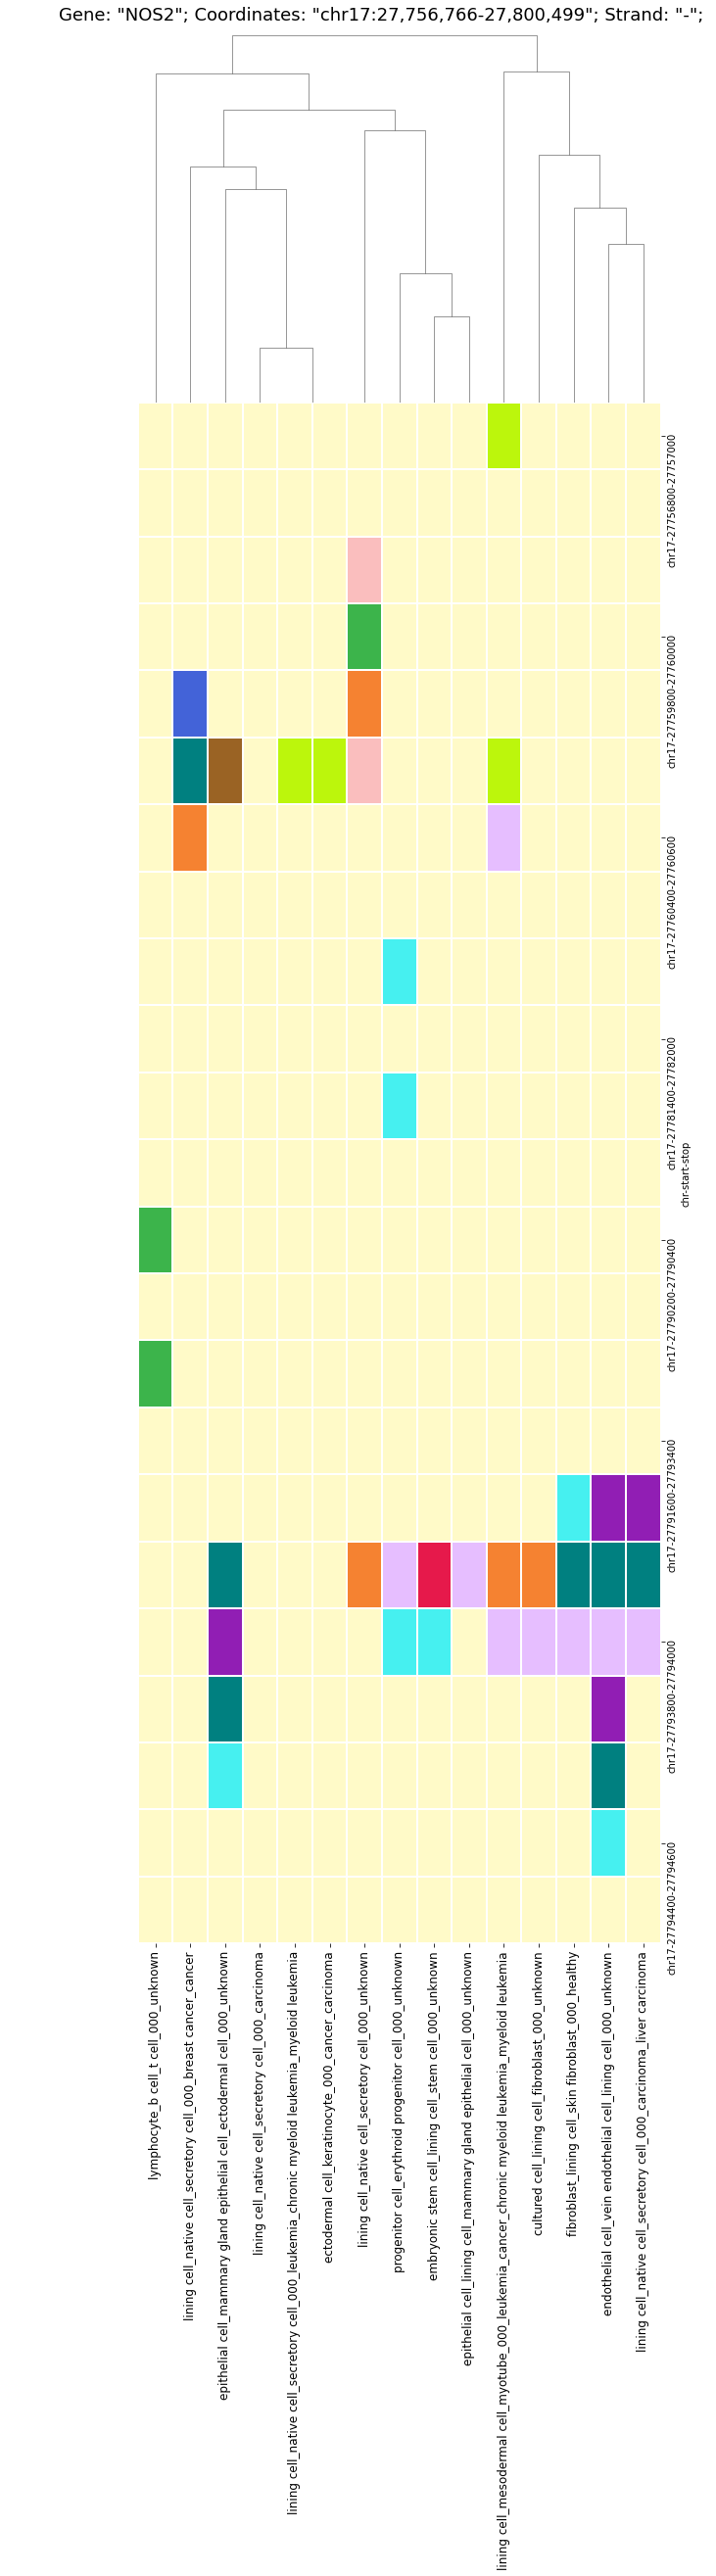

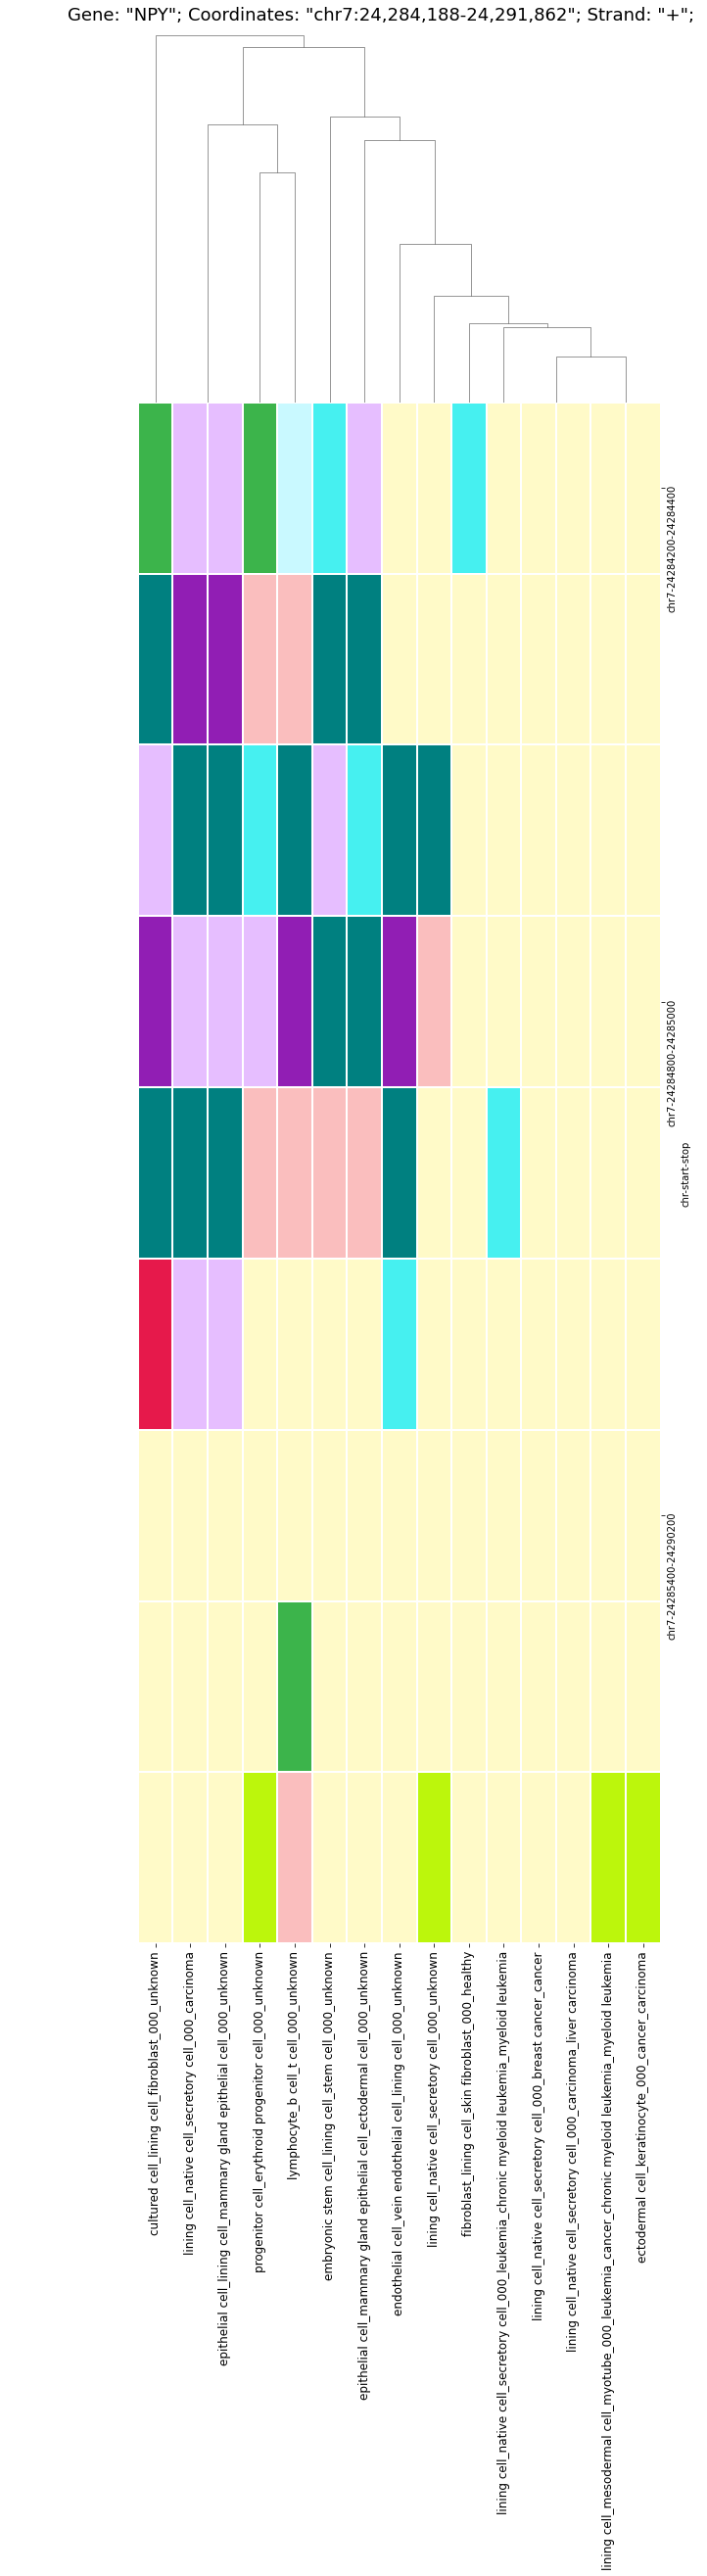

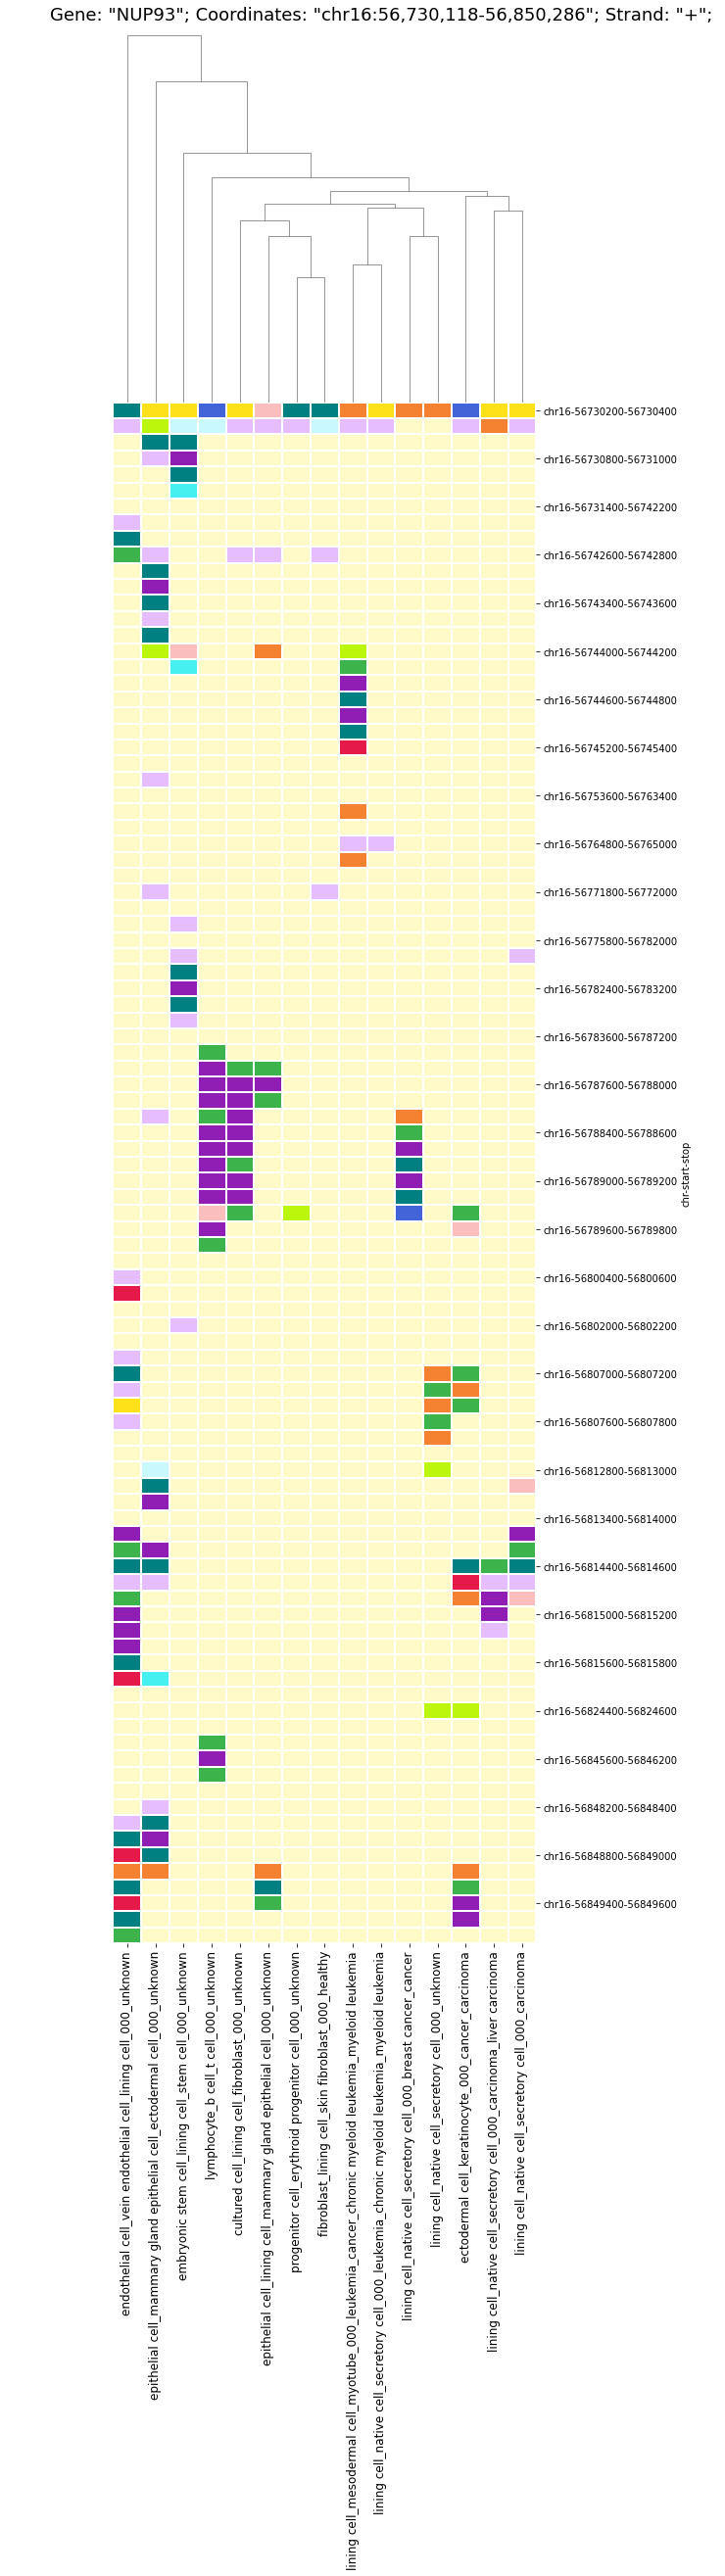

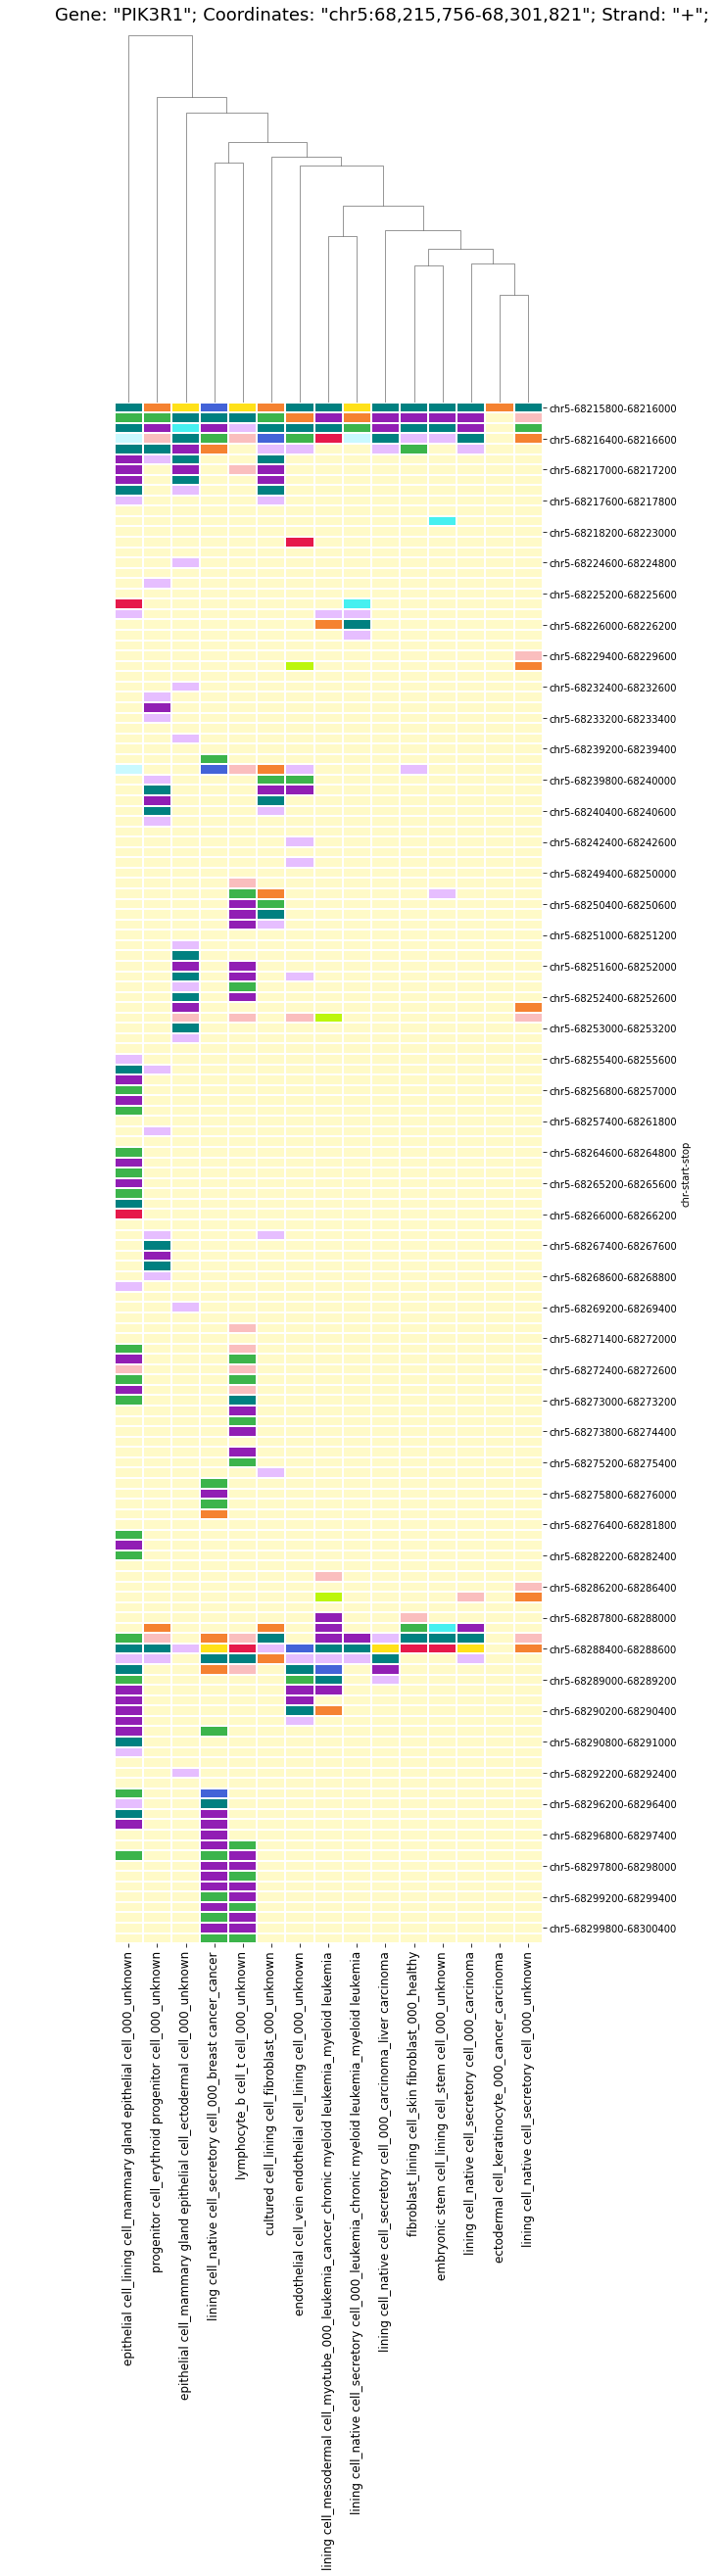

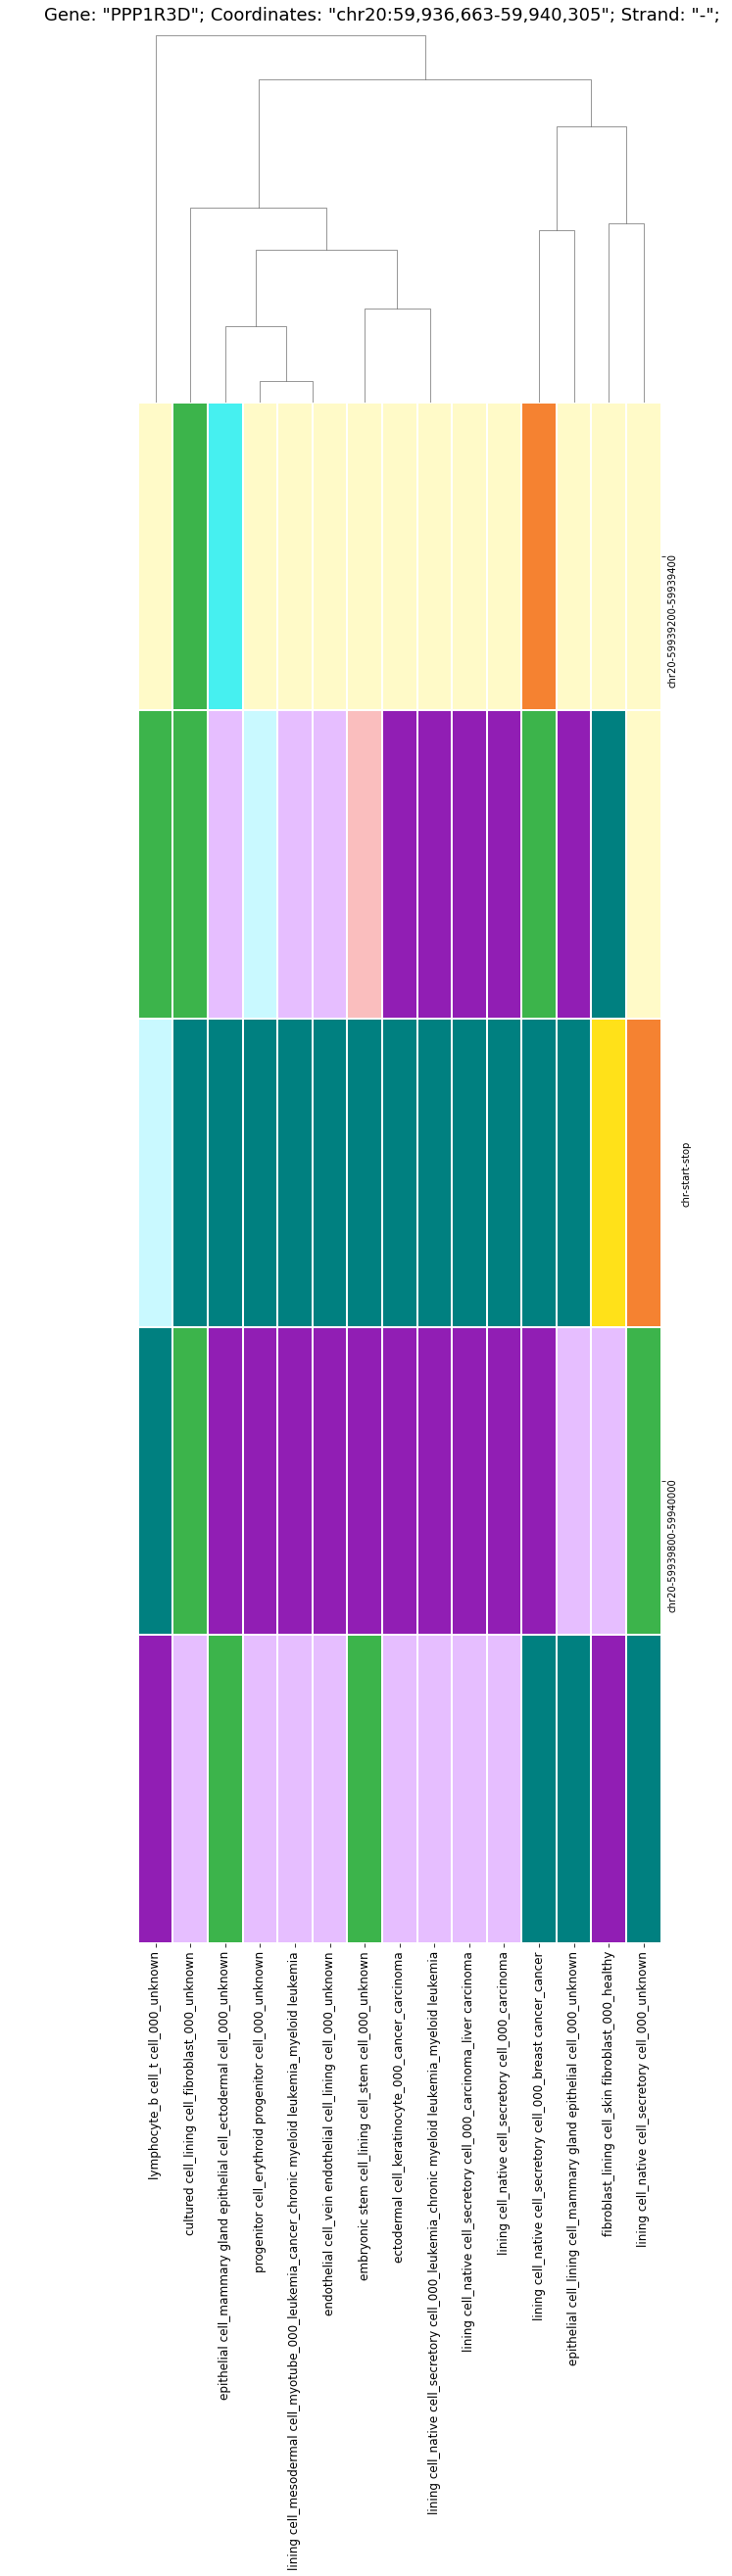

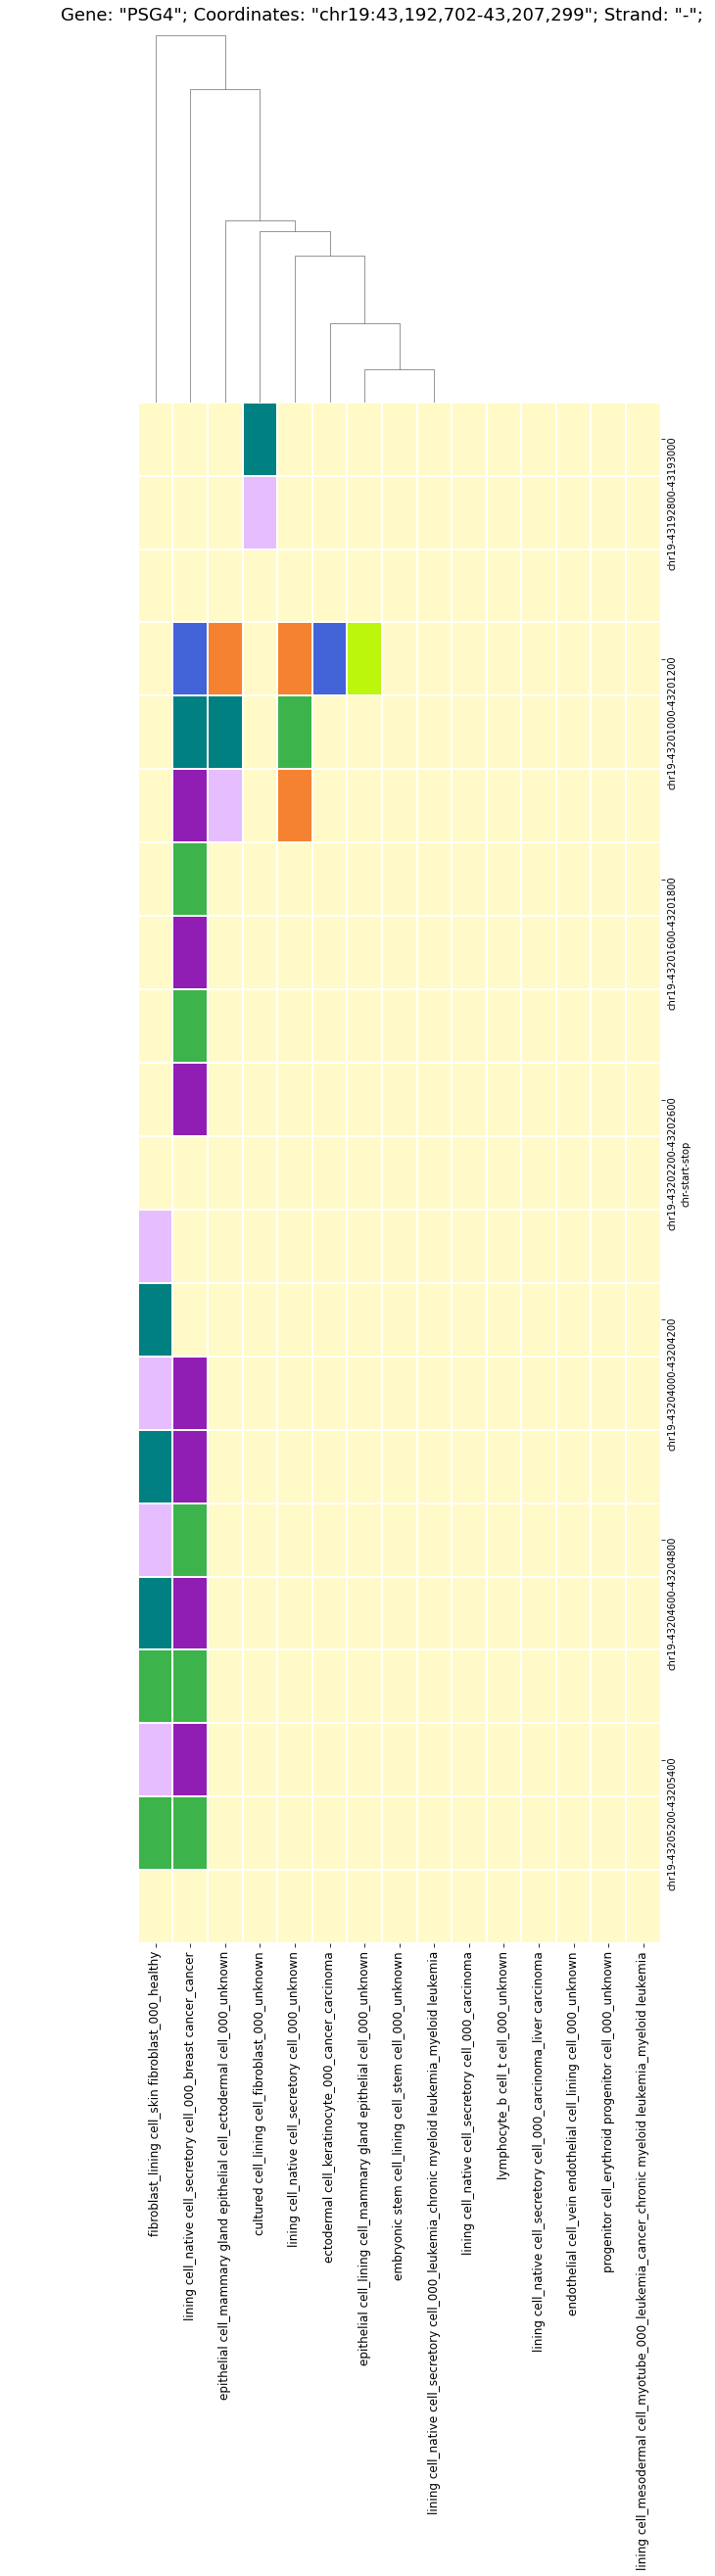

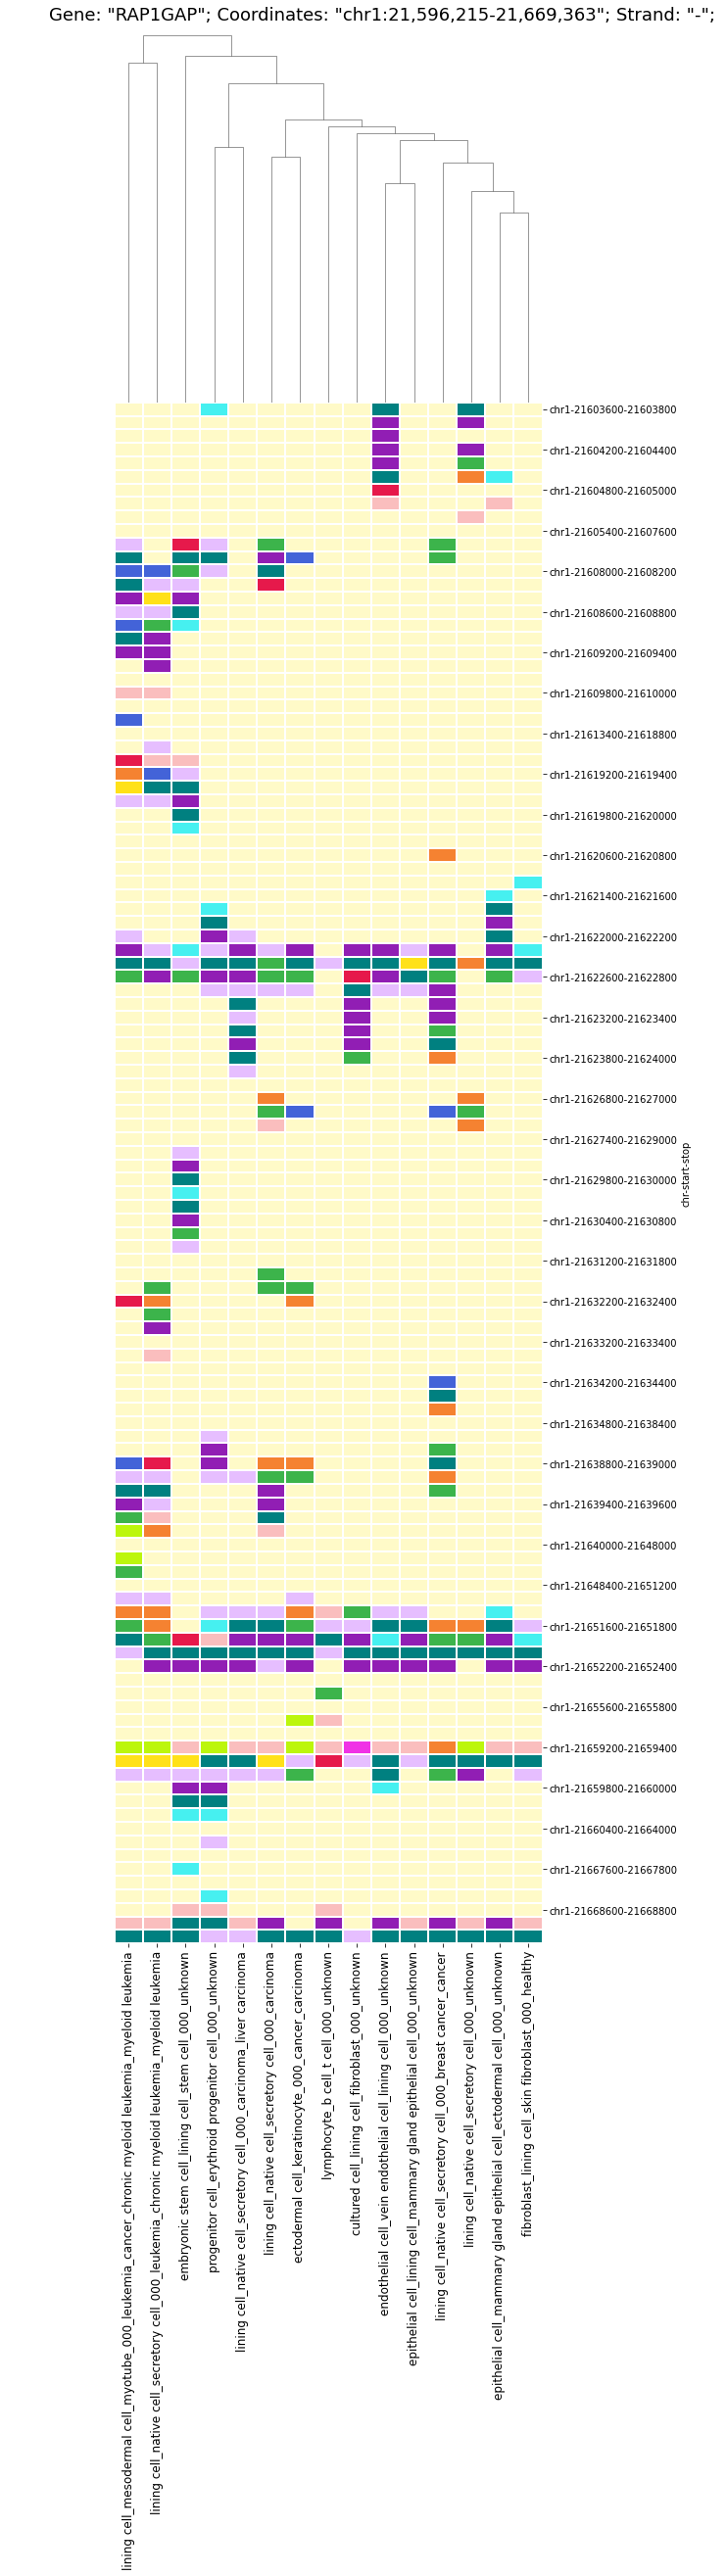

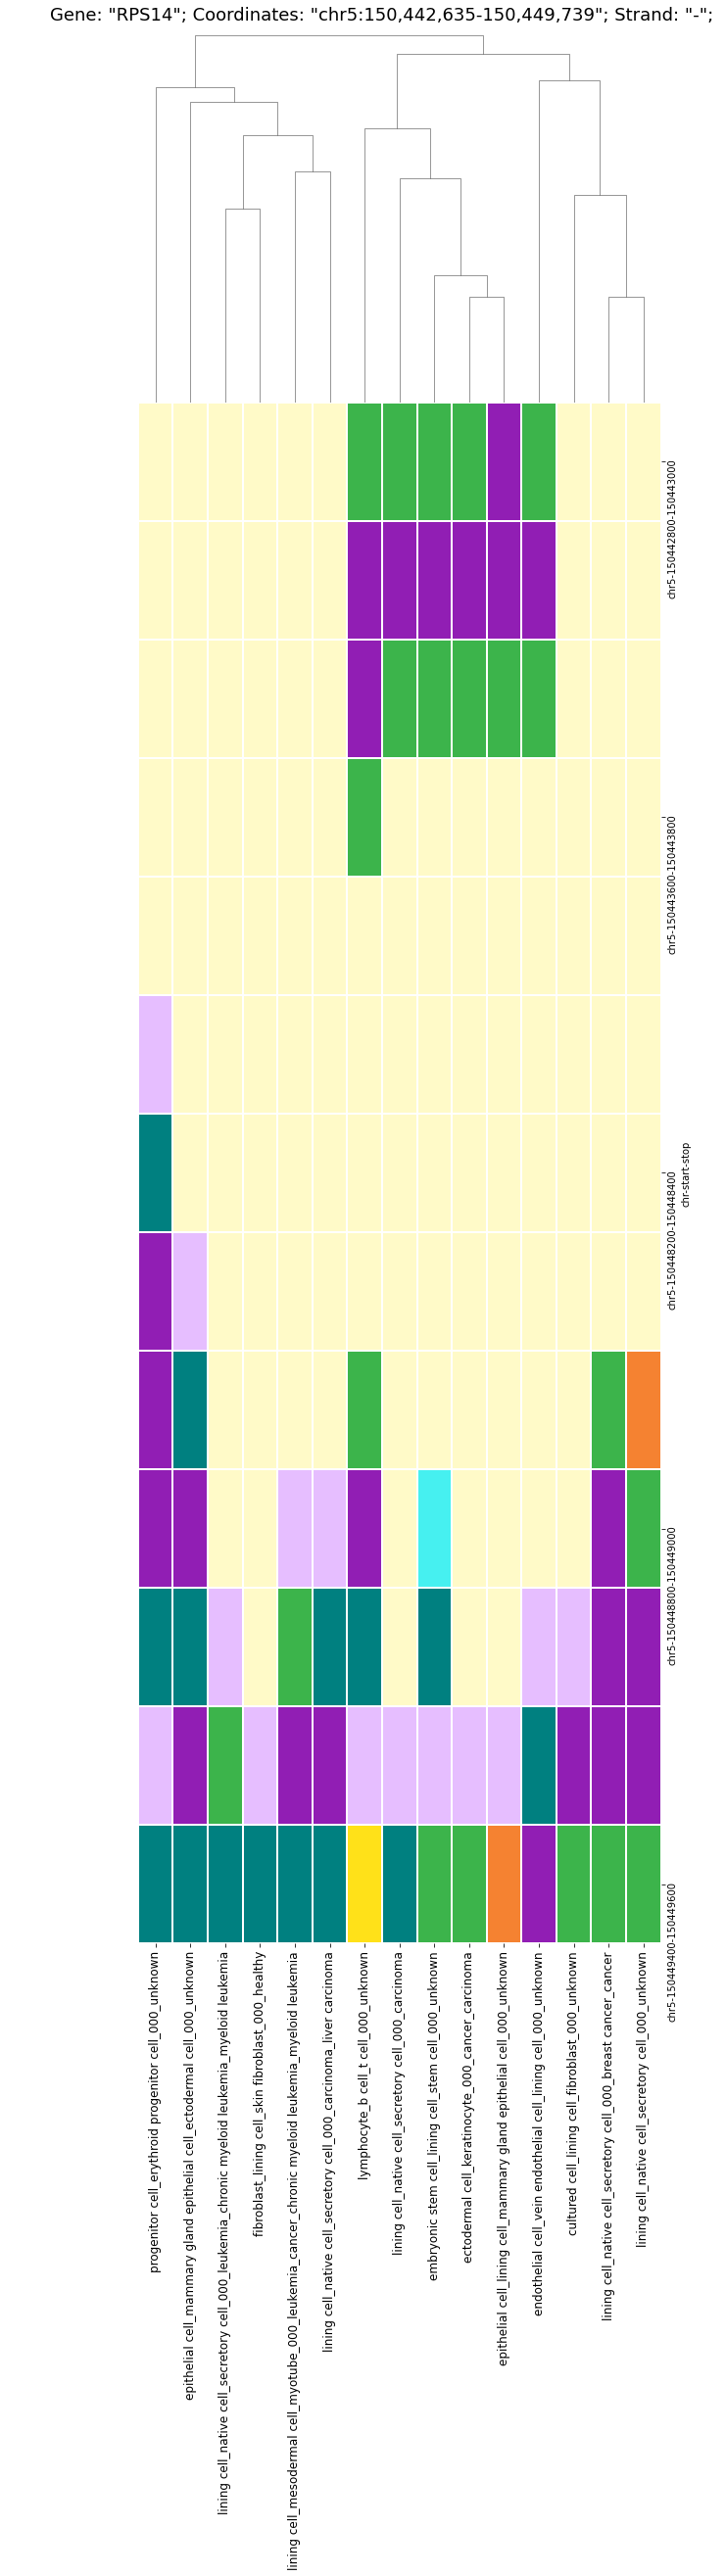

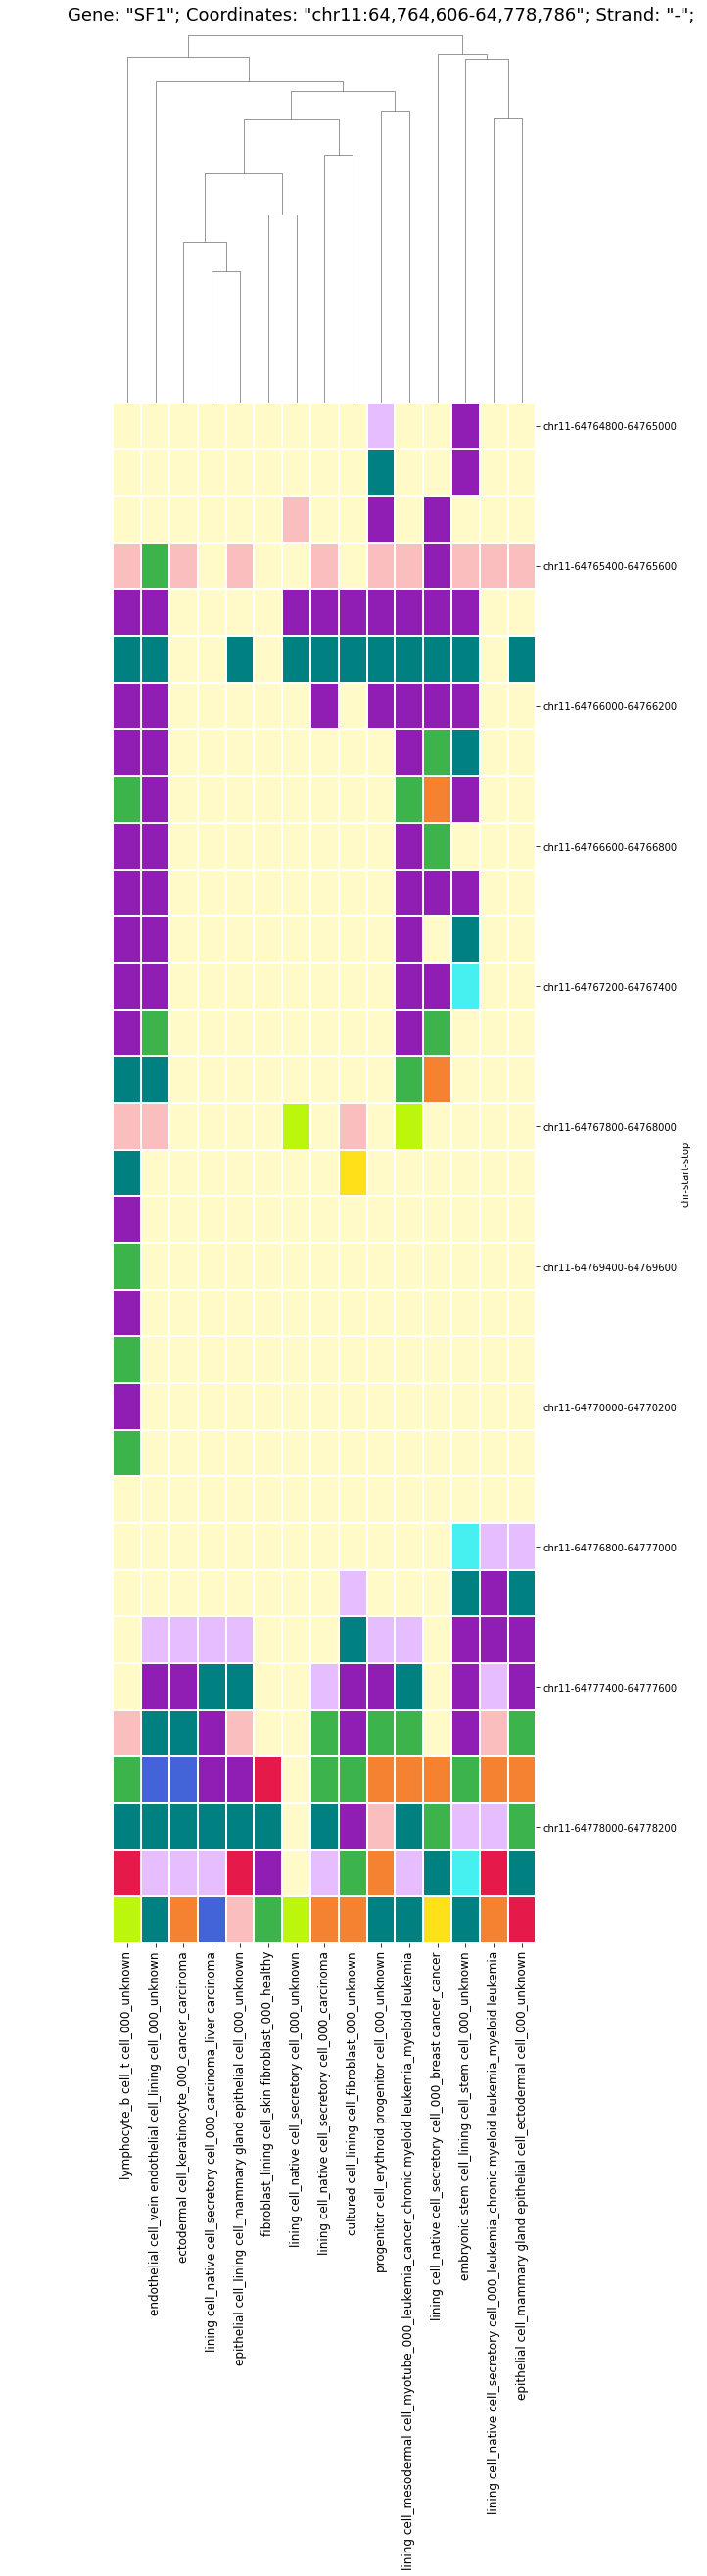

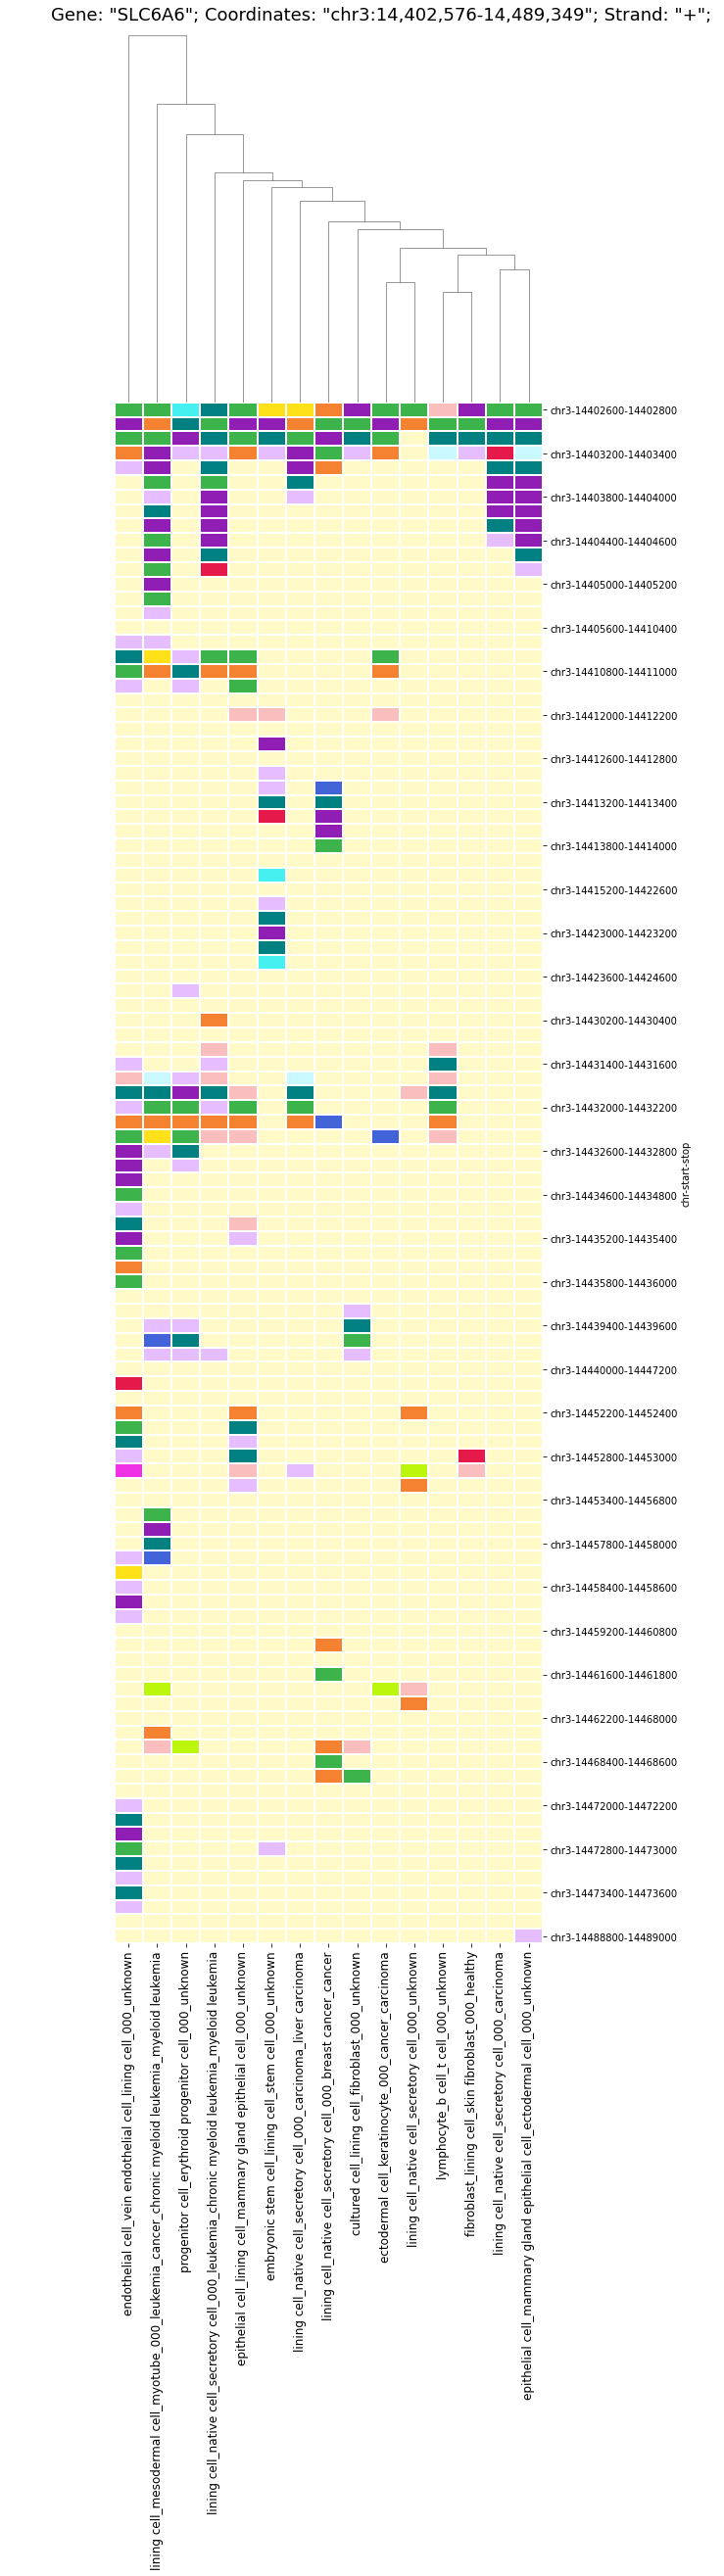

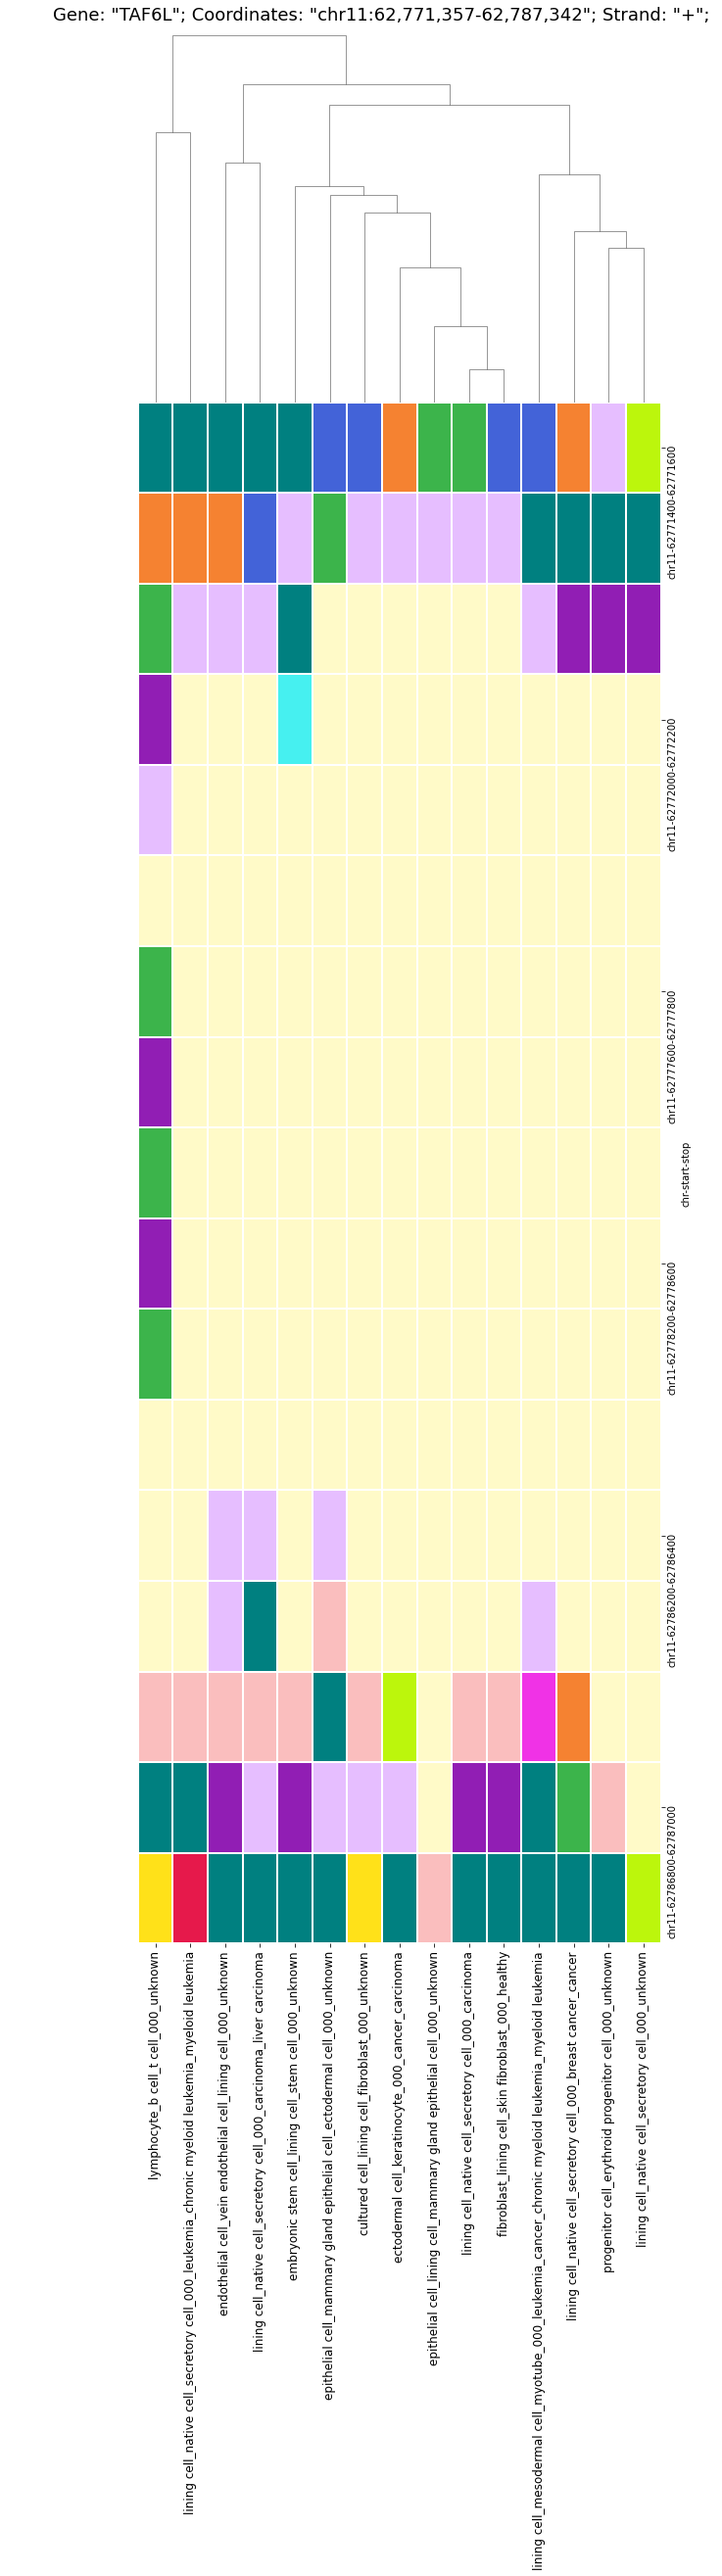

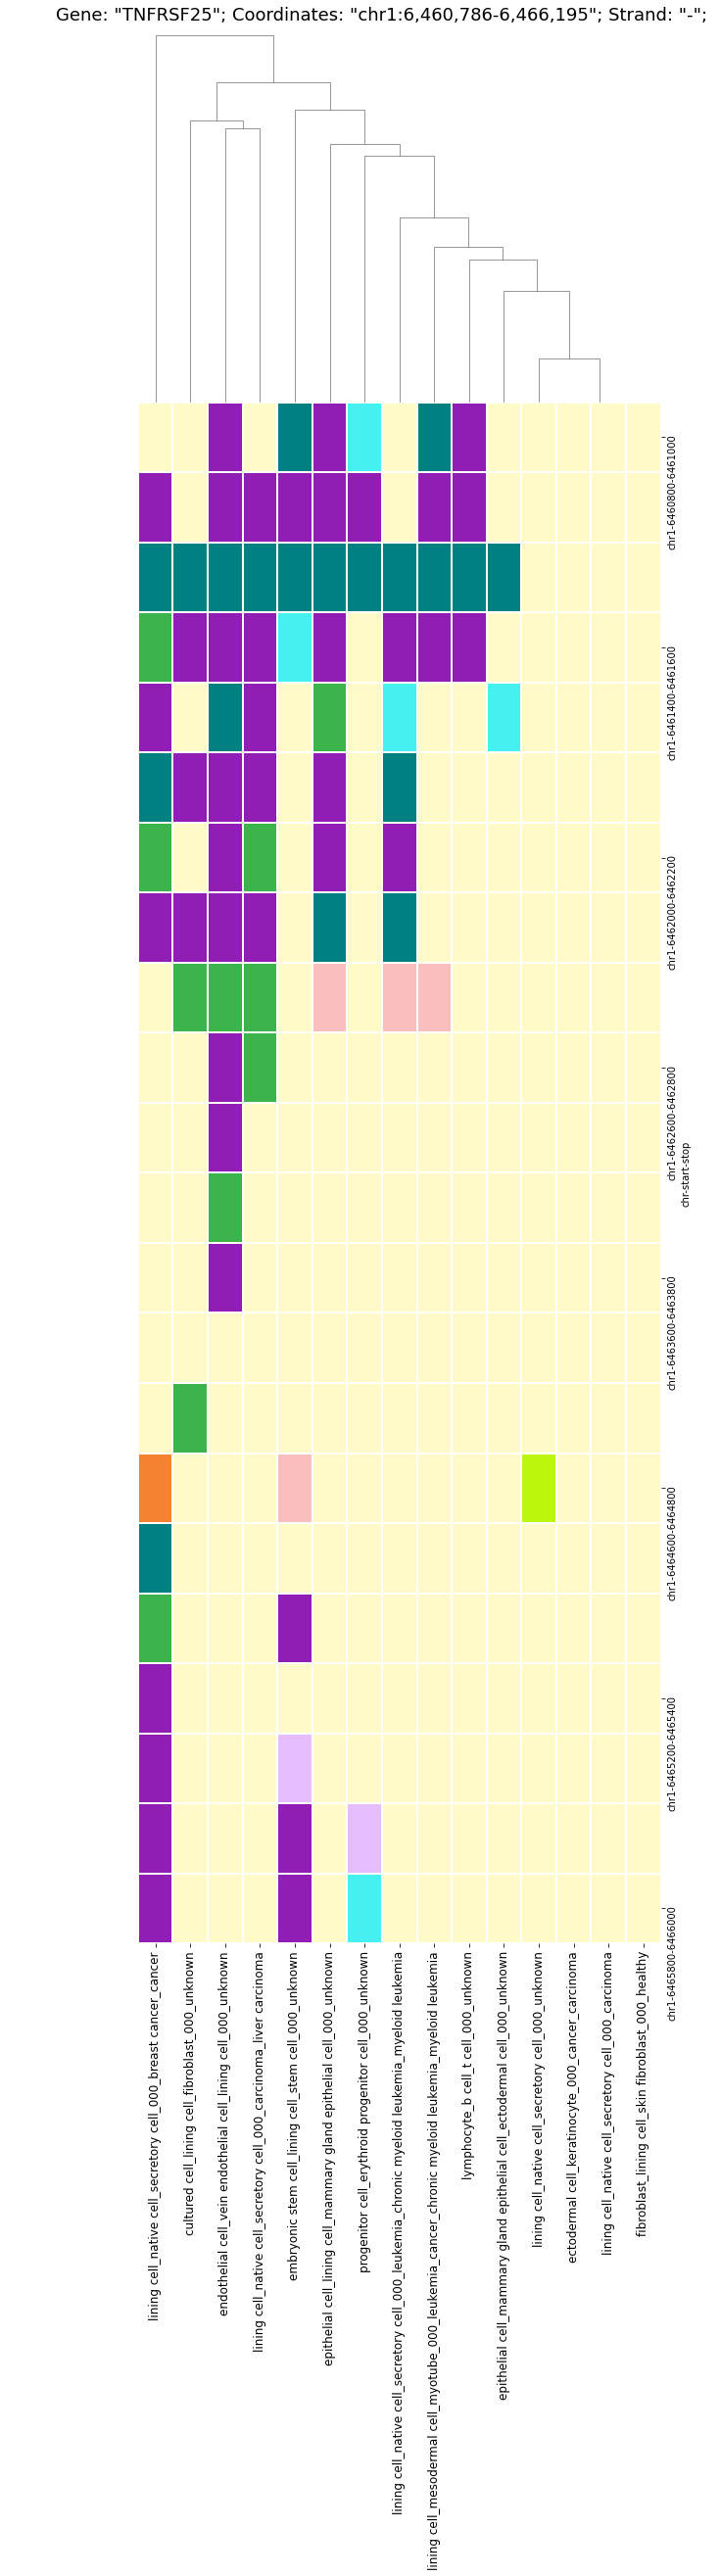

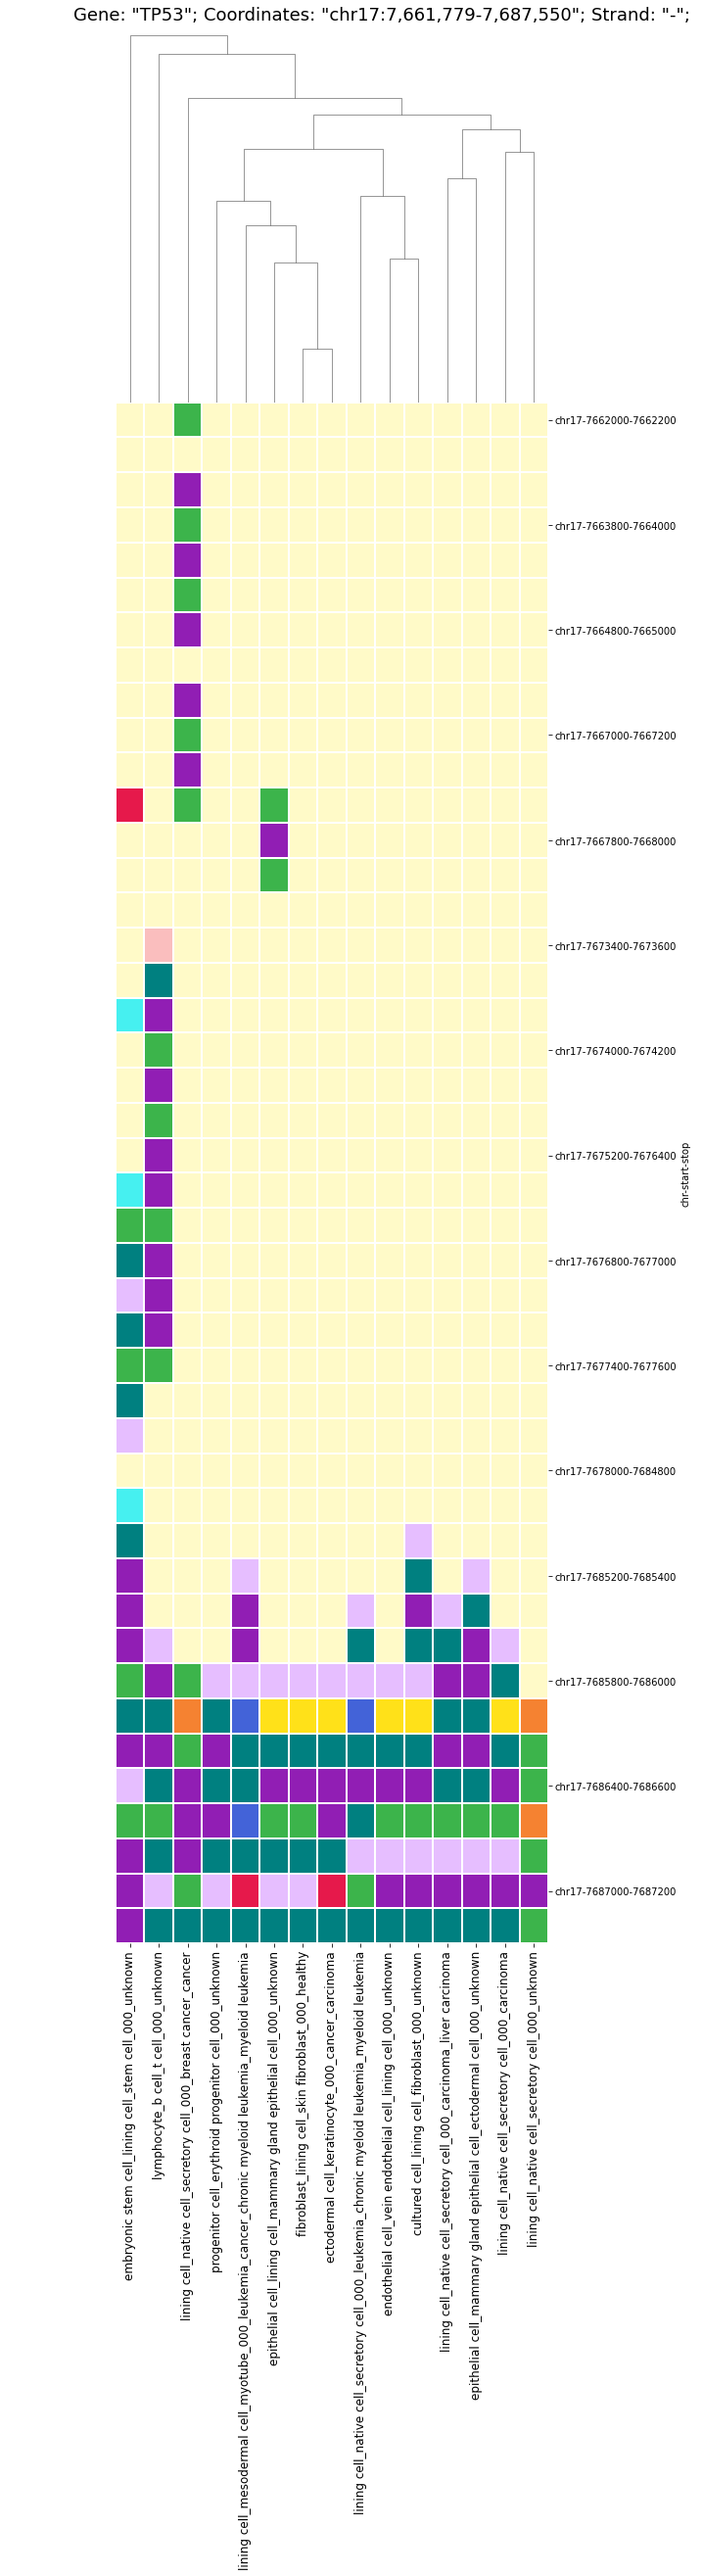

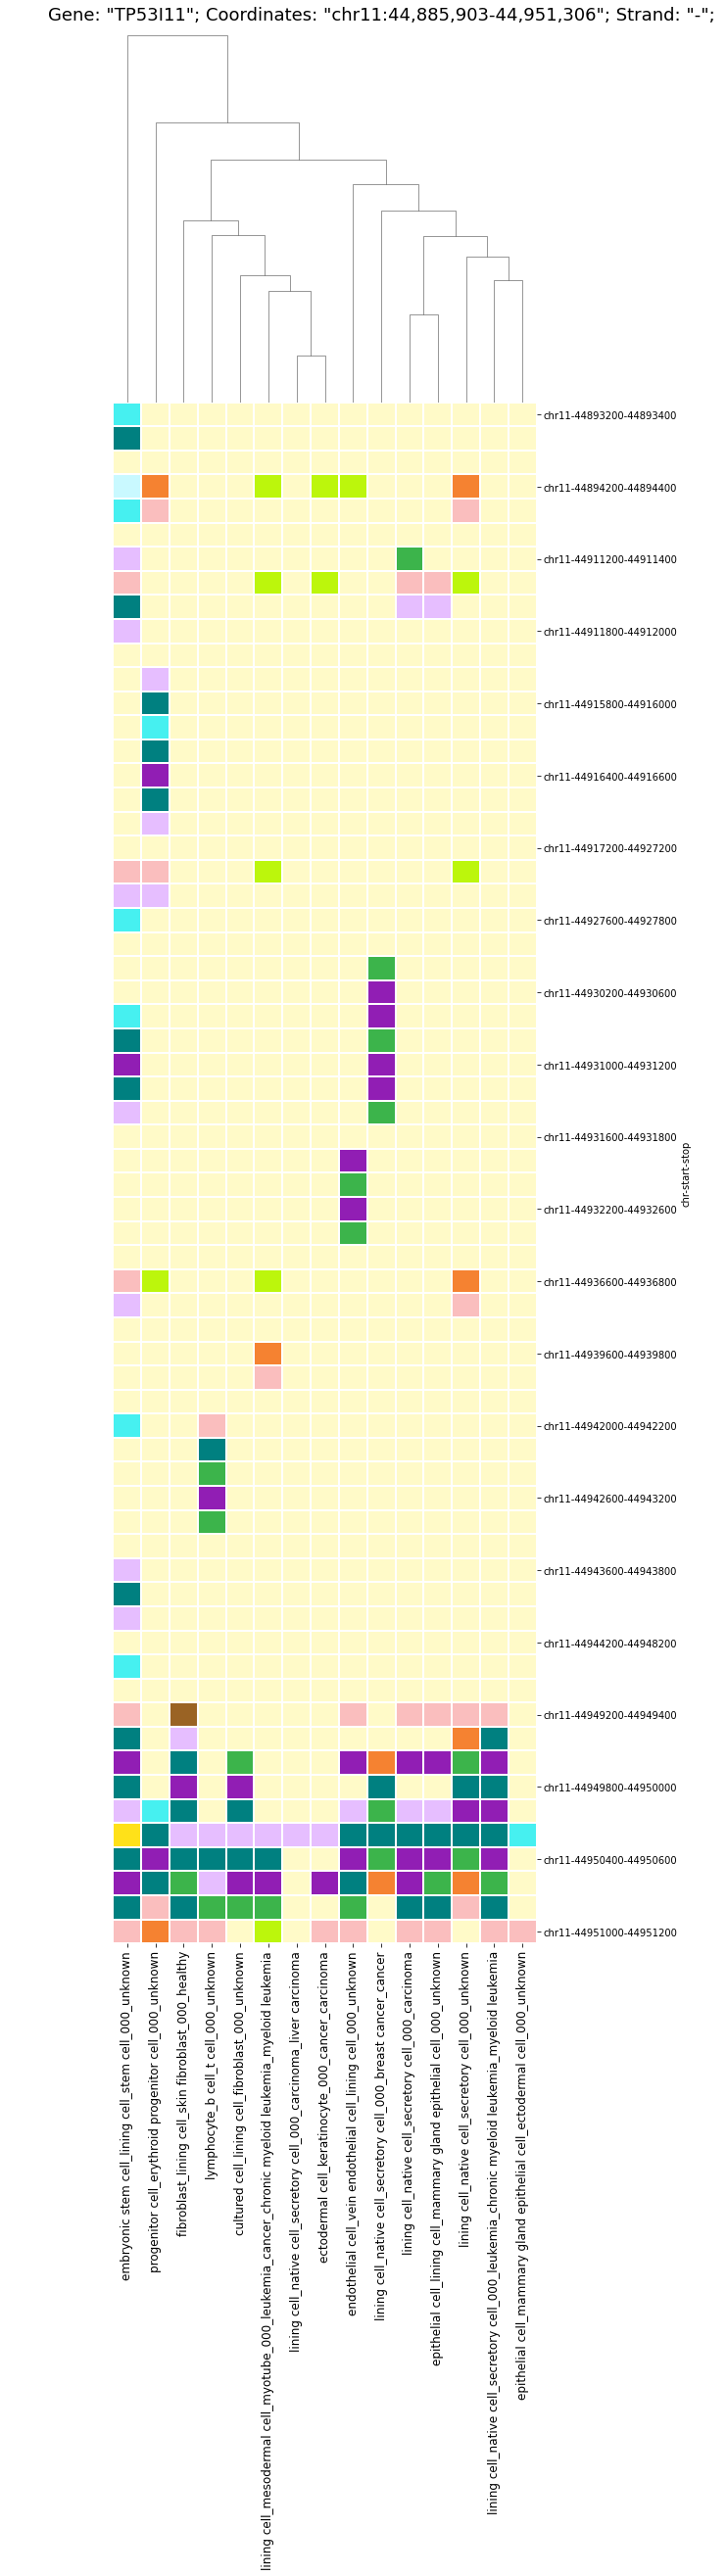

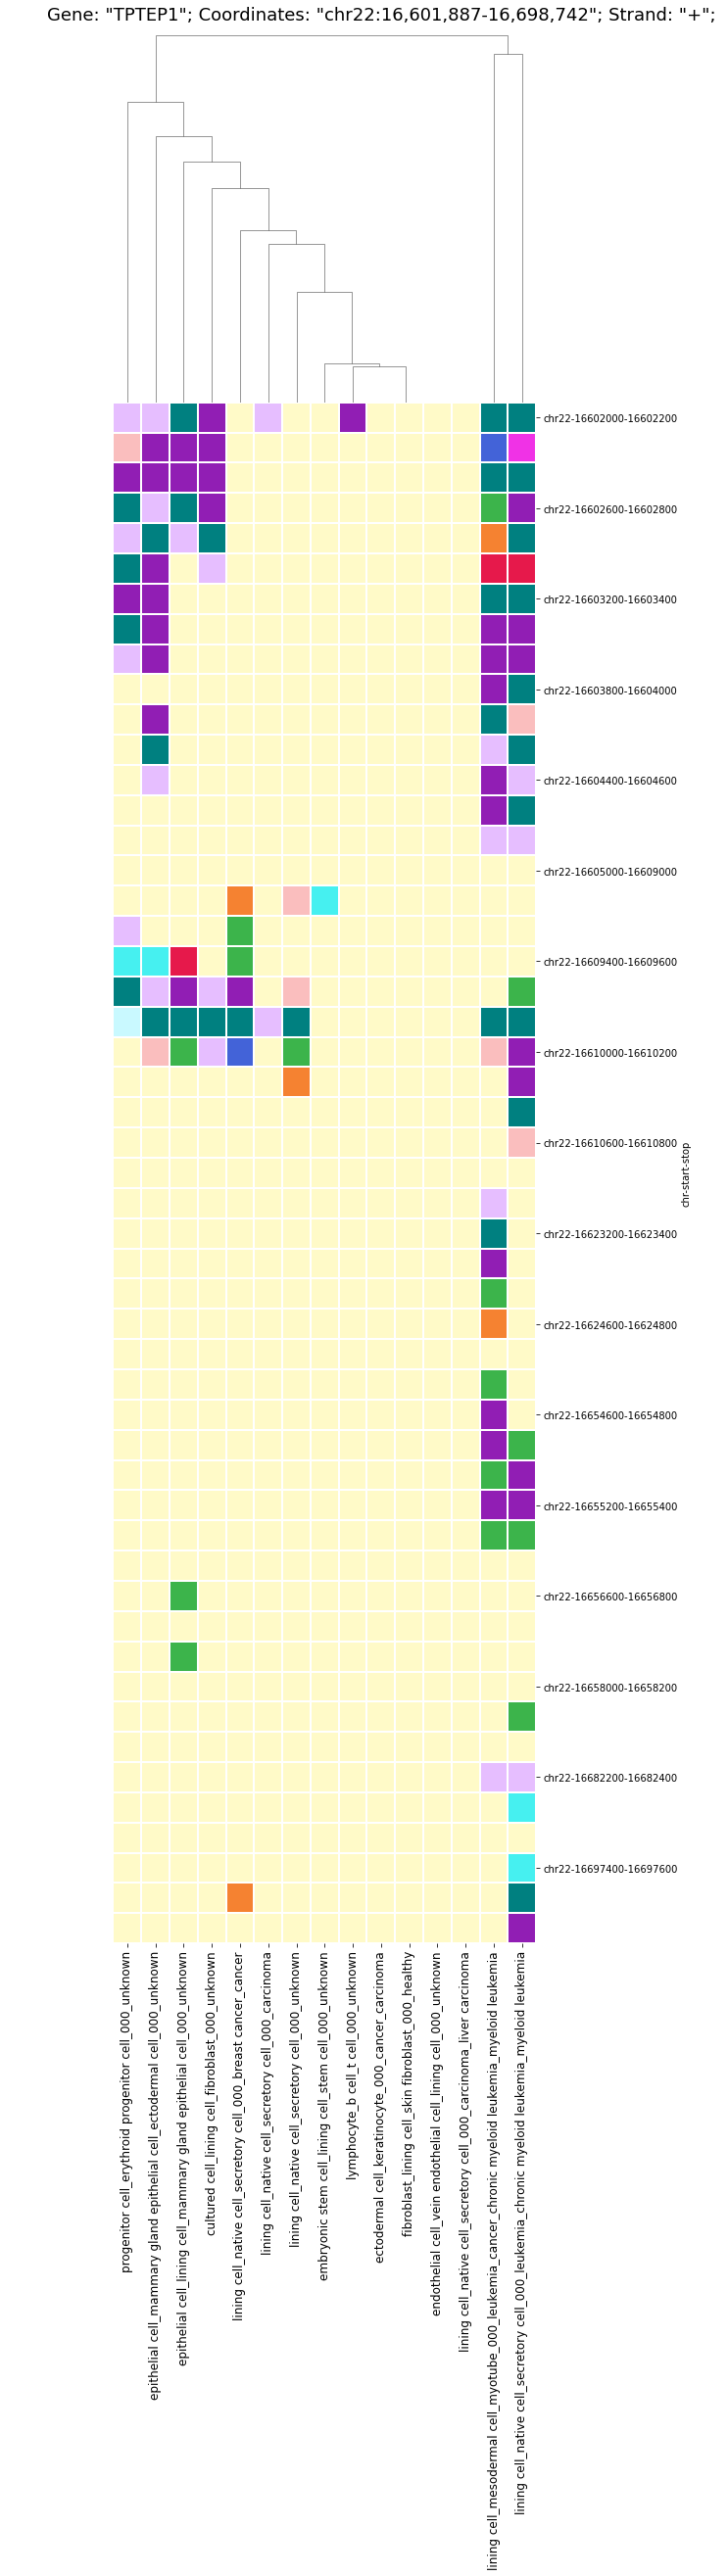

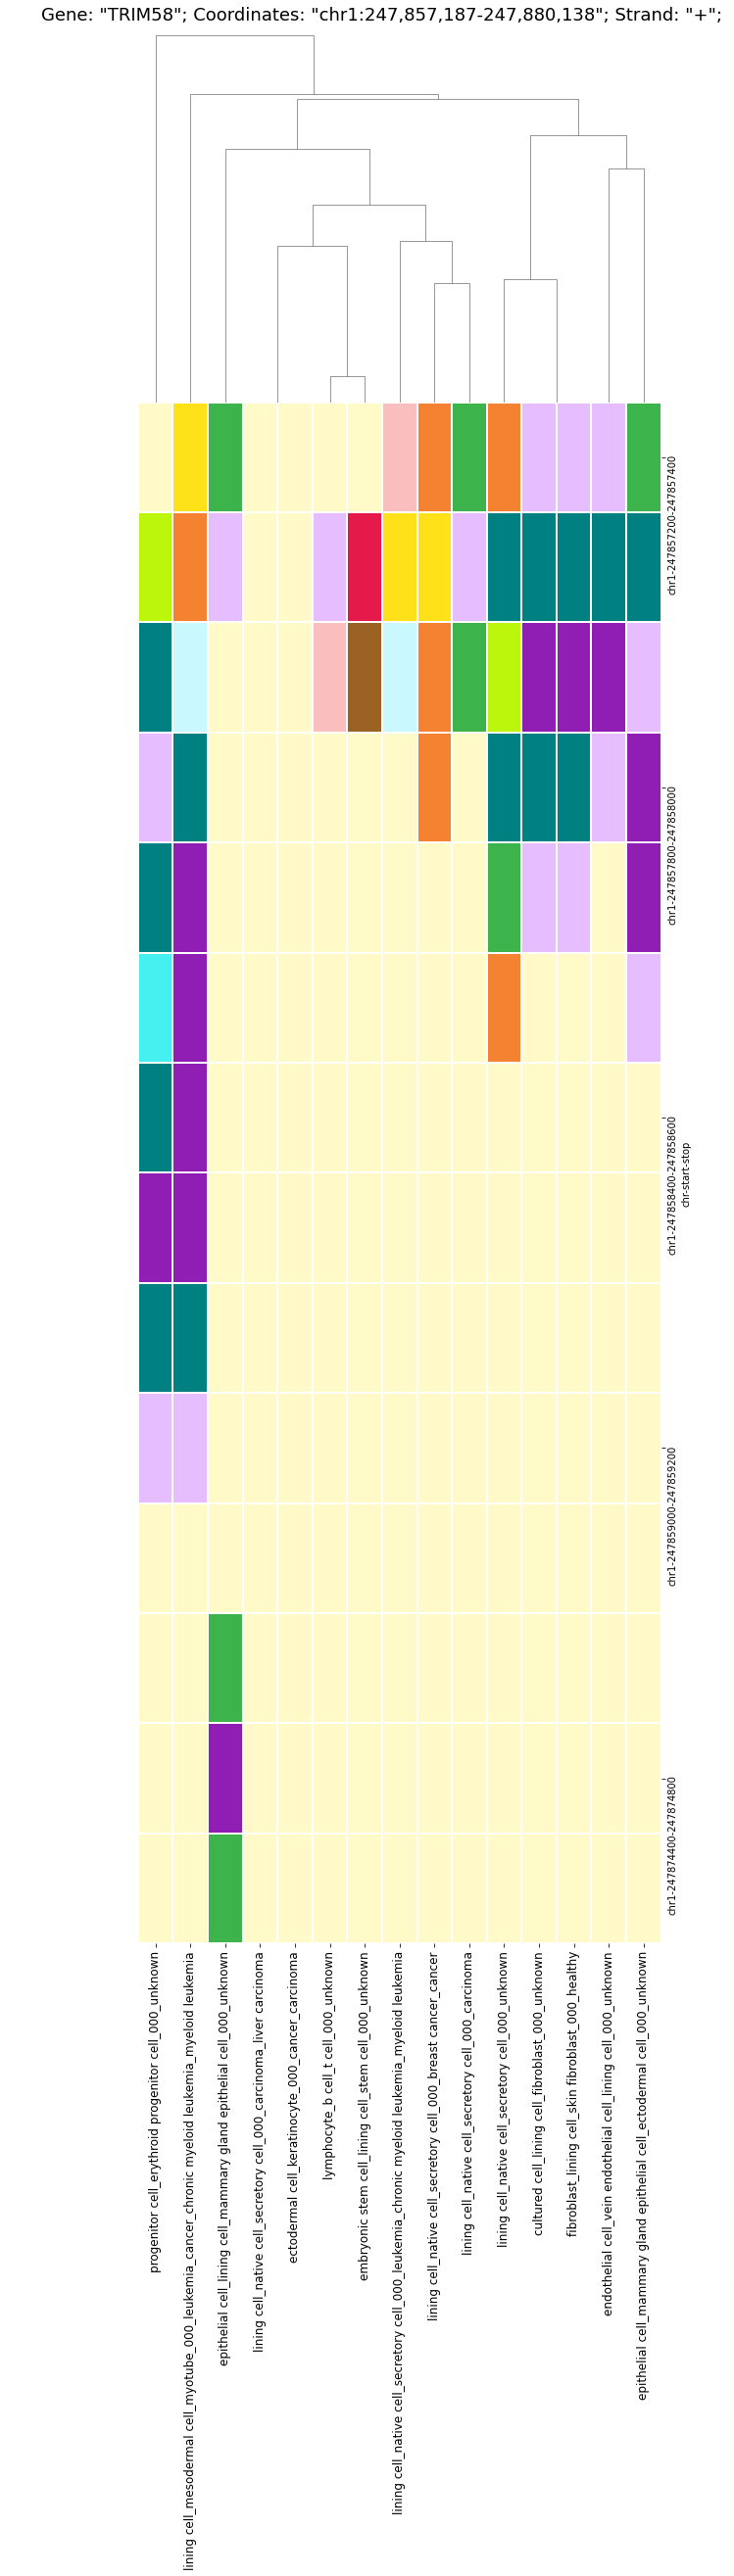

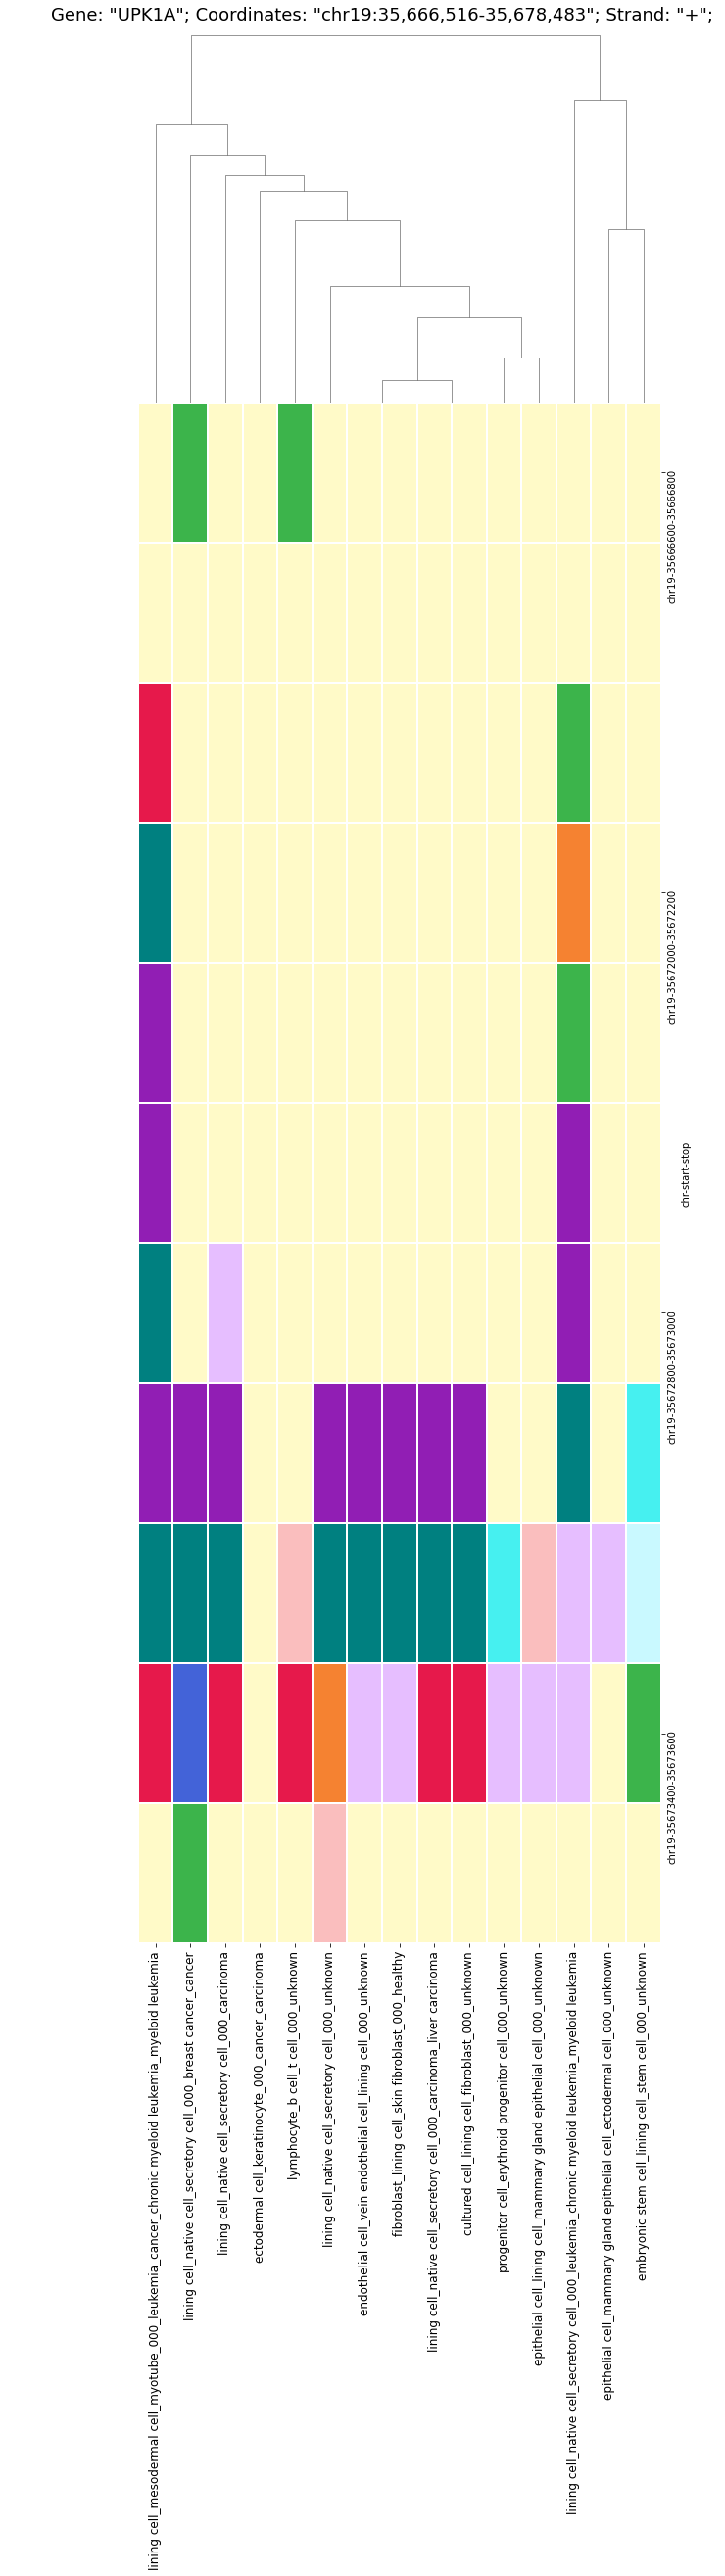

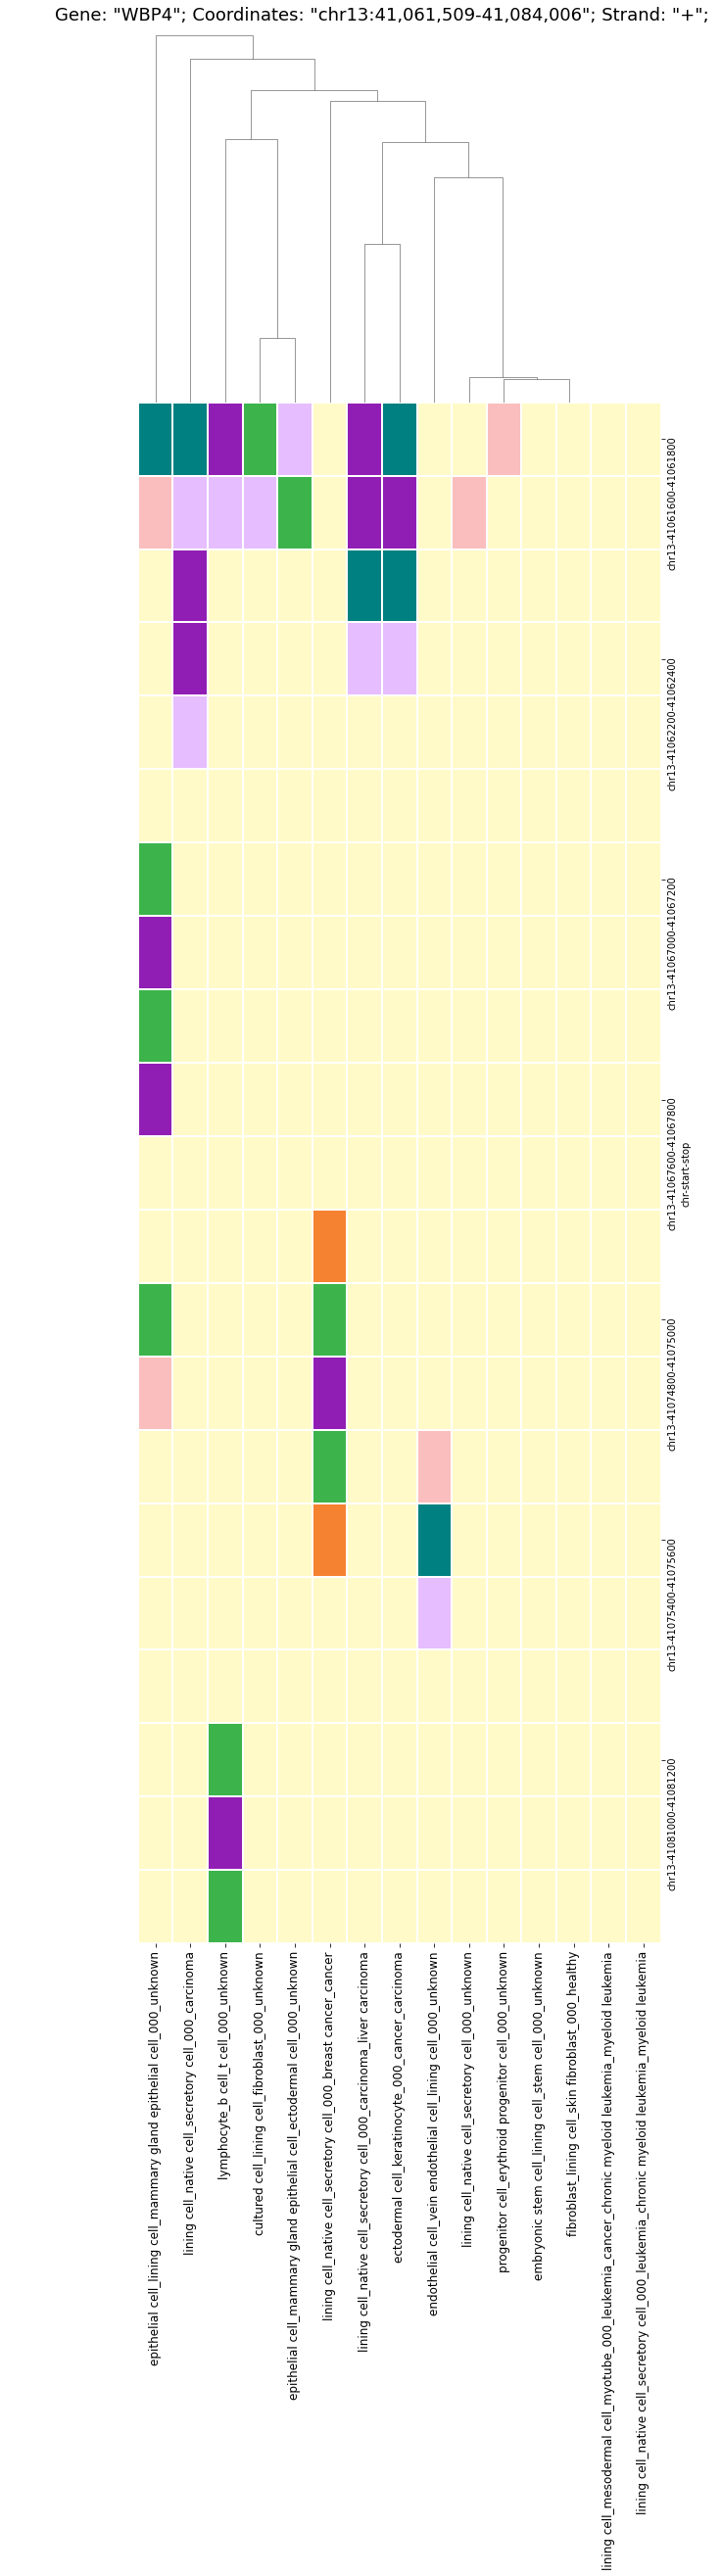

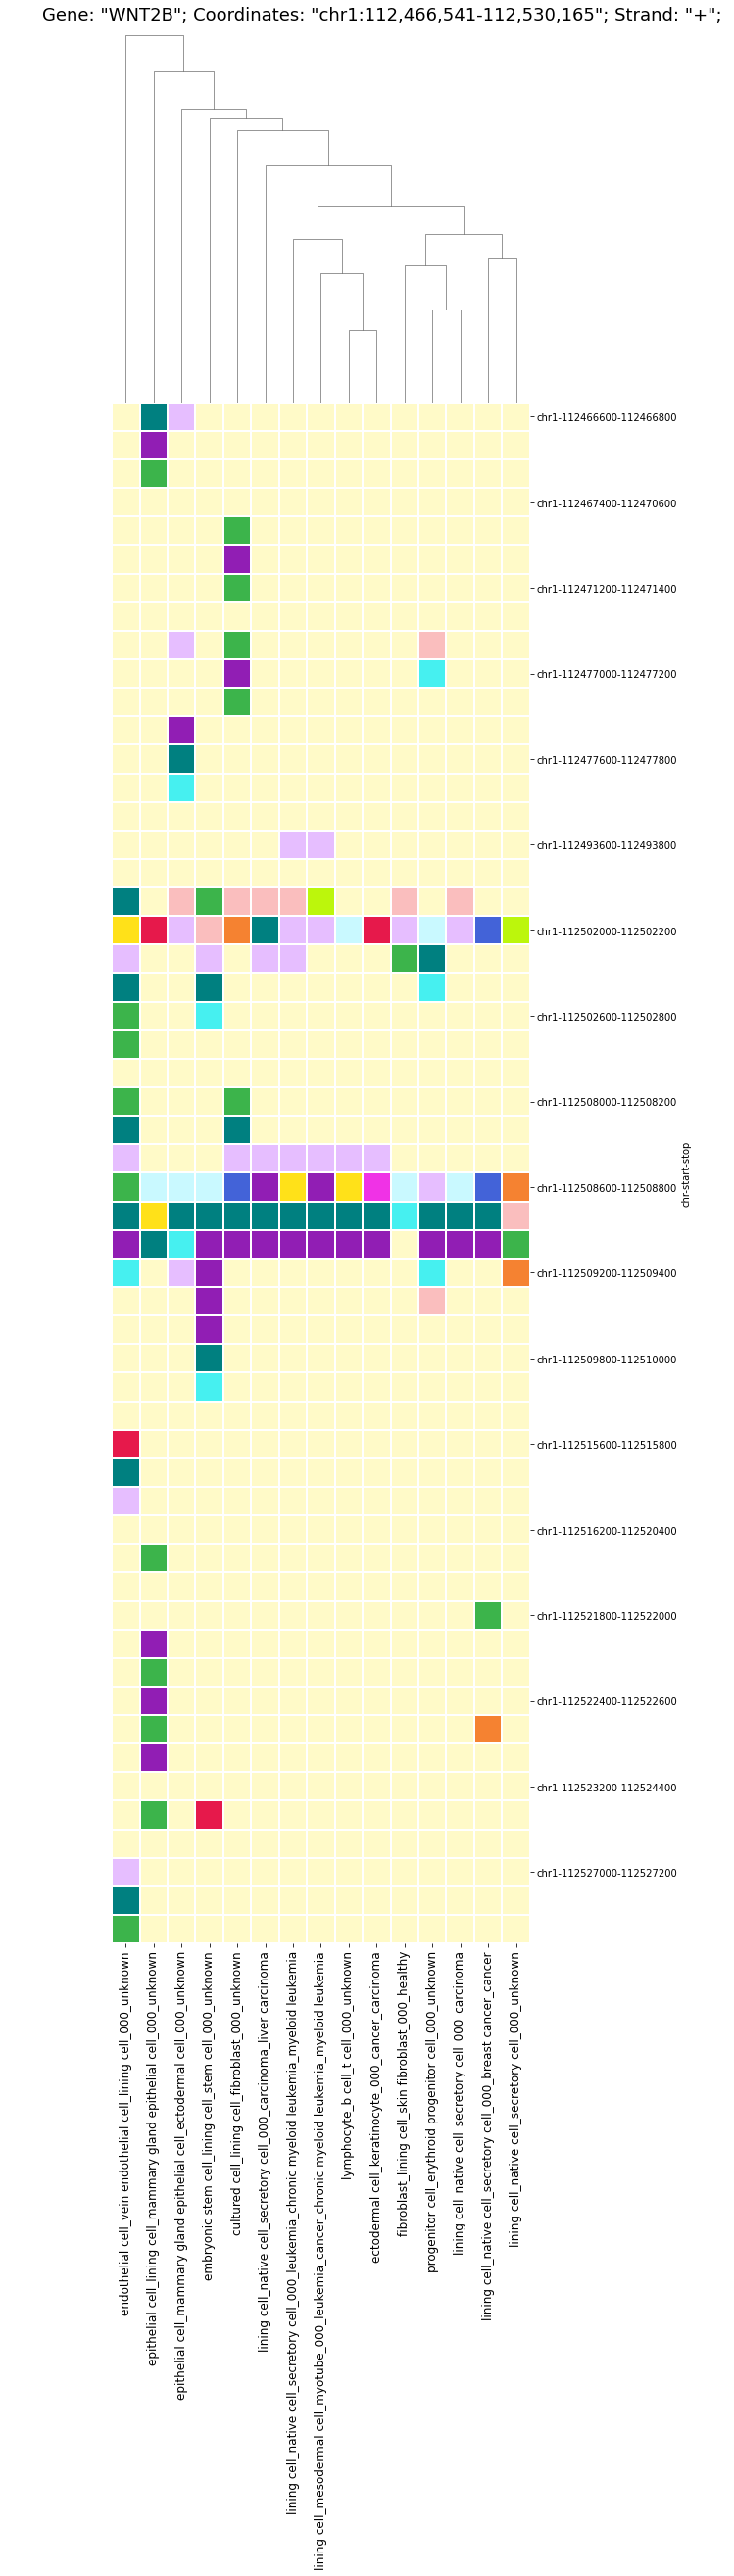

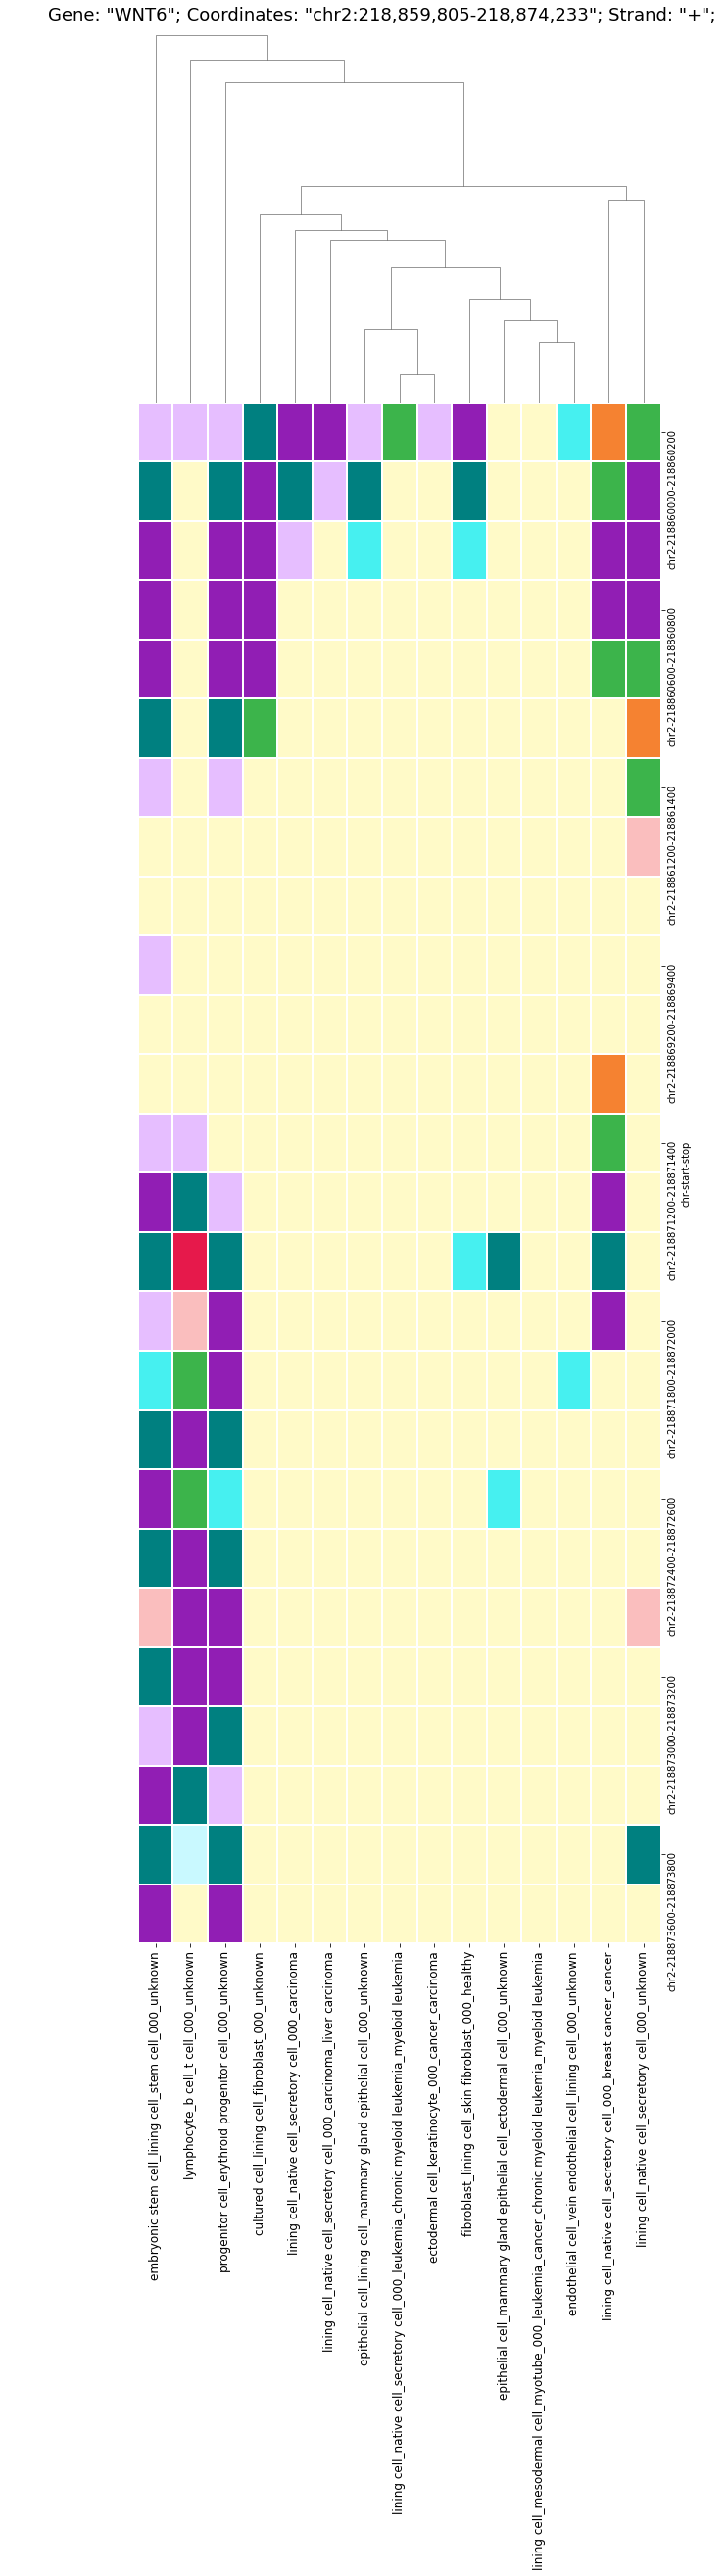

In [15]:
single_gene_analysis(full_df, "./gene_list/test_list.txt")

## Genome-wide analysis 

In [16]:
reducted_df = genome_reduction(full_df)

 chrY  

In [ ]:
#reducted_df = load_reducted_dataframe()

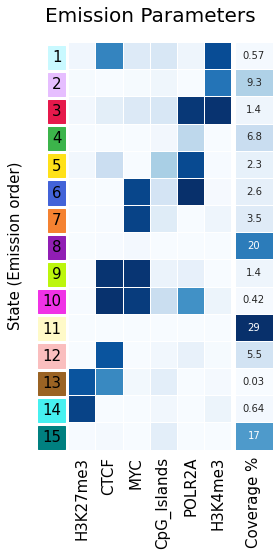

In [18]:
show_emission_graph_with_coverage(reducted_df, custom_palette=palette)

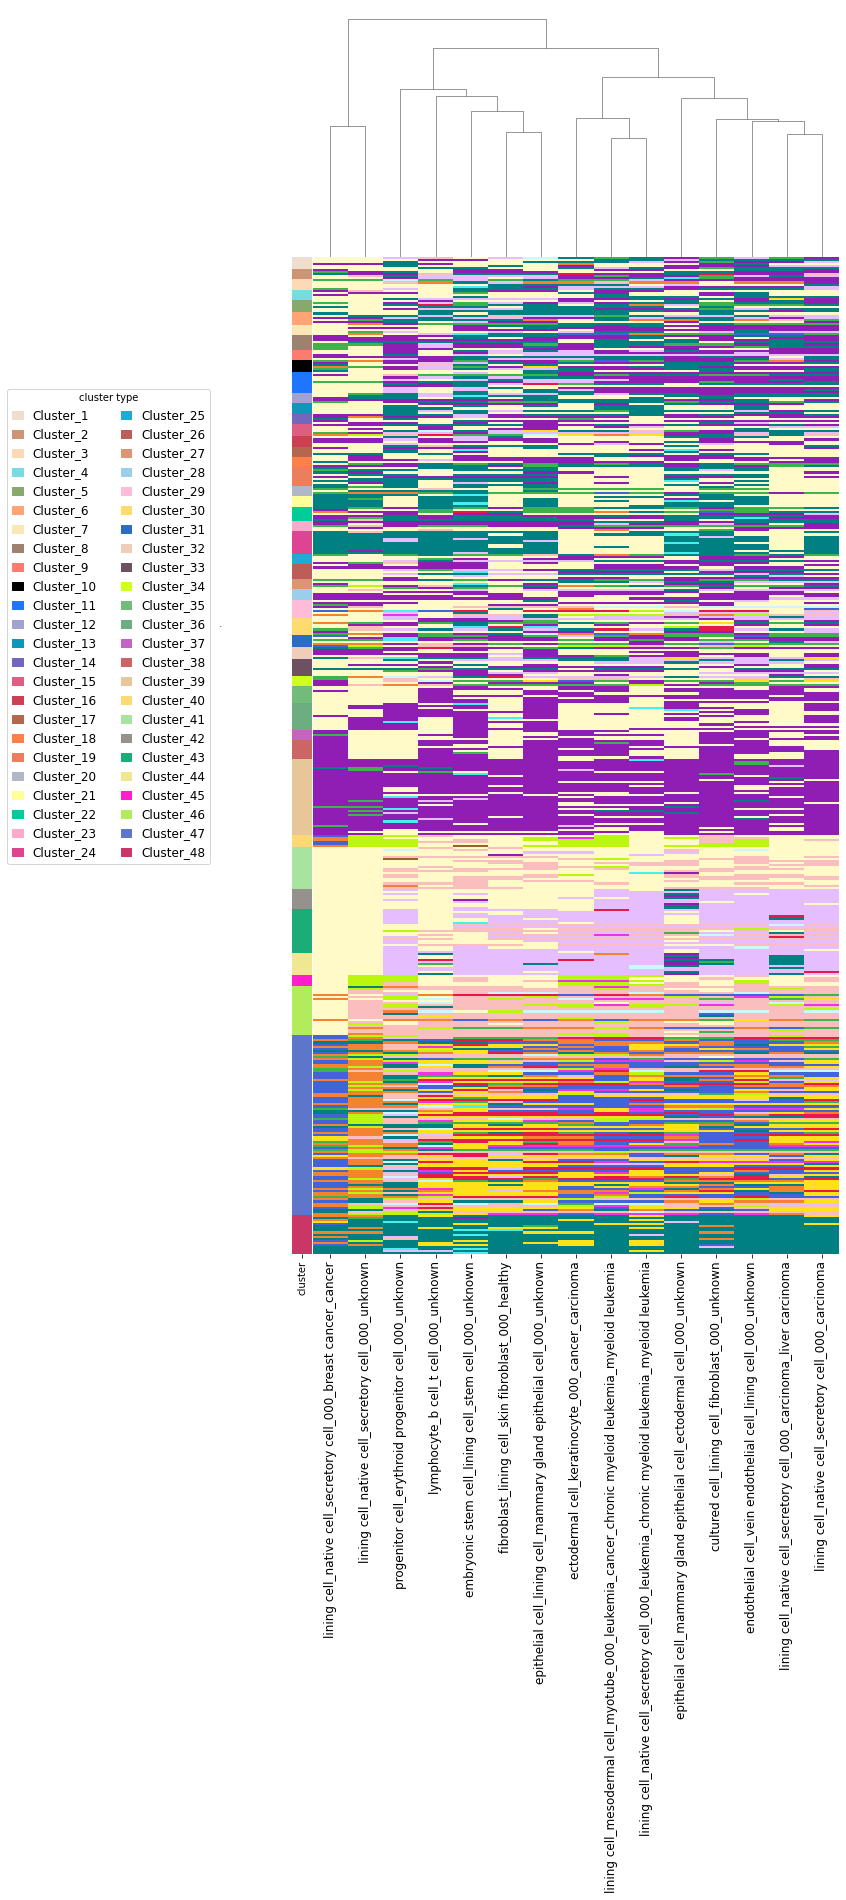

In [19]:
clustered_heatmap = data_driven_heatmap(reducted_df)

requests.get(http://purl.obolibrary.org/obo/go/go-basic.obo, stream=True)
  WROTE: go-basic.obo

FTP RETR ftp.ncbi.nlm.nih.gov gene/DATA gene2go.gz -> gene2go.gz
  gunzip gene2go.gz
go-basic.obo: fmt(1.2) rel(2021-05-01) 47,284 GO Terms
HMS:0:00:05.098141 341,938 annotations, 20,680 genes, 18,637 GOs, 1 taxids READ: gene2go 
BP 18,679 annotated human genes
MF 18,179 annotated human genes
CC 19,395 annotated human genes

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 87% 16,988 of 19,582 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 92% 17,921 of 19,582 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 89% 17,452 of 19,582 population items found in association
querying 1-45...done.
Finished.
5 input query terms found no hit:
	['AC09215

NameError: name 'sig_cut_off' is not defined

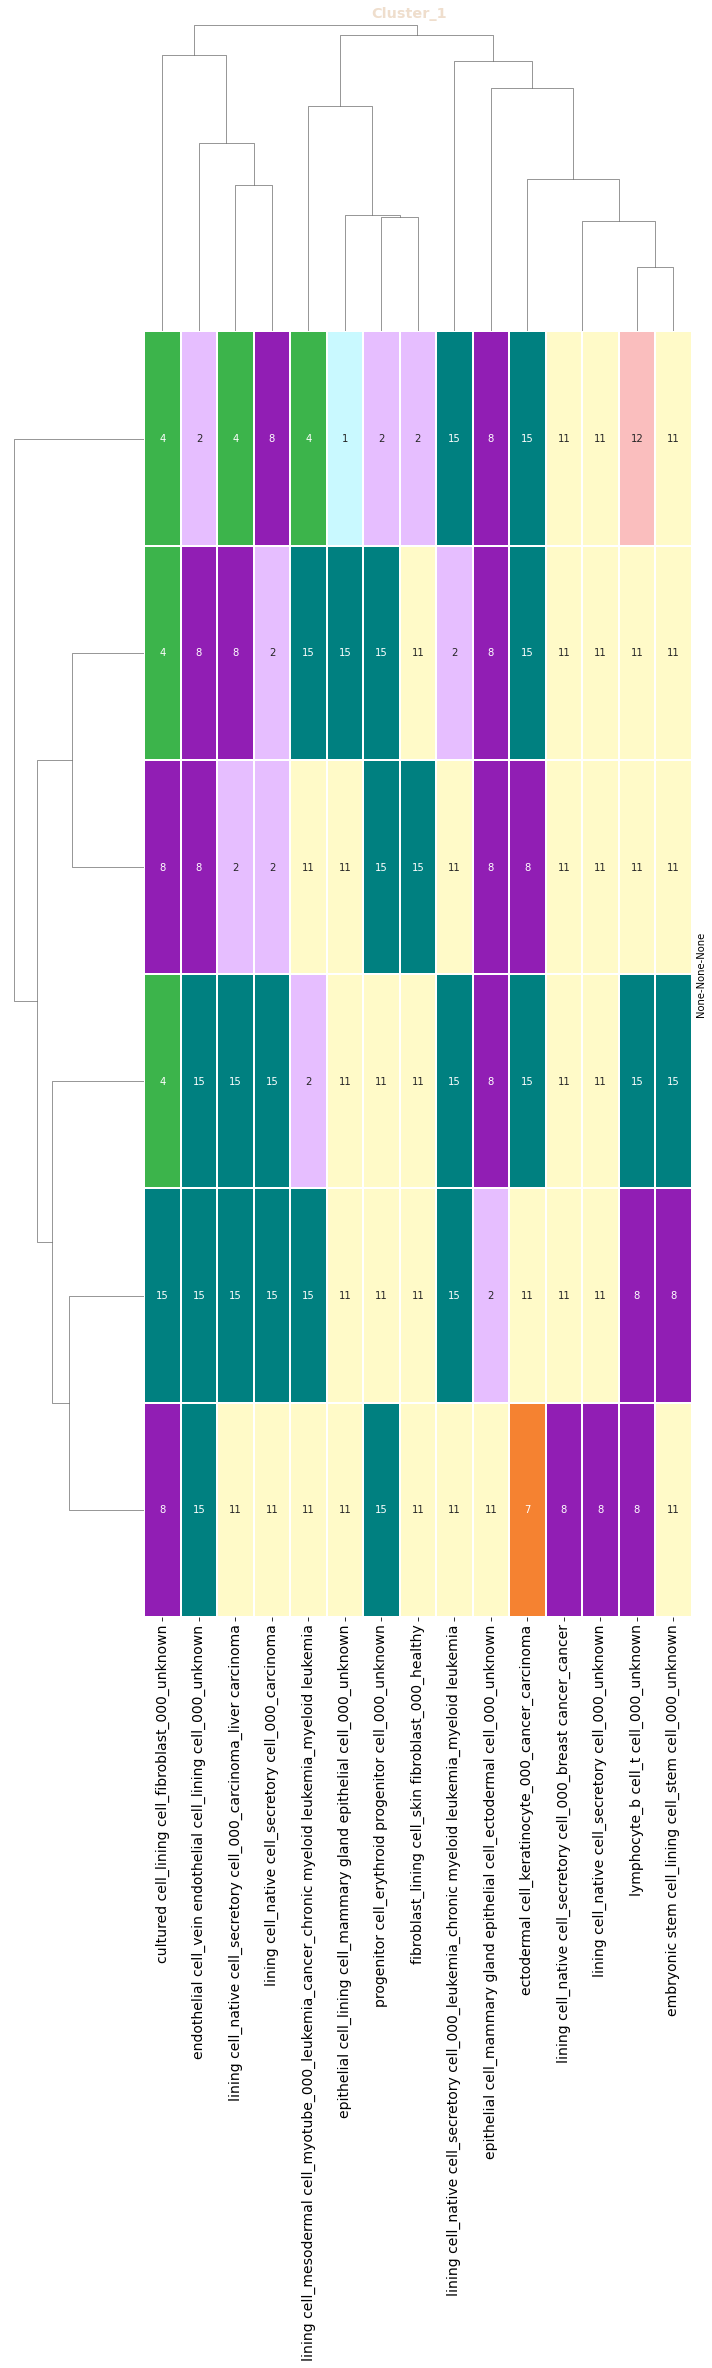

In [20]:
gene_ontology_enrichment_analysis(clustered_heatmap, reducted_df, significance_cut_off= 0.05)